In [1]:
from sympy import *
import sympy as sp
import numpy as np
init_printing("mathjax") # sympy expression printing

Jacobians relating link velocities to center link and internal controls

In [104]:
t,lamz = sp.symbols('t lamz')
a1 = sp.Function('a1')(t)
a2 = sp.Function('a2')(t)

ad1 = a1.diff(t)
ad2 = a2.diff(t)

lamx = sp.Function('lamx')(t)
lamy = sp.Function('lamy')(t)

lamxd = lamx.diff(t)
lamyd = lamy.diff(t)

# ad1 = sp.Function('ad1')(t)
# ad2 = sp.Function('ad2')(t)
# a1,a2 = sp.symbols('a1 a2')
# ad1,ad2 = sp.symbols('ad1 ad2')

kt,l,dt = sp.symbols('kt,l,dt')

def inadj(x,y,th):
    return Matrix([
        [cos(th) ,sin(th),x*sin(th)-y*cos(th)],
        [-sin(th),cos(th),x*cos(th)+y*sin(th)],
        [0,0,1]
        ])

In [83]:
je1 = Matrix([
    [cos(a1),-sin(a1),l/2*sin(a1)     ,0  ,0],
    [sin(a1),cos(a1) ,-l/2*(1+cos(a1)),l/2,0],
    [0,0,1,-1,0]
])

je2 = Matrix([
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0]
])

je3 = Matrix([
    [cos(a2) ,sin(a2),l/2*sin(a2)    ,0,0],
    [-sin(a2),cos(a2),l/2*(1+cos(a2)),0,l/2],
    [0,0,1,0,1]
])

In [84]:
def inadj(x,y,th):
    return Matrix([
        [cos(th) ,sin(th),x*sin(th)-y*cos(th)],
        [-sin(th),cos(th),x*cos(th)+y*sin(th)],
        [0,0,1]
        ])

In [85]:
dadj1 = (inadj(-l/2,0,0) @ inadj(0,0,-a1) @ inadj(-l/2,0,0)).transpose()
dadj3 = (inadj(l/2,0,0) @ inadj(0,0,a2) @ inadj(l/2,0,0)).transpose()

In [86]:
dmat = Matrix([
    [kt*l,0     ,0         ],
    [0   ,2*kt*l,0         ],
    [0   ,0.    ,kt/12*l**3]
    ])

omg = dadj1 @ dmat @ je1 + dmat @ je2 + dadj3 @ dmat @ je3

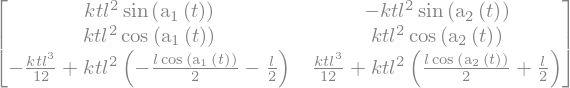

In [87]:
omg[0:3,3:6]
# print(omg[0:3,3:6])

In [88]:
acon = simplify(omg[0:3,0:3].inv() @ omg[0:3,3:6])

In [89]:
print(acon)

Matrix([[l*(-12*sin(a1(t) - 2*a2(t)) - 72*sin(a1(t) - a2(t)) - 24*sin(a1(t) + a2(t)) - 2*sin(a1(t) + 2*a2(t)) - 5*sin(2*a1(t) + a2(t)) - 5*sin(2*a1(t) + 2*a2(t))/2 - 126*sin(a1(t)) - 25*sin(2*a1(t))/2 + 51*sin(a2(t)) + 23*sin(2*a2(t))/2)/(3*(4*cos(a1(t) - 2*a2(t)) + 8*cos(a1(t) - a2(t)) - 56*cos(a1(t) + a2(t)) - 12*cos(a1(t) + 2*a2(t)) + cos(2*a1(t) - 2*a2(t)) + 4*cos(2*a1(t) - a2(t)) - 12*cos(2*a1(t) + a2(t)) - 4*cos(2*a1(t) + 2*a2(t)) - 136*cos(a1(t)) - 15*cos(2*a1(t)) - 136*cos(a2(t)) - 15*cos(2*a2(t)) - 243)), -l*(-72*sin(a1(t) - a2(t)) + 24*sin(a1(t) + a2(t)) + 5*sin(a1(t) + 2*a2(t)) - 12*sin(2*a1(t) - a2(t)) + 2*sin(2*a1(t) + a2(t)) + 5*sin(2*a1(t) + 2*a2(t))/2 - 51*sin(a1(t)) - 23*sin(2*a1(t))/2 + 126*sin(a2(t)) + 25*sin(2*a2(t))/2)/(-12*cos(a1(t) - 2*a2(t)) - 24*cos(a1(t) - a2(t)) + 168*cos(a1(t) + a2(t)) + 36*cos(a1(t) + 2*a2(t)) - 3*cos(2*a1(t) - 2*a2(t)) - 12*cos(2*a1(t) - a2(t)) + 36*cos(2*a1(t) + a2(t)) + 12*cos(2*a1(t) + 2*a2(t)) + 408*cos(a1(t)) + 45*cos(2*a1(t)) + 408*c

In [90]:
# Using the right trivialization of the lie algrebra
curvbx = Matrix([
    [
     acon[0,0].diff(a1) - acon[0,0].diff(a1) - (acon[1,0]*acon[2,0] - acon[2,0]*acon[1,0]),
     acon[0,0].diff(a2) - acon[0,1].diff(a1) - (acon[1,0]*acon[2,1] - acon[2,0]*acon[1,1])
    ],
    [
     acon[0,1].diff(a1) - acon[0,0].diff(a2) - (acon[1,1]*acon[2,0] - acon[2,1]*acon[1,0]),
     acon[0,1].diff(a2) - acon[0,1].diff(a2) - (acon[1,1]*acon[2,1] - acon[2,1]*acon[1,1])
    ]
])

curvby = Matrix([
    [
     acon[1,0].diff(a1) - acon[1,0].diff(a1) - (-acon[0,0]*acon[2,0] + acon[2,0]*acon[0,0]),
     acon[1,0].diff(a2) - acon[1,1].diff(a1) - (-acon[0,0]*acon[2,1] + acon[2,0]*acon[0,1])
    ],
    [
     acon[1,1].diff(a1) - acon[1,0].diff(a2) - (-acon[0,1]*acon[2,0] + acon[2,1]*acon[0,0]),
     acon[1,1].diff(a2) - acon[1,1].diff(a2) - (-acon[0,1]*acon[2,1] + acon[2,1]*acon[0,1])
    ]
])

curvbth = Matrix([
    [
     acon[2,0].diff(a1) - acon[2,0].diff(a1),
     acon[2,0].diff(a2) - acon[2,1].diff(a1)
    ],
    [
     acon[2,1].diff(a1) - acon[2,0].diff(a2),
     acon[2,1].diff(a2) - acon[2,1].diff(a2)
    ]
])

In [91]:
j1a = je1 @ Matrix([
    [-acon[0,0],-acon[0,1]],
    [-acon[1,0],-acon[1,1]],
    [-acon[2,0],-acon[2,1]],
    [1         ,0],
    [0         ,1]
])

j2a = je2 @ Matrix([
    [-acon[0,0],-acon[0,1]],
    [-acon[1,0],-acon[1,1]],
    [-acon[2,0],-acon[2,1]],
    [1         ,0],
    [0         ,1]
])

j3a = je3 @ Matrix([
    [-acon[0,0],-acon[0,1]],
    [-acon[1,0],-acon[1,1]],
    [-acon[2,0],-acon[2,1]],
    [1         ,0],
    [0         ,1]
])

d1a = (j1a.transpose()) @ dmat @ j1a
d2a = (j2a.transpose()) @ dmat @ j2a
d3a = (j3a.transpose()) @ dmat @ j3a

In [92]:
pterm = Matrix([ [ad1,ad2] ]) @ (d1a + d2a + d3a) @ Matrix([ [ad1], [ad2] ])

In [46]:
pterm.shape

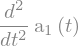

In [129]:
ad1.diff(t)

In [ ]:
eqn1 = ((pterm[0,0].diff(ad1)).diff(t)) - pterm[0,0].diff(a1) + lamx*(curvbx[0, 0]*ad1 + curvbx[0, 1]*ad2) + lamy*(curvby[0, 0]*ad1 + curvby[0, 1]*ad2) + lamz*(curvbth[0, 0]*ad1 + curvbth[0, 1]*ad2)
eqn2 = ((pterm[0,0].diff(ad2)).diff(t)) - pterm[0,0].diff(a2) + lamx*(curvbx[1, 0]*ad1 + curvbx[1, 1]*ad2) + lamy*(curvby[1, 0]*ad1 + curvby[1, 1]*ad2) + lamz*(curvbth[1, 0]*ad1 + curvbth[1, 1]*ad2)

eqn3 = lamx.diff(t) + lamy*(acon[2, 0]*ad1 + acon[2, 1]*ad2)
eqn4 = lamy.diff(t) - lamx*(acon[2, 0]*ad1 + acon[2, 1]*ad2)

sol = solve([eqn1,eqn2,eqn3,eqn4], ad1.diff(t), ad2.diff(t), lamx.diff(t), lamy.diff(t), dict=True)

In [101]:
t = sp.symbols('t')
x = sp.Function('x')(t)
f = cos(x)*sin(x)
df = sp.diff(f, t)+1
solve([df],x.diff(x.diff(t)))
print(df.diff(x.diff(t)))
print(df.diff(t))
print(solve([df],x.diff(t)))

-sin(x(t))**2 + cos(x(t))**2
-sin(x(t))**2*Derivative(x(t), (t, 2)) - 4*sin(x(t))*cos(x(t))*Derivative(x(t), t)**2 + cos(x(t))**2*Derivative(x(t), (t, 2))
{Derivative(x(t), t): -1/cos(2*x(t))}


In [2]:
from sympy.parsing.mathematica import mathematica

In [13]:
bee = open('texttest.txt', 'r')

In [14]:
content = bee.read()

In [15]:
# bee.close()
bop=mathematica(content)

In [16]:
print(bop)

ad1*(ad1*(kt*l**3*(kt*l**3*(-kt**2*l**2*(sin(2*a1) - sin(2*a2))**2/4 - kt**2*l**2*(cos(2*a1) + cos(2*a2) - 8)*(cos(2*a1) + cos(2*a2) + 10)/4)*(6*cos(a1) + 7)/(3*kt*l**3*(-kt**2*l**2*(sin(2*a1) - sin(2*a2))**2/4 - kt**2*l**2*(cos(2*a1) + cos(2*a2) - 8)*(cos(2*a1) + cos(2*a2) + 10)/4)*(8*cos(a1) + cos(2*a1) + 8*cos(a2) + cos(2*a2) + 16)/2 - 3*kt*l**2*(kt**2*l**3*(sin(2*a1) - sin(2*a2))*(4*sin(a1) + sin(2*a1) + 4*sin(a2) + sin(2*a2))/8 - kt**2*l**3*(cos(2*a1) + cos(2*a2) - 8)*(-4*cos(a1) - cos(2*a1) + 4*cos(a2) + cos(2*a2))/8)*(-4*cos(a1) - cos(2*a1) + 4*cos(a2) + cos(2*a2)) - 3*kt*l**2*(kt**2*l**3*(sin(2*a1) - sin(2*a2))*(-4*cos(a1) - cos(2*a1) + 4*cos(a2) + cos(2*a2))/8 + kt**2*l**3*(cos(2*a1) + cos(2*a2) + 10)*(4*sin(a1) + sin(2*a1) + 4*sin(a2) + sin(2*a2))/8)*(4*sin(a1) + sin(2*a1) + 4*sin(a2) + sin(2*a2))) - kt*l**2*(-kt**2*l**3*(sin(2*a1) - sin(2*a2))*(4*sin(a1) + sin(2*a1) + 4*sin(a2) + sin(2*a2))/8 + kt**2*l**3*(cos(2*a1) + cos(2*a2) - 8)*(-4*cos(a1) - cos(2*a1) + 4*cos(a2) + cos(

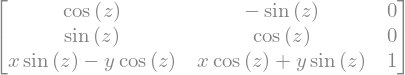

In [14]:
x,y,z,kx,ky = sp.symbols('x y z kx ky')
inadj(x,y,z).transpose()

In [ ]:
a1n,b1n,g1n,a2n,b2n,g2n = sp.symbols('a1n b1n g1n a2n b2n g2n')
ad1n,bd1n,gd1n,ad2n,bd2n,gd2n = sp.symbols('ad1n bd1n gd1n ad2n bd2n gd2n')
a1c1,a1c2,b1c1,b1c2,g1c1,g1c2,a2c1,a2c2,b2c1,b2c2,g2c1,g2c2 = sp.symbols('a1c1 a1c2 b1c1 b1c2 g1c1 g1c2 a2c1 a2c2 b2c1 b2c2 g2c1 g2c2')
ad1c1,ad1c2,bd1c1,bd1c2,gd1c1,gd1c2,ad2c1,ad2c2,bd2c1,bd2c2,gd2c1,gd2c2 = sp.symbols('ad1c1 ad1c2 bd1c1 bd1c2 gd1c1 gd1c2 ad2c1 ad2c2 bd2c1 bd2c2 gd2c1 gd2c2')
m1,m2,leq,dt,a11,a12,a21,a22,lamc1,lamc2 = sp.symbols('m1 m2 leq dt a11 a12 a21 a22 lamc1 lamc2')

In [ ]:
d12c1 = cosh(a1c1)*cosh(a2c1) - sinh(a1c1)*cos(b1c1)*sinh(a2c1)*cos(b2c1) - sinh(a1c1)*sin(b1c1)*sinh(a2c1)*sin(b2c1)*cos(g1c1 - g2c1)
d12c2 = cosh(a1c2)*cosh(a2c2) - sinh(a1c2)*cos(b1c2)*sinh(a2c2)*cos(b2c2) - sinh(a1c2)*sin(b1c2)*sinh(a2c2)*sin(b2c2)*cos(g1c2 - g2c2)

dtd12c2 = cosh(a2c2)*(ad1c2 - ad2c2*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2)))*sinh(a1c2) + (cosh(a1c2)*(ad2c2 - ad1c2*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))) + (cos(b2c2)*(bd1c2 - bd2c2*cos(g1c2 - g2c2))*sin(b1c2) + sin(b2c2)*(cos(b1c2)*(bd2c2 - bd1c2*cos(g1c2 - g2c2)) + (gd1c2 - gd2c2)*sin(b1c2)*sin(g1c2 - g2c2)))*sinh(a1c2))*sinh(a2c2)

a1termc1 = 1./2.*sinh(2. * a1c1)*(bd1c1**2. + gd1c1**2. * sin(b1c1)**2.)
a1termc2 = 1./2.*sinh(2. * a1c2)*(bd1c2**2. + gd1c2**2. * sin(b1c2)**2.)
a2termc1 = 1./2.*sinh(2. * a2c1)*(bd2c1**2. + gd2c1**2. * sin(b2c1)**2.)
a2termc2 = 1./2.*sinh(2. * a2c2)*(bd2c2**2. + gd2c2**2. * sin(b2c2)**2.)
b1termc1 = -2. * ad1c1*bd1c1/tanh(a1c1) + .5*sin(2.*b1c1)*gd1c1**2
b1termc2 = -2. * ad1c2*bd1c2/tanh(a1c2) + .5*sin(2.*b1c2)*gd1c2**2
b2termc1 = -2. * ad2c1*bd2c1/tanh(a2c1) + .5*sin(2.*b2c1)*gd2c1**2
b2termc2 = -2. * ad2c2*bd2c2/tanh(a2c2) + .5*sin(2.*b2c2)*gd2c2**2
g1termc1 = -2. * ad1c1*gd1c1/tanh(a1c1) - 2.*bd1c1*gd1c1/tan(b1c1)
g1termc2 = -2. * ad1c2*gd1c2/tanh(a1c2) - 2.*bd1c2*gd1c2/tan(b1c2)
g2termc1 = -2. * ad2c1*gd2c1/tanh(a2c1) - 2.*bd2c1*gd2c1/tan(b2c1)
g2termc2 = -2. * ad2c2*gd2c2/tanh(a2c2) - 2.*bd2c2*gd2c2/tan(b2c2)

#dtdtd12c2 = ad1c2**2.*cosh(a1c2)*cosh(a2c2) + ad2c2**2.*cosh(a1c2)*cosh(a2c2) - 2.*ad1c2*ad2c2*cosh(a1c2)*cosh(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2)) - 2.*ad2c2*cosh(a2c2)*(-bd1c2*cos(b2c2)*sin(b1c2) + bd2c2*cos(b2c2)*cos(g1c2 - g2c2)*sin(b1c2) - bd2c2*cos(b1c2)*sin(b2c2) + bd1c2*cos(b1c2)*cos(g1c2 - g2c2)*sin(b2c2) - (gd1c2 - gd2c2)*sin(b1c2)*sin(b2c2)*sin(g1c2 - g2c2))*sinh(a1c2) - 2.*ad1c2*cosh(a1c2)*(-bd1c2*cos(b2c2)*sin(b1c2) + bd2c2*cos(b2c2)*cos(g1c2 - g2c2)*sin(b1c2) - bd2c2*cos(b1c2)*sin(b2c2) + bd1c2*cos(b1c2)*cos(g1c2 - g2c2)*sin(b2c2) - (gd1c2 - gd2c2)*sin(b1c2)*sin(b2c2)*sin(g1c2 - g2c2))*sinh(a2c2) + 2.*ad1c2*ad2c2*sinh(a1c2)*sinh(a2c2) - ad1c2**2.*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))*sinh(a1c2)*sinh(a2c2) - ad2c2**2.*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))*sinh(a1c2)*sinh(a2c2) + cosh(a2c2)*sinh[a1c2]*(a1termc2 - cona1c2) - cosh(a1c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))*sinh(a2c2)*(a1termc2 - cona1c2) - cosh(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))*sinh(a1c2)*(a2termc2 - cona2c2) + cosh(a1c2)*sinh(a2c2)*(a2termc2 - cona2c2) - sinh(a1c2)*sinh(a2c2)*(-bd1c2**2.*cos(b1c2)*cos(b2c2) - bd2c2**2.*cos(b1c2)*cos(b2c2) + 2.*bd1c2*bd2c2*cos(b1c2)*cos(b2c2)*cos(g1c2 - g2c2) + 2.*bd1c2*bd2c2*sin(b1c2)*sin(b2c2) - bd1c2**2.*cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2) - bd2c2**2.*cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2) - (gd1c2 - gd2c2)**2.*cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2) - 2.*bd2c2*(gd1c2 - gd2c2)*cos(b2c2)*sin(b1c2)*sin(g1c2 - g2c2) - 2.*bd1c2*(gd1c2 - gd2c2)*cos(b1c2)*sin(b2c2)*sin(g1c2 - g2c2) - cos(b2c2)*sin(b1c2)*(b1termc2 - conb1c2) + cos(b1c2)*cos(g1c2 - g2c2)*sin(b2c2)*(b1termc2 - conb1c2) + cos(b2c2)*cos(g1c2 - g2c2)*sin(b1c2)*(b2termc2 - conb2c2) - cos(b1c2)*sin(b2c2)*(b2termc2 - conb2c2) - sin(b1c2)*sin(b2c2)*sin(g1c2 - g2c2)*((g1termc2 - cong1c2) - (g2termc2 - cong2c2)))

cona1c1 = (lamc1*d12c1.diff(a1c1))/(m1*sqrt(d12c1**2. - 1))
cona1c2 = (lamc2*d12c2.diff(a1c2))/(m1*sqrt(d12c2**2. - 1))
cona2c1 = (lamc1*d12c1.diff(a2c1))/(m2*sqrt(d12c1**2. - 1))
cona2c2 = (lamc2*d12c2.diff(a2c2))/(m2*sqrt(d12c2**2. - 1))
conb1c1 = (lamc1*d12c1.diff(b1c1))/(m1*sinh(a1c1)**2.*sqrt(d12c1**2. - 1))
conb1c2 = (lamc2*d12c2.diff(b1c2))/(m1*sinh(a1c2)**2.*sqrt(d12c2**2. - 1))
conb2c1 = (lamc1*d12c1.diff(b2c1))/(m2*sinh(a2c1)**2.*sqrt(d12c1**2. - 1))
conb2c2 = (lamc2*d12c2.diff(b2c2))/(m2*sinh(a2c2)**2.*sqrt(d12c2**2. - 1))
cong1c1 = (lamc1*d12c1.diff(g1c1))/(m1*sinh(a1c1)**2.*sin(b1c1)**2.*sqrt(d12c1**2. - 1))
cong1c2 = (lamc2*d12c2.diff(g1c2))/(m1*sinh(a1c2)**2.*sin(b1c2)**2.*sqrt(d12c2**2. - 1))
cong2c1 = (lamc1*d12c1.diff(g2c1))/(m2*sinh(a2c1)**2.*sin(b2c1)**2.*sqrt(d12c1**2. - 1))
cong2c2 = (lamc2*d12c2.diff(g2c2))/(m2*sinh(a2c2)**2.*sin(b2c2)**2.*sqrt(d12c2**2. - 1))

ex1 = a1c1 - a1n - dt*(a11*ad1c1 + a12*ad1c2)
ex2 = a1c2 - a1n - dt*(a21*ad1c1 + a22*ad1c2)

ex3 = b1c1 - b1n - dt*(a11*bd1c1 + a12*bd1c2)
ex4 = b1c2 - b1n - dt*(a21*bd1c1 + a22*bd1c2)

ex5 = g1c1 - g1n - dt*(a11*gd1c1 + a12*gd1c2)
ex6 = g1c2 - g1n - dt*(a21*gd1c1 + a22*gd1c2)

ex7 = a2c1 - a2n - dt*(a11*ad2c1 + a12*ad2c2)
ex8 = a2c2 - a2n - dt*(a21*ad2c1 + a22*ad2c2)

ex9 = b2c1 - b2n - dt*(a11*bd2c1 + a12*bd2c2)
ex10 = b2c2 - b2n - dt*(a21*bd2c1 + a22*bd2c2)

ex11 = g2c1 - g2n - dt*(a11*gd2c1 + a12*gd2c2)
ex12 = g2c2 - g2n - dt*(a21*gd2c1 + a22*gd2c2)


ex13 = ad1c1 - ad1n - dt*(a11*(a1termc1 - cona1c1) + a12*(a1termc2 - cona1c2))
ex14 = ad1c2 - ad1n - dt*(a21*(a1termc1 - cona1c1) + a22*(a1termc2 - cona1c2))

ex15 = bd1c1 - bd1n - dt*(a11*(b1termc1 - conb1c1) + a12*(b1termc2 - conb1c2))
ex16 = bd1c2 - bd1n - dt*(a21*(b1termc1 - conb1c1) + a22*(b1termc2 - conb1c2))

ex17 = gd1c1 - gd1n - dt*(a11*(g1termc1 - cong1c1) + a12*(g1termc2 - cong1c2))
ex18 = gd1c2 - gd1n - dt*(a21*(g1termc1 - cong1c1) + a22*(g1termc2 - cong1c2))

ex19 = ad2c1 - ad2n - dt*(a11*(a2termc1 - cona2c1) + a12*(a2termc2 - cona2c2))
ex20 = ad2c2 - ad2n - dt*(a21*(a2termc1 - cona2c1) + a22*(a2termc2 - cona2c2))

ex21 = bd2c1 - bd2n - dt*(a11*(b2termc1 - conb2c1) + a12*(b2termc2 - conb2c2))
ex22 = bd2c2 - bd2n - dt*(a21*(b2termc1 - conb2c1) + a22*(b2termc2 - conb2c2))

ex23 = gd2c1 - gd2n - dt*(a11*(g2termc1 - cong2c1) + a12*(g2termc2 - cong2c2))
ex24 = gd2c2 - gd2n - dt*(a21*(g2termc1 - cong2c1) + a22*(g2termc2 - cong2c2))

ex25 = acosh(d12c2) - leq
ex26 = dtd12c2/sqrt(d12c2**2. - 1)

In [ ]:
boop = ex1
print("Constraint Equation")
print(boop)
print("Derivatives")
print(boop.diff(a1c1))
print(boop.diff(a1c2))
print(boop.diff(b1c1))
print(boop.diff(b1c2))
print(boop.diff(g1c1))
print(boop.diff(g1c2))
print(boop.diff(a2c1))
print(boop.diff(a2c2))
print(boop.diff(b2c1))
print(boop.diff(b2c2))
print(boop.diff(g2c1))
print(boop.diff(g2c2))
print(boop.diff(ad1c1))
print(boop.diff(ad1c2))
print(boop.diff(bd1c1))
print(boop.diff(bd1c2))
print(boop.diff(gd1c1))
print(boop.diff(gd1c2))
print(boop.diff(ad2c1))
print(boop.diff(ad2c2))
print(boop.diff(bd2c1))
print(boop.diff(bd2c2))
print(boop.diff(gd2c1))
print(boop.diff(gd2c2))
print(boop.diff(lamc1))
print(boop.diff(lamc2))

Rigid Rod RadauIIA 3-stage H3

In [ ]:
a1n,b1n,g1n,a2n,b2n,g2n = sp.symbols('a1n b1n g1n a2n b2n g2n')
ad1n,bd1n,gd1n,ad2n,bd2n,gd2n = sp.symbols('ad1n bd1n gd1n ad2n bd2n gd2n')
a1c1,a1c2,a1n1,b1c1,b1c2,b1n1,g1c1,g1c2,g1n1,a2c1,a2c2,a2n1,b2c1,b2c2,b2n1,g2c1,g2c2,g2n1 = sp.symbols('a1c1 a1c2 a1n1 b1c1 b1c2 b1n1 g1c1 g1c2 g1n1 a2c1 a2c2 a2n1 b2c1 b2c2 b2n1 g2c1 g2c2 g2n1')
ad1c1,ad1c2,ad1n1,bd1c1,bd1c2,bd1n1,gd1c1,gd1c2,gd1n1,ad2c1,ad2c2,ad2n1,bd2c1,bd2c2,bd2n1,gd2c1,gd2c2,gd2n1 = sp.symbols('ad1c1 ad1c2 ad1n1 bd1c1 bd1c2 bd1n1 gd1c1 gd1c2 gd1n1 ad2c1 ad2c2 ad2n1 bd2c1 bd2c2 bd2n1 gd2c1 gd2c2 gd2n1')
m1,m2,leq,dt,a11,a12,a13,a21,a22,a23,a31,a32,a33,lamc1,lamc2,lamn1 = sp.symbols('m1 m2 leq dt a11 a12 a13 a21 a22 a23 a31 a32 a33 lamc1 lamc2 lamn1')

In [ ]:
d12c1 = cosh(a1c1)*cosh(a2c1) - sinh(a1c1)*cos(b1c1)*sinh(a2c1)*cos(b2c1) - sinh(a1c1)*sin(b1c1)*sinh(a2c1)*sin(b2c1)*cos(g1c1 - g2c1)
d12c2 = cosh(a1c2)*cosh(a2c2) - sinh(a1c2)*cos(b1c2)*sinh(a2c2)*cos(b2c2) - sinh(a1c2)*sin(b1c2)*sinh(a2c2)*sin(b2c2)*cos(g1c2 - g2c2)
d12n1 = cosh(a1n1)*cosh(a2n1) - sinh(a1n1)*cos(b1n1)*sinh(a2n1)*cos(b2n1) - sinh(a1n1)*sin(b1n1)*sinh(a2n1)*sin(b2n1)*cos(g1n1 - g2n1)

dtd12n1 = cosh(a2n1)*(ad1n1 - ad2n1*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)))*sinh(a1n1) + (cosh(a1n1)*(ad2n1 - ad1n1*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))) + (cos(b2n1)*(bd1n1 - bd2n1*cos(g1n1 - g2n1))*sin(b1n1) + sin(b2n1)*(cos(b1n1)*(bd2n1 - bd1n1*cos(g1n1 - g2n1)) + (gd1n1 - gd2n1)*sin(b1n1)*sin(g1n1 - g2n1)))*sinh(a1n1))*sinh(a2n1)

a1termc1 = 1./2.*sinh(2. * a1c1)*(bd1c1**2. + gd1c1**2. * sin(b1c1)**2.)
a1termc2 = 1./2.*sinh(2. * a1c2)*(bd1c2**2. + gd1c2**2. * sin(b1c2)**2.)
a1termn1 = 1./2.*sinh(2. * a1n1)*(bd1n1**2. + gd1n1**2. * sin(b1n1)**2.)
a2termc1 = 1./2.*sinh(2. * a2c1)*(bd2c1**2. + gd2c1**2. * sin(b2c1)**2.)
a2termc2 = 1./2.*sinh(2. * a2c2)*(bd2c2**2. + gd2c2**2. * sin(b2c2)**2.)
a2termn1 = 1./2.*sinh(2. * a2n1)*(bd2n1**2. + gd2n1**2. * sin(b2n1)**2.)
b1termc1 = -2. * ad1c1*bd1c1/tanh(a1c1) + .5*sin(2.*b1c1)*gd1c1**2
b1termc2 = -2. * ad1c2*bd1c2/tanh(a1c2) + .5*sin(2.*b1c2)*gd1c2**2
b1termn1 = -2. * ad1n1*bd1n1/tanh(a1n1) + .5*sin(2.*b1n1)*gd1n1**2
b2termc1 = -2. * ad2c1*bd2c1/tanh(a2c1) + .5*sin(2.*b2c1)*gd2c1**2
b2termc2 = -2. * ad2c2*bd2c2/tanh(a2c2) + .5*sin(2.*b2c2)*gd2c2**2
b2termn1 = -2. * ad2n1*bd2n1/tanh(a2n1) + .5*sin(2.*b2n1)*gd2n1**2
g1termc1 = -2. * ad1c1*gd1c1/tanh(a1c1) - 2.*bd1c1*gd1c1/tan(b1c1)
g1termc2 = -2. * ad1c2*gd1c2/tanh(a1c2) - 2.*bd1c2*gd1c2/tan(b1c2)
g1termn1 = -2. * ad1n1*gd1n1/tanh(a1n1) - 2.*bd1n1*gd1n1/tan(b1n1)
g2termc1 = -2. * ad2c1*gd2c1/tanh(a2c1) - 2.*bd2c1*gd2c1/tan(b2c1)
g2termc2 = -2. * ad2c2*gd2c2/tanh(a2c2) - 2.*bd2c2*gd2c2/tan(b2c2)
g2termn1 = -2. * ad2n1*gd2n1/tanh(a2n1) - 2.*bd2n1*gd2n1/tan(b2n1)

cona1c1 = (lamc1*d12c1.diff(a1c1))/(m1*sqrt(d12c1**2. - 1))
cona1c2 = (lamc2*d12c2.diff(a1c2))/(m1*sqrt(d12c2**2. - 1))
cona1n1 = (lamn1*d12n1.diff(a1n1))/(m1*sqrt(d12n1**2. - 1))
cona2c1 = (lamc1*d12c1.diff(a2c1))/(m2*sqrt(d12c1**2. - 1))
cona2c2 = (lamc2*d12c2.diff(a2c2))/(m2*sqrt(d12c2**2. - 1))
cona2n1 = (lamn1*d12n1.diff(a2n1))/(m2*sqrt(d12n1**2. - 1))
conb1c1 = (lamc1*d12c1.diff(b1c1))/(m1*sinh(a1c1)**2.*sqrt(d12c1**2. - 1))
conb1c2 = (lamc2*d12c2.diff(b1c2))/(m1*sinh(a1c2)**2.*sqrt(d12c2**2. - 1))
conb1n1 = (lamn1*d12n1.diff(b1n1))/(m1*sinh(a1n1)**2.*sqrt(d12n1**2. - 1))
conb2c1 = (lamc1*d12c1.diff(b2c1))/(m2*sinh(a2c1)**2.*sqrt(d12c1**2. - 1))
conb2c2 = (lamc2*d12c2.diff(b2c2))/(m2*sinh(a2c2)**2.*sqrt(d12c2**2. - 1))
conb2n1 = (lamn1*d12n1.diff(b2n1))/(m2*sinh(a2n1)**2.*sqrt(d12n1**2. - 1))
cong1c1 = (lamc1*d12c1.diff(g1c1))/(m1*sinh(a1c1)**2.*sin(b1c1)**2.*sqrt(d12c1**2. - 1))
cong1c2 = (lamc2*d12c2.diff(g1c2))/(m1*sinh(a1c2)**2.*sin(b1c2)**2.*sqrt(d12c2**2. - 1))
cong1n1 = (lamn1*d12n1.diff(g1n1))/(m1*sinh(a1n1)**2.*sin(b1n1)**2.*sqrt(d12n1**2. - 1))
cong2c1 = (lamc1*d12c1.diff(g2c1))/(m2*sinh(a2c1)**2.*sin(b2c1)**2.*sqrt(d12c1**2. - 1))
cong2c2 = (lamc2*d12c2.diff(g2c2))/(m2*sinh(a2c2)**2.*sin(b2c2)**2.*sqrt(d12c2**2. - 1))
cong2n1 = (lamn1*d12n1.diff(g2n1))/(m2*sinh(a2n1)**2.*sin(b2n1)**2.*sqrt(d12n1**2. - 1))

dttd12n1 = ad1n1**2.*cosh(a1n1)*cosh(a2n1) + ad2n1**2.*cosh(a1n1)*cosh(a2n1) - 2.*ad1n1*ad2n1*cosh(a1n1)*cosh(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + (a1termn1 - cona1n1)*cosh(a2n1)*sinh(a1n1) - (a2termn1 - cona2n1)*cosh(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))*sinh(a1n1) - 2.*ad2n1*cosh(a2n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + 
    bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    bd2n1*cos(b1n1)*sin(b2n1) + 
    bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))*sinh(a1n1) + (a2termn1 - cona2n1)*cosh(a1n1)*sinh(a2n1) - (a1termn1 - cona1n1)*cosh(a1n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))*sinh(a2n1) - 2.*ad1n1*cosh(a1n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + 
    bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    bd2n1*cos(b1n1)*sin(b2n1) + 
    bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))*sinh(a2n1) + 2.*ad1n1*ad2n1*sinh(a1n1)*sinh(a2n1) - ad1n1**2.*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))*sinh(a1n1)*sinh(a2n1) - ad2n1**2.*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))*sinh(a1n1)*sinh(a2n1) - (-bd1n1**2.*cos(b1n1)*cos(b2n1) - 
    bd2n1**2.*cos(b1n1)*cos(b2n1) + 
    2.*bd1n1*bd2n1*cos(b1n1)*cos(b2n1)*cos(g1n1 - g2n1) - 
    (b1termn1 - conb1n1)*cos(b2n1)*sin(b1n1) + 
    (b2termn1 - conb2n1)*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    (b2termn1 - conb2n1)*cos(b1n1)*sin(b2n1) + 
    (b1termn1 - conb1n1)*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) + 
    2.*bd1n1*bd2n1*sin(b1n1)*sin(b2n1) - 
    bd1n1**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - 
    bd2n1**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - (gd1n1 - gd2n1)**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - 2.*bd2n1*(gd1n1 - gd2n1)*cos(b2n1)*sin(b1n1)*sin(g1n1 - g2n1) - 
    2.*bd1n1*(gd1n1 - gd2n1)*cos(b1n1)*sin(b2n1)*sin(g1n1 - g2n1) - ((g1termn1 - cong1n1) - (g2termn1 - cong2n1))*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))*sinh(a1n1)*sinh(a2n1)

ex1 = a1c1 - a1n - dt*(a11*ad1c1 + a12*ad1c2 + a13*ad1n1)
ex2 = a1c2 - a1n - dt*(a21*ad1c1 + a22*ad1c2 + a23*ad1n1)
ex3 = a1n1 - a1n - dt*(a31*ad1c1 + a32*ad1c2 + a33*ad1n1)

ex4 = b1c1 - b1n - dt*(a11*bd1c1 + a12*bd1c2 + a13*bd1n1)
ex5 = b1c2 - b1n - dt*(a21*bd1c1 + a22*bd1c2 + a23*bd1n1)
ex6 = b1n1 - b1n - dt*(a31*bd1c1 + a32*bd1c2 + a33*bd1n1)

ex7 = g1c1 - g1n - dt*(a11*gd1c1 + a12*gd1c2 + a13*gd1n1)
ex8 = g1c2 - g1n - dt*(a21*gd1c1 + a22*gd1c2 + a23*gd1n1)
ex9 = g1n1 - g1n - dt*(a31*gd1c1 + a32*gd1c2 + a33*gd1n1)

ex10 = a2c1 - a2n - dt*(a11*ad2c1 + a12*ad2c2 + a13*ad2n1)
ex11 = a2c2 - a2n - dt*(a21*ad2c1 + a22*ad2c2 + a23*ad2n1)
ex12 = a2n1 - a2n - dt*(a31*ad2c1 + a32*ad2c2 + a33*ad2n1)

ex13 = b2c1 - b2n - dt*(a11*bd2c1 + a12*bd2c2 + a13*bd2n1)
ex14 = b2c2 - b2n - dt*(a21*bd2c1 + a22*bd2c2 + a23*bd2n1)
ex15 = b2n1 - b2n - dt*(a31*bd2c1 + a32*bd2c2 + a33*bd2n1)

ex16 = g2c1 - g2n - dt*(a11*gd2c1 + a12*gd2c2 + a13*gd2n1)
ex17 = g2c2 - g2n - dt*(a21*gd2c1 + a22*gd2c2 + a23*gd2n1)
ex18 = g2n1 - g2n - dt*(a31*gd2c1 + a32*gd2c2 + a33*gd2n1)


ex19 = ad1c1 - ad1n - dt*(a11*(a1termc1 - cona1c1) + a12*(a1termc2 - cona1c2) + a13*(a1termn1 - cona1n1))
ex20 = ad1c2 - ad1n - dt*(a21*(a1termc1 - cona1c1) + a22*(a1termc2 - cona1c2) + a23*(a1termn1 - cona1n1))
ex21 = ad1n1 - ad1n - dt*(a31*(a1termc1 - cona1c1) + a32*(a1termc2 - cona1c2) + a33*(a1termn1 - cona1n1))

ex22 = bd1c1 - bd1n - dt*(a11*(b1termc1 - conb1c1) + a12*(b1termc2 - conb1c2) + a13*(b1termn1 - conb1n1))
ex23 = bd1c2 - bd1n - dt*(a21*(b1termc1 - conb1c1) + a22*(b1termc2 - conb1c2) + a23*(b1termn1 - conb1n1))
ex24 = bd1n1 - bd1n - dt*(a31*(b1termc1 - conb1c1) + a32*(b1termc2 - conb1c2) + a33*(b1termn1 - conb1n1))

ex25 = gd1c1 - gd1n - dt*(a11*(g1termc1 - cong1c1) + a12*(g1termc2 - cong1c2) + a13*(g1termn1 - cong1n1))
ex26 = gd1c2 - gd1n - dt*(a21*(g1termc1 - cong1c1) + a22*(g1termc2 - cong1c2) + a23*(g1termn1 - cong1n1))
ex27 = gd1n1 - gd1n - dt*(a31*(g1termc1 - cong1c1) + a32*(g1termc2 - cong1c2) + a33*(g1termn1 - cong1n1))

ex28 = ad2c1 - ad2n - dt*(a11*(a2termc1 - cona2c1) + a12*(a2termc2 - cona2c2) + a13*(a2termn1 - cona2n1))
ex29 = ad2c2 - ad2n - dt*(a21*(a2termc1 - cona2c1) + a22*(a2termc2 - cona2c2) + a23*(a2termn1 - cona2n1))
ex30 = ad2n1 - ad2n - dt*(a31*(a2termc1 - cona2c1) + a32*(a2termc2 - cona2c2) + a33*(a2termn1 - cona2n1))

ex31 = bd2c1 - bd2n - dt*(a11*(b2termc1 - conb2c1) + a12*(b2termc2 - conb2c2) + a13*(b2termn1 - conb2n1))
ex32 = bd2c2 - bd2n - dt*(a21*(b2termc1 - conb2c1) + a22*(b2termc2 - conb2c2) + a23*(b2termn1 - conb2n1))
ex33 = bd2n1 - bd2n - dt*(a31*(b2termc1 - conb2c1) + a32*(b2termc2 - conb2c2) + a33*(b2termn1 - conb2n1))

ex34 = gd2c1 - gd2n - dt*(a11*(g2termc1 - cong2c1) + a12*(g2termc2 - cong2c2) + a13*(g2termn1 - cong2n1))
ex35 = gd2c2 - gd2n - dt*(a21*(g2termc1 - cong2c1) + a22*(g2termc2 - cong2c2) + a23*(g2termn1 - cong2n1))
ex36 = gd2n1 - gd2n - dt*(a31*(g2termc1 - cong2c1) + a32*(g2termc2 - cong2c2) + a33*(g2termn1 - cong2n1))


ex37 = acosh(d12n1) - leq
ex38 = dtd12n1/sqrt(d12n1**2. - 1)
ex39 = (dttd12n1 - (d12n1*dtd12n1**2.)/(d12n1**2. - 1))/sqrt(d12n1**2. - 1)

In [ ]:
boop = ex39
print("Constraint Equation")
print(boop)
print("Derivatives")
print(boop.diff(a1c1))
print(boop.diff(a1c2))
print(boop.diff(a1n1))
print(boop.diff(b1c1))
print(boop.diff(b1c2))
print(boop.diff(b1n1))
print(boop.diff(g1c1))
print(boop.diff(g1c2))
print(boop.diff(g1n1))

print(boop.diff(a2c1))
print(boop.diff(a2c2))
print(boop.diff(a2n1))
print(boop.diff(b2c1))
print(boop.diff(b2c2))
print(boop.diff(b2n1))
print(boop.diff(g2c1))
print(boop.diff(g2c2))
print(boop.diff(g2n1))

print(boop.diff(ad1c1))
print(boop.diff(ad1c2))
print(boop.diff(ad1n1))
print(boop.diff(bd1c1))
print(boop.diff(bd1c2))
print(boop.diff(bd1n1))
print(boop.diff(gd1c1))
print(boop.diff(gd1c2))
print(boop.diff(gd1n1))

print(boop.diff(ad2c1))
print(boop.diff(ad2c2))
print(boop.diff(ad2n1))
print(boop.diff(bd2c1))
print(boop.diff(bd2c2))
print(boop.diff(bd2n1))
print(boop.diff(gd2c1))
print(boop.diff(gd2c2))
print(boop.diff(gd2n1))

print(boop.diff(lamc1))
print(boop.diff(lamc2))
print(boop.diff(lamn1))

Rigid Triangle RadauIIA 2-stage H3

In [ ]:
a1n,b1n,g1n,a2n,b2n,g2n,a3n,b3n,g3n = sp.symbols('a1n b1n g1n a2n b2n g2n a3n b3n g3n')
ad1n,bd1n,gd1n,ad2n,bd2n,gd2n,ad3n,bd3n,gd3n = sp.symbols('ad1n bd1n gd1n ad2n bd2n gd2n ad3n bd3n gd3n')
a1c1,a1c2,b1c1,b1c2,g1c1,g1c2,a2c1,a2c2,b2c1,b2c2,g2c1,g2c2,a3c1,a3c2,b3c1,b3c2,g3c1,g3c2 = sp.symbols('a1c1 a1c2 b1c1 b1c2 g1c1 g1c2 a2c1 a2c2 b2c1 b2c2 g2c1 g2c2 a3c1 a3c2 b3c1 b3c2 g3c1 g3c2')
ad1c1,ad1c2,bd1c1,bd1c2,gd1c1,gd1c2,ad2c1,ad2c2,bd2c1,bd2c2,gd2c1,gd2c2,ad3c1,ad3c2,bd3c1,bd3c2,gd3c1,gd3c2 = sp.symbols('ad1c1 ad1c2 bd1c1 bd1c2 gd1c1 gd1c2 ad2c1 ad2c2 bd2c1 bd2c2 gd2c1 gd2c2 ad3c1 ad3c2 bd3c1 bd3c2 gd3c1 gd3c2')
m1,m2,m3,leq1,leq2,leq3,dt,a11,a12,a21,a22,lam1c1,lam1c2,lam2c1,lam2c2,lam3c1,lam3c2 = sp.symbols('m1 m2 m3 leq1 leq2 leq3 dt a11 a12 a21 a22 lam1c1 lam1c2 lam2c1 lam2c2 lam3c1 lam3c2')

In [ ]:
d12c1 = cosh(a1c1)*cosh(a2c1) - sinh(a1c1)*cos(b1c1)*sinh(a2c1)*cos(b2c1) - sinh(a1c1)*sin(b1c1)*sinh(a2c1)*sin(b2c1)*cos(g1c1 - g2c1)
d12c2 = cosh(a1c2)*cosh(a2c2) - sinh(a1c2)*cos(b1c2)*sinh(a2c2)*cos(b2c2) - sinh(a1c2)*sin(b1c2)*sinh(a2c2)*sin(b2c2)*cos(g1c2 - g2c2)

d13c1 = cosh(a1c1)*cosh(a3c1) - sinh(a1c1)*cos(b1c1)*sinh(a3c1)*cos(b3c1) - sinh(a1c1)*sin(b1c1)*sinh(a3c1)*sin(b3c1)*cos(g1c1 - g3c1)
d13c2 = cosh(a1c2)*cosh(a3c2) - sinh(a1c2)*cos(b1c2)*sinh(a3c2)*cos(b3c2) - sinh(a1c2)*sin(b1c2)*sinh(a3c2)*sin(b3c2)*cos(g1c2 - g3c2)

d23c1 = cosh(a2c1)*cosh(a3c1) - sinh(a2c1)*cos(b2c1)*sinh(a3c1)*cos(b3c1) - sinh(a2c1)*sin(b2c1)*sinh(a3c1)*sin(b3c1)*cos(g2c1 - g3c1)
d23c2 = cosh(a2c2)*cosh(a3c2) - sinh(a2c2)*cos(b2c2)*sinh(a3c2)*cos(b3c2) - sinh(a2c2)*sin(b2c2)*sinh(a3c2)*sin(b3c2)*cos(g2c2 - g3c2)

dtd12c2 = cosh(a2c2)*(ad1c2 - ad2c2*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2)))*sinh(a1c2) + (cosh(a1c2)*(ad2c2 - ad1c2*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))) + (cos(b2c2)*(bd1c2 - bd2c2*cos(g1c2 - g2c2))*sin(b1c2) + sin(b2c2)*(cos(b1c2)*(bd2c2 - bd1c2*cos(g1c2 - g2c2)) + (gd1c2 - gd2c2)*sin(b1c2)*sin(g1c2 - g2c2)))*sinh(a1c2))*sinh(a2c2)
dtd13c2 = cosh(a3c2)*(ad1c2 - ad3c2*(cos(b1c2)*cos(b3c2) + cos(g1c2 - g3c2)*sin(b1c2)*sin(b3c2)))*sinh(a1c2) + (cosh(a1c2)*(ad3c2 - ad1c2*(cos(b1c2)*cos(b3c2) + cos(g1c2 - g3c2)*sin(b1c2)*sin(b3c2))) + (cos(b3c2)*(bd1c2 - bd3c2*cos(g1c2 - g3c2))*sin(b1c2) + sin(b3c2)*(cos(b1c2)*(bd3c2 - bd1c2*cos(g1c2 - g3c2)) + (gd1c2 - gd3c2)*sin(b1c2)*sin(g1c2 - g3c2)))*sinh(a1c2))*sinh(a3c2)
dtd23c2 = cosh(a3c2)*(ad2c2 - ad3c2*(cos(b2c2)*cos(b3c2) + cos(g2c2 - g3c2)*sin(b2c2)*sin(b3c2)))*sinh(a2c2) + (cosh(a2c2)*(ad3c2 - ad2c2*(cos(b2c2)*cos(b3c2) + cos(g2c2 - g3c2)*sin(b2c2)*sin(b3c2))) + (cos(b3c2)*(bd2c2 - bd3c2*cos(g2c2 - g3c2))*sin(b2c2) + sin(b3c2)*(cos(b2c2)*(bd3c2 - bd2c2*cos(g2c2 - g3c2)) + (gd2c2 - gd3c2)*sin(b2c2)*sin(g2c2 - g3c2)))*sinh(a2c2))*sinh(a3c2)

a1termc1 = 1./2.*sinh(2. * a1c1)*(bd1c1**2. + gd1c1**2. * sin(b1c1)**2.)
a1termc2 = 1./2.*sinh(2. * a1c2)*(bd1c2**2. + gd1c2**2. * sin(b1c2)**2.)
a2termc1 = 1./2.*sinh(2. * a2c1)*(bd2c1**2. + gd2c1**2. * sin(b2c1)**2.)
a2termc2 = 1./2.*sinh(2. * a2c2)*(bd2c2**2. + gd2c2**2. * sin(b2c2)**2.)
a3termc1 = 1./2.*sinh(2. * a3c1)*(bd3c1**2. + gd3c1**2. * sin(b3c1)**2.)
a3termc2 = 1./2.*sinh(2. * a3c2)*(bd3c2**2. + gd3c2**2. * sin(b3c2)**2.)

b1termc1 = -2. * ad1c1*bd1c1/tanh(a1c1) + .5*sin(2.*b1c1)*gd1c1**2
b1termc2 = -2. * ad1c2*bd1c2/tanh(a1c2) + .5*sin(2.*b1c2)*gd1c2**2
b2termc1 = -2. * ad2c1*bd2c1/tanh(a2c1) + .5*sin(2.*b2c1)*gd2c1**2
b2termc2 = -2. * ad2c2*bd2c2/tanh(a2c2) + .5*sin(2.*b2c2)*gd2c2**2
b3termc1 = -2. * ad3c1*bd3c1/tanh(a3c1) + .5*sin(2.*b3c1)*gd3c1**2
b3termc2 = -2. * ad3c2*bd3c2/tanh(a3c2) + .5*sin(2.*b3c2)*gd3c2**2

g1termc1 = -2. * ad1c1*gd1c1/tanh(a1c1) - 2.*bd1c1*gd1c1/tan(b1c1)
g1termc2 = -2. * ad1c2*gd1c2/tanh(a1c2) - 2.*bd1c2*gd1c2/tan(b1c2)
g2termc1 = -2. * ad2c1*gd2c1/tanh(a2c1) - 2.*bd2c1*gd2c1/tan(b2c1)
g2termc2 = -2. * ad2c2*gd2c2/tanh(a2c2) - 2.*bd2c2*gd2c2/tan(b2c2)
g3termc1 = -2. * ad3c1*gd3c1/tanh(a3c1) - 2.*bd3c1*gd3c1/tan(b3c1)
g3termc2 = -2. * ad3c2*gd3c2/tanh(a3c2) - 2.*bd3c2*gd3c2/tan(b3c2)

#dtdtd12c2 = 

cona1c1 = (lam1c1*d12c1.diff(a1c1))/(m1*sqrt(d12c1**2. - 1)) + (lam2c1*d13c1.diff(a1c1))/(m1*sqrt(d13c1**2. - 1))
cona1c2 = (lam1c2*d12c2.diff(a1c2))/(m1*sqrt(d12c2**2. - 1)) + (lam2c2*d13c2.diff(a1c2))/(m1*sqrt(d13c2**2. - 1))
cona2c1 = (lam1c1*d12c1.diff(a2c1))/(m2*sqrt(d12c1**2. - 1)) + (lam3c1*d23c1.diff(a2c1))/(m2*sqrt(d23c1**2. - 1))
cona2c2 = (lam1c2*d12c2.diff(a2c2))/(m2*sqrt(d12c2**2. - 1)) + (lam3c2*d23c2.diff(a2c2))/(m2*sqrt(d23c2**2. - 1))
cona3c1 = (lam2c1*d13c1.diff(a3c1))/(m3*sqrt(d13c1**2. - 1)) + (lam3c1*d23c1.diff(a3c1))/(m3*sqrt(d23c1**2. - 1))
cona3c2 = (lam2c2*d13c2.diff(a3c2))/(m3*sqrt(d13c2**2. - 1)) + (lam3c2*d23c2.diff(a3c2))/(m3*sqrt(d23c2**2. - 1))

conb1c1 = (lam1c1*d12c1.diff(b1c1))/(m1*sinh(a1c1)**2.*sqrt(d12c1**2. - 1)) + (lam2c1*d13c1.diff(b1c1))/(m1*sinh(a1c1)**2.*sqrt(d13c1**2. - 1))
conb1c2 = (lam1c2*d12c2.diff(b1c2))/(m1*sinh(a1c2)**2.*sqrt(d12c2**2. - 1)) + (lam2c2*d13c2.diff(b1c2))/(m1*sinh(a1c2)**2.*sqrt(d13c2**2. - 1))
conb2c1 = (lam1c1*d12c1.diff(b2c1))/(m2*sinh(a2c1)**2.*sqrt(d12c1**2. - 1)) + (lam3c1*d23c1.diff(b2c1))/(m2*sinh(a2c1)**2.*sqrt(d23c1**2. - 1))
conb2c2 = (lam1c2*d12c2.diff(b2c2))/(m2*sinh(a2c2)**2.*sqrt(d12c2**2. - 1)) + (lam3c2*d23c2.diff(b2c2))/(m2*sinh(a2c2)**2.*sqrt(d23c2**2. - 1))
conb3c1 = (lam2c1*d13c1.diff(b3c1))/(m3*sinh(a3c1)**2.*sqrt(d13c1**2. - 1)) + (lam3c1*d23c1.diff(b3c1))/(m3*sinh(a3c1)**2.*sqrt(d23c1**2. - 1))
conb3c2 = (lam2c2*d13c2.diff(b3c2))/(m3*sinh(a3c2)**2.*sqrt(d13c2**2. - 1)) + (lam3c2*d23c2.diff(b3c2))/(m3*sinh(a3c2)**2.*sqrt(d23c2**2. - 1))

cong1c1 = (lam1c1*d12c1.diff(g1c1))/(m1*sinh(a1c1)**2.*sin(b1c1)**2.*sqrt(d12c1**2. - 1)) + (lam2c1*d13c1.diff(g1c1))/(m1*sinh(a1c1)**2.*sin(b1c1)**2.*sqrt(d13c1**2. - 1))
cong1c2 = (lam1c2*d12c2.diff(g1c2))/(m1*sinh(a1c2)**2.*sin(b1c2)**2.*sqrt(d12c2**2. - 1)) + (lam2c2*d13c2.diff(g1c2))/(m1*sinh(a1c2)**2.*sin(b1c2)**2.*sqrt(d13c2**2. - 1))
cong2c1 = (lam1c1*d12c1.diff(g2c1))/(m2*sinh(a2c1)**2.*sin(b2c1)**2.*sqrt(d12c1**2. - 1)) + (lam3c1*d23c1.diff(g2c1))/(m2*sinh(a2c1)**2.*sin(b2c1)**2.*sqrt(d23c1**2. - 1))
cong2c2 = (lam1c2*d12c2.diff(g2c2))/(m2*sinh(a2c2)**2.*sin(b2c2)**2.*sqrt(d12c2**2. - 1)) + (lam3c2*d23c2.diff(g2c2))/(m2*sinh(a2c2)**2.*sin(b2c2)**2.*sqrt(d23c2**2. - 1))
cong3c1 = (lam2c1*d13c1.diff(g3c1))/(m3*sinh(a3c1)**2.*sin(b3c1)**2.*sqrt(d13c1**2. - 1)) + (lam3c1*d23c1.diff(g3c1))/(m3*sinh(a3c1)**2.*sin(b3c1)**2.*sqrt(d23c1**2. - 1))
cong3c2 = (lam2c2*d13c2.diff(g3c2))/(m3*sinh(a3c2)**2.*sin(b3c2)**2.*sqrt(d13c2**2. - 1)) + (lam3c2*d23c2.diff(g3c2))/(m3*sinh(a3c2)**2.*sin(b3c2)**2.*sqrt(d23c2**2. - 1))

ex1 = a1c1 - a1n - dt*(a11*ad1c1 + a12*ad1c2)
ex2 = a1c2 - a1n - dt*(a21*ad1c1 + a22*ad1c2)

ex3 = b1c1 - b1n - dt*(a11*bd1c1 + a12*bd1c2)
ex4 = b1c2 - b1n - dt*(a21*bd1c1 + a22*bd1c2)

ex5 = g1c1 - g1n - dt*(a11*gd1c1 + a12*gd1c2)
ex6 = g1c2 - g1n - dt*(a21*gd1c1 + a22*gd1c2)

ex7 = a2c1 - a2n - dt*(a11*ad2c1 + a12*ad2c2)
ex8 = a2c2 - a2n - dt*(a21*ad2c1 + a22*ad2c2)

ex9 = b2c1 - b2n - dt*(a11*bd2c1 + a12*bd2c2)
ex10 = b2c2 - b2n - dt*(a21*bd2c1 + a22*bd2c2)

ex11 = g2c1 - g2n - dt*(a11*gd2c1 + a12*gd2c2)
ex12 = g2c2 - g2n - dt*(a21*gd2c1 + a22*gd2c2)

ex13 = a3c1 - a3n - dt*(a11*ad3c1 + a12*ad3c2)
ex14 = a3c2 - a3n - dt*(a21*ad3c1 + a22*ad3c2)

ex15 = b3c1 - b3n - dt*(a11*bd3c1 + a12*bd3c2)
ex16 = b3c2 - b3n - dt*(a21*bd3c1 + a22*bd3c2)

ex17 = g3c1 - g3n - dt*(a11*gd3c1 + a12*gd3c2)
ex18 = g3c2 - g3n - dt*(a21*gd3c1 + a22*gd3c2)


ex19 = ad1c1 - ad1n - dt*(a11*(a1termc1 - cona1c1) + a12*(a1termc2 - cona1c2))
ex20 = ad1c2 - ad1n - dt*(a21*(a1termc1 - cona1c1) + a22*(a1termc2 - cona1c2))

ex21 = bd1c1 - bd1n - dt*(a11*(b1termc1 - conb1c1) + a12*(b1termc2 - conb1c2))
ex22 = bd1c2 - bd1n - dt*(a21*(b1termc1 - conb1c1) + a22*(b1termc2 - conb1c2))

ex23 = gd1c1 - gd1n - dt*(a11*(g1termc1 - cong1c1) + a12*(g1termc2 - cong1c2))
ex24 = gd1c2 - gd1n - dt*(a21*(g1termc1 - cong1c1) + a22*(g1termc2 - cong1c2))

ex25 = ad2c1 - ad2n - dt*(a11*(a2termc1 - cona2c1) + a12*(a2termc2 - cona2c2))
ex26 = ad2c2 - ad2n - dt*(a21*(a2termc1 - cona2c1) + a22*(a2termc2 - cona2c2))

ex27 = bd2c1 - bd2n - dt*(a11*(b2termc1 - conb2c1) + a12*(b2termc2 - conb2c2))
ex28 = bd2c2 - bd2n - dt*(a21*(b2termc1 - conb2c1) + a22*(b2termc2 - conb2c2))

ex29 = gd2c1 - gd2n - dt*(a11*(g2termc1 - cong2c1) + a12*(g2termc2 - cong2c2))
ex30 = gd2c2 - gd2n - dt*(a21*(g2termc1 - cong2c1) + a22*(g2termc2 - cong2c2))

ex31 = ad3c1 - ad3n - dt*(a11*(a3termc1 - cona3c1) + a12*(a3termc2 - cona3c2))
ex32 = ad3c2 - ad3n - dt*(a21*(a3termc1 - cona3c1) + a22*(a3termc2 - cona3c2))

ex33 = bd3c1 - bd3n - dt*(a11*(b3termc1 - conb3c1) + a12*(b3termc2 - conb3c2))
ex34 = bd3c2 - bd3n - dt*(a21*(b3termc1 - conb3c1) + a22*(b3termc2 - conb3c2))

ex35 = gd3c1 - gd3n - dt*(a11*(g3termc1 - cong3c1) + a12*(g3termc2 - cong3c2))
ex36 = gd3c2 - gd3n - dt*(a21*(g3termc1 - cong3c1) + a22*(g3termc2 - cong3c2))


ex37 = acosh(d12c2) - leq1
ex38 = dtd12c2/sqrt(d12c2**2. - 1)

ex39 = acosh(d13c2) - leq2
ex40 = dtd13c2/sqrt(d13c2**2. - 1)

ex41 = acosh(d23c2) - leq3
ex42 = dtd23c2/sqrt(d23c2**2. - 1)

In [ ]:
boop = ex42
print("Constraint Equation")
print(boop)
print("Derivatives")
print(boop.diff(a1c1))
print(boop.diff(a1c2))
# print(boop.diff(a1n1))
print(boop.diff(b1c1))
print(boop.diff(b1c2))
# print(boop.diff(b1n1))
print(boop.diff(g1c1))
print(boop.diff(g1c2))
# print(boop.diff(g1n1))

print(boop.diff(a2c1))
print(boop.diff(a2c2))
# print(boop.diff(a2n1))
print(boop.diff(b2c1))
print(boop.diff(b2c2))
# print(boop.diff(b2n1))
print(boop.diff(g2c1))
print(boop.diff(g2c2))
# print(boop.diff(g2n1))

print(boop.diff(a3c1))
print(boop.diff(a3c2))
# print(boop.diff(a3n1))
print(boop.diff(b3c1))
print(boop.diff(b3c2))
# print(boop.diff(b3n1))
print(boop.diff(g3c1))
print(boop.diff(g3c2))
# print(boop.diff(g3n1))

print(boop.diff(ad1c1))
print(boop.diff(ad1c2))
# print(boop.diff(ad1n1))
print(boop.diff(bd1c1))
print(boop.diff(bd1c2))
# print(boop.diff(bd1n1))
print(boop.diff(gd1c1))
print(boop.diff(gd1c2))
# print(boop.diff(gd1n1))

print(boop.diff(ad2c1))
print(boop.diff(ad2c2))
# print(boop.diff(ad2n1))
print(boop.diff(bd2c1))
print(boop.diff(bd2c2))
# print(boop.diff(bd2n1))
print(boop.diff(gd2c1))
print(boop.diff(gd2c2))
# print(boop.diff(gd2n1))

print(boop.diff(ad3c1))
print(boop.diff(ad3c2))
# print(boop.diff(ad3n1))
print(boop.diff(bd3c1))
print(boop.diff(bd3c2))
# print(boop.diff(bd3n1))
print(boop.diff(gd3c1))
print(boop.diff(gd3c2))
# print(boop.diff(gd3n1))

print(boop.diff(lam1c1))
print(boop.diff(lam1c2))
# print(boop.diff(lam1n1))

print(boop.diff(lam2c1))
print(boop.diff(lam2c2))
# print(boop.diff(lam2n1))

print(boop.diff(lam3c1))
print(boop.diff(lam3c2))
# print(boop.diff(lam3n1))

Rigid Triangle RadauIIA 3-stage H3

In [28]:
a1n,b1n,g1n,a2n,b2n,g2n,a3n,b3n,g3n = sp.symbols('a1n b1n g1n a2n b2n g2n a3n b3n g3n')
ad1n,bd1n,gd1n,ad2n,bd2n,gd2n,ad3n,bd3n,gd3n = sp.symbols('ad1n bd1n gd1n ad2n bd2n gd2n ad3n bd3n gd3n')
a1c1,a1c2,a1n1,b1c1,b1c2,b1n1,g1c1,g1c2,g1n1,a2c1,a2c2,a2n1,b2c1,b2c2,b2n1,g2c1,g2c2,g2n1,a3c1,a3c2,a3n1,b3c1,b3c2,b3n1,g3c1,g3c2,g3n1, = sp.symbols('a1c1 a1c2 a1n1 b1c1 b1c2 b1n1 g1c1 g1c2 g1n1 a2c1 a2c2 a2n1 b2c1 b2c2 b2n1 g2c1 g2c2 g2n1 a3c1 a3c2 a3n1 b3c1 b3c2 b3n1 g3c1 g3c2 g3n1')
ad1c1,ad1c2,ad1n1,bd1c1,bd1c2,bd1n1,gd1c1,gd1c2,gd1n1,ad2c1,ad2c2,ad2n1,bd2c1,bd2c2,bd2n1,gd2c1,gd2c2,gd2n1,ad3c1,ad3c2,ad3n1,bd3c1,bd3c2,bd3n1,gd3c1,gd3c2,gd3n1 = sp.symbols('ad1c1 ad1c2 ad1n1 bd1c1 bd1c2 bd1n1 gd1c1 gd1c2 gd1n1 ad2c1 ad2c2 ad2n1 bd2c1 bd2c2 bd2n1 gd2c1 gd2c2 gd2n1 ad3c1 ad3c2 ad3n1 bd3c1 bd3c2 bd3n1 gd3c1 gd3c2 gd3n1')
m1,m2,m3,leq1,leq2,leq3,dt,a11,a12,a13,a21,a22,a23,a31,a32,a33,lam1c1,lam1c2,lam1n1,lam2c1,lam2c2,lam2n1,lam3c1,lam3c2,lam3n1 = sp.symbols('m1 m2 m3 leq1 leq2 leq3 dt a11 a12 a13 a21 a22 a23 a31 a32 a33 lam1c1 lam1c2 lam1n1 lam2c1 lam2c2 lam2n1 lam3c1 lam3c2 lam3n1')

In [29]:
d12c1 = cosh(a1c1)*cosh(a2c1) - sinh(a1c1)*cos(b1c1)*sinh(a2c1)*cos(b2c1) - sinh(a1c1)*sin(b1c1)*sinh(a2c1)*sin(b2c1)*cos(g1c1 - g2c1)
d12c2 = cosh(a1c2)*cosh(a2c2) - sinh(a1c2)*cos(b1c2)*sinh(a2c2)*cos(b2c2) - sinh(a1c2)*sin(b1c2)*sinh(a2c2)*sin(b2c2)*cos(g1c2 - g2c2)
d12n1 = cosh(a1n1)*cosh(a2n1) - sinh(a1n1)*cos(b1n1)*sinh(a2n1)*cos(b2n1) - sinh(a1n1)*sin(b1n1)*sinh(a2n1)*sin(b2n1)*cos(g1n1 - g2n1)

d13c1 = cosh(a1c1)*cosh(a3c1) - sinh(a1c1)*cos(b1c1)*sinh(a3c1)*cos(b3c1) - sinh(a1c1)*sin(b1c1)*sinh(a3c1)*sin(b3c1)*cos(g1c1 - g3c1)
d13c2 = cosh(a1c2)*cosh(a3c2) - sinh(a1c2)*cos(b1c2)*sinh(a3c2)*cos(b3c2) - sinh(a1c2)*sin(b1c2)*sinh(a3c2)*sin(b3c2)*cos(g1c2 - g3c2)
d13n1 = cosh(a1n1)*cosh(a3n1) - sinh(a1n1)*cos(b1n1)*sinh(a3n1)*cos(b3n1) - sinh(a1n1)*sin(b1n1)*sinh(a3n1)*sin(b3n1)*cos(g1n1 - g3n1)

d23c1 = cosh(a2c1)*cosh(a3c1) - sinh(a2c1)*cos(b2c1)*sinh(a3c1)*cos(b3c1) - sinh(a2c1)*sin(b2c1)*sinh(a3c1)*sin(b3c1)*cos(g2c1 - g3c1)
d23c2 = cosh(a2c2)*cosh(a3c2) - sinh(a2c2)*cos(b2c2)*sinh(a3c2)*cos(b3c2) - sinh(a2c2)*sin(b2c2)*sinh(a3c2)*sin(b3c2)*cos(g2c2 - g3c2)
d23n1 = cosh(a2n1)*cosh(a3n1) - sinh(a2n1)*cos(b2n1)*sinh(a3n1)*cos(b3n1) - sinh(a2n1)*sin(b2n1)*sinh(a3n1)*sin(b3n1)*cos(g2n1 - g3n1)

dtd12n1 = cosh(a2n1)*(ad1n1 - ad2n1*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)))*sinh(a1n1) + (cosh(a1n1)*(ad2n1 - ad1n1*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))) + (cos(b2n1)*(bd1n1 - bd2n1*cos(g1n1 - g2n1))*sin(b1n1) + sin(b2n1)*(cos(b1n1)*(bd2n1 - bd1n1*cos(g1n1 - g2n1)) + (gd1n1 - gd2n1)*sin(b1n1)*sin(g1n1 - g2n1)))*sinh(a1n1))*sinh(a2n1)
dtd13n1 = cosh(a3n1)*(ad1n1 - ad3n1*(cos(b1n1)*cos(b3n1) + cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)))*sinh(a1n1) + (cosh(a1n1)*(ad3n1 - ad1n1*(cos(b1n1)*cos(b3n1) + cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1))) + (cos(b3n1)*(bd1n1 - bd3n1*cos(g1n1 - g3n1))*sin(b1n1) + sin(b3n1)*(cos(b1n1)*(bd3n1 - bd1n1*cos(g1n1 - g3n1)) + (gd1n1 - gd3n1)*sin(b1n1)*sin(g1n1 - g3n1)))*sinh(a1n1))*sinh(a3n1)
dtd23n1 = cosh(a3n1)*(ad2n1 - ad3n1*(cos(b2n1)*cos(b3n1) + cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)))*sinh(a2n1) + (cosh(a2n1)*(ad3n1 - ad2n1*(cos(b2n1)*cos(b3n1) + cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1))) + (cos(b3n1)*(bd2n1 - bd3n1*cos(g2n1 - g3n1))*sin(b2n1) + sin(b3n1)*(cos(b2n1)*(bd3n1 - bd2n1*cos(g2n1 - g3n1)) + (gd2n1 - gd3n1)*sin(b2n1)*sin(g2n1 - g3n1)))*sinh(a2n1))*sinh(a3n1)

a1termc1 = 1./2.*sinh(2. * a1c1)*(bd1c1**2. + gd1c1**2. * sin(b1c1)**2.)
a1termc2 = 1./2.*sinh(2. * a1c2)*(bd1c2**2. + gd1c2**2. * sin(b1c2)**2.)
a1termn1 = 1./2.*sinh(2. * a1n1)*(bd1n1**2. + gd1n1**2. * sin(b1n1)**2.)
a2termc1 = 1./2.*sinh(2. * a2c1)*(bd2c1**2. + gd2c1**2. * sin(b2c1)**2.)
a2termc2 = 1./2.*sinh(2. * a2c2)*(bd2c2**2. + gd2c2**2. * sin(b2c2)**2.)
a2termn1 = 1./2.*sinh(2. * a2n1)*(bd2n1**2. + gd2n1**2. * sin(b2n1)**2.)
a3termc1 = 1./2.*sinh(2. * a3c1)*(bd3c1**2. + gd3c1**2. * sin(b3c1)**2.)
a3termc2 = 1./2.*sinh(2. * a3c2)*(bd3c2**2. + gd3c2**2. * sin(b3c2)**2.)
a3termn1 = 1./2.*sinh(2. * a3n1)*(bd3n1**2. + gd3n1**2. * sin(b3n1)**2.)

b1termc1 = -2. * ad1c1*bd1c1/tanh(a1c1) + .5*sin(2.*b1c1)*gd1c1**2
b1termc2 = -2. * ad1c2*bd1c2/tanh(a1c2) + .5*sin(2.*b1c2)*gd1c2**2
b1termn1 = -2. * ad1n1*bd1n1/tanh(a1n1) + .5*sin(2.*b1n1)*gd1n1**2
b2termc1 = -2. * ad2c1*bd2c1/tanh(a2c1) + .5*sin(2.*b2c1)*gd2c1**2
b2termc2 = -2. * ad2c2*bd2c2/tanh(a2c2) + .5*sin(2.*b2c2)*gd2c2**2
b2termn1 = -2. * ad2n1*bd2n1/tanh(a2n1) + .5*sin(2.*b2n1)*gd2n1**2
b3termc1 = -2. * ad3c1*bd3c1/tanh(a3c1) + .5*sin(2.*b3c1)*gd3c1**2
b3termc2 = -2. * ad3c2*bd3c2/tanh(a3c2) + .5*sin(2.*b3c2)*gd3c2**2
b3termn1 = -2. * ad3n1*bd3n1/tanh(a3n1) + .5*sin(2.*b3n1)*gd3n1**2

g1termc1 = -2. * ad1c1*gd1c1/tanh(a1c1) - 2.*bd1c1*gd1c1/tan(b1c1)
g1termc2 = -2. * ad1c2*gd1c2/tanh(a1c2) - 2.*bd1c2*gd1c2/tan(b1c2)
g1termn1 = -2. * ad1n1*gd1n1/tanh(a1n1) - 2.*bd1n1*gd1n1/tan(b1n1)
g2termc1 = -2. * ad2c1*gd2c1/tanh(a2c1) - 2.*bd2c1*gd2c1/tan(b2c1)
g2termc2 = -2. * ad2c2*gd2c2/tanh(a2c2) - 2.*bd2c2*gd2c2/tan(b2c2)
g2termn1 = -2. * ad2n1*gd2n1/tanh(a2n1) - 2.*bd2n1*gd2n1/tan(b2n1)
g3termc1 = -2. * ad3c1*gd3c1/tanh(a3c1) - 2.*bd3c1*gd3c1/tan(b3c1)
g3termc2 = -2. * ad3c2*gd3c2/tanh(a3c2) - 2.*bd3c2*gd3c2/tan(b3c2)
g3termn1 = -2. * ad3n1*gd3n1/tanh(a3n1) - 2.*bd3n1*gd3n1/tan(b3n1)


cona1c1 = (lam1c1*d12c1.diff(a1c1))/(m1*sqrt(d12c1**2. - 1)) + (lam2c1*d13c1.diff(a1c1))/(m1*sqrt(d13c1**2. - 1))
cona1c2 = (lam1c2*d12c2.diff(a1c2))/(m1*sqrt(d12c2**2. - 1)) + (lam2c2*d13c2.diff(a1c2))/(m1*sqrt(d13c2**2. - 1))
cona1n1 = (lam1n1*d12n1.diff(a1n1))/(m1*sqrt(d12n1**2. - 1)) + (lam2n1*d13n1.diff(a1n1))/(m1*sqrt(d13n1**2. - 1))
cona2c1 = (lam1c1*d12c1.diff(a2c1))/(m2*sqrt(d12c1**2. - 1)) + (lam3c1*d23c1.diff(a2c1))/(m2*sqrt(d23c1**2. - 1))
cona2c2 = (lam1c2*d12c2.diff(a2c2))/(m2*sqrt(d12c2**2. - 1)) + (lam3c2*d23c2.diff(a2c2))/(m2*sqrt(d23c2**2. - 1))
cona2n1 = (lam1n1*d12n1.diff(a2n1))/(m2*sqrt(d12n1**2. - 1)) + (lam3n1*d23n1.diff(a2n1))/(m2*sqrt(d23n1**2. - 1))
cona3c1 = (lam2c1*d13c1.diff(a3c1))/(m3*sqrt(d13c1**2. - 1)) + (lam3c1*d23c1.diff(a3c1))/(m3*sqrt(d23c1**2. - 1))
cona3c2 = (lam2c2*d13c2.diff(a3c2))/(m3*sqrt(d13c2**2. - 1)) + (lam3c2*d23c2.diff(a3c2))/(m3*sqrt(d23c2**2. - 1))
cona3n1 = (lam2n1*d13n1.diff(a3n1))/(m3*sqrt(d13n1**2. - 1)) + (lam3n1*d23n1.diff(a3n1))/(m3*sqrt(d23n1**2. - 1))

conb1c1 = (lam1c1*d12c1.diff(b1c1))/(m1*sinh(a1c1)**2.*sqrt(d12c1**2. - 1)) + (lam2c1*d13c1.diff(b1c1))/(m1*sinh(a1c1)**2.*sqrt(d13c1**2. - 1))
conb1c2 = (lam1c2*d12c2.diff(b1c2))/(m1*sinh(a1c2)**2.*sqrt(d12c2**2. - 1)) + (lam2c2*d13c2.diff(b1c2))/(m1*sinh(a1c2)**2.*sqrt(d13c2**2. - 1))
conb1n1 = (lam1n1*d12n1.diff(b1n1))/(m1*sinh(a1n1)**2.*sqrt(d12n1**2. - 1)) + (lam2n1*d13n1.diff(b1n1))/(m1*sinh(a1n1)**2.*sqrt(d13n1**2. - 1))
conb2c1 = (lam1c1*d12c1.diff(b2c1))/(m2*sinh(a2c1)**2.*sqrt(d12c1**2. - 1)) + (lam3c1*d23c1.diff(b2c1))/(m2*sinh(a2c1)**2.*sqrt(d23c1**2. - 1))
conb2c2 = (lam1c2*d12c2.diff(b2c2))/(m2*sinh(a2c2)**2.*sqrt(d12c2**2. - 1)) + (lam3c2*d23c2.diff(b2c2))/(m2*sinh(a2c2)**2.*sqrt(d23c2**2. - 1))
conb2n1 = (lam1n1*d12n1.diff(b2n1))/(m2*sinh(a2n1)**2.*sqrt(d12n1**2. - 1)) + (lam3n1*d23n1.diff(b2n1))/(m2*sinh(a2n1)**2.*sqrt(d23n1**2. - 1))
conb3c1 = (lam2c1*d13c1.diff(b3c1))/(m3*sinh(a3c1)**2.*sqrt(d13c1**2. - 1)) + (lam3c1*d23c1.diff(b3c1))/(m3*sinh(a3c1)**2.*sqrt(d23c1**2. - 1))
conb3c2 = (lam2c2*d13c2.diff(b3c2))/(m3*sinh(a3c2)**2.*sqrt(d13c2**2. - 1)) + (lam3c2*d23c2.diff(b3c2))/(m3*sinh(a3c2)**2.*sqrt(d23c2**2. - 1))
conb3n1 = (lam2n1*d13n1.diff(b3n1))/(m3*sinh(a3n1)**2.*sqrt(d13n1**2. - 1)) + (lam3n1*d23n1.diff(b3n1))/(m3*sinh(a3n1)**2.*sqrt(d23n1**2. - 1))

cong1c1 = (lam1c1*d12c1.diff(g1c1))/(m1*sinh(a1c1)**2.*sin(b1c1)**2.*sqrt(d12c1**2. - 1)) + (lam2c1*d13c1.diff(g1c1))/(m1*sinh(a1c1)**2.*sin(b1c1)**2.*sqrt(d13c1**2. - 1))
cong1c2 = (lam1c2*d12c2.diff(g1c2))/(m1*sinh(a1c2)**2.*sin(b1c2)**2.*sqrt(d12c2**2. - 1)) + (lam2c2*d13c2.diff(g1c2))/(m1*sinh(a1c2)**2.*sin(b1c2)**2.*sqrt(d13c2**2. - 1))
cong1n1 = (lam1n1*d12n1.diff(g1n1))/(m1*sinh(a1n1)**2.*sin(b1n1)**2.*sqrt(d12n1**2. - 1)) + (lam2n1*d13n1.diff(g1n1))/(m1*sinh(a1n1)**2.*sin(b1n1)**2.*sqrt(d13n1**2. - 1))
cong2c1 = (lam1c1*d12c1.diff(g2c1))/(m2*sinh(a2c1)**2.*sin(b2c1)**2.*sqrt(d12c1**2. - 1)) + (lam3c1*d23c1.diff(g2c1))/(m2*sinh(a2c1)**2.*sin(b2c1)**2.*sqrt(d23c1**2. - 1))
cong2c2 = (lam1c2*d12c2.diff(g2c2))/(m2*sinh(a2c2)**2.*sin(b2c2)**2.*sqrt(d12c2**2. - 1)) + (lam3c2*d23c2.diff(g2c2))/(m2*sinh(a2c2)**2.*sin(b2c2)**2.*sqrt(d23c2**2. - 1))
cong2n1 = (lam1n1*d12n1.diff(g2n1))/(m2*sinh(a2n1)**2.*sin(b2n1)**2.*sqrt(d12n1**2. - 1)) + (lam3n1*d23n1.diff(g2n1))/(m2*sinh(a2n1)**2.*sin(b2n1)**2.*sqrt(d23n1**2. - 1))
cong3c1 = (lam2c1*d13c1.diff(g3c1))/(m3*sinh(a3c1)**2.*sin(b3c1)**2.*sqrt(d13c1**2. - 1)) + (lam3c1*d23c1.diff(g3c1))/(m3*sinh(a3c1)**2.*sin(b3c1)**2.*sqrt(d23c1**2. - 1))
cong3c2 = (lam2c2*d13c2.diff(g3c2))/(m3*sinh(a3c2)**2.*sin(b3c2)**2.*sqrt(d13c2**2. - 1)) + (lam3c2*d23c2.diff(g3c2))/(m3*sinh(a3c2)**2.*sin(b3c2)**2.*sqrt(d23c2**2. - 1))
cong3n1 = (lam2n1*d13n1.diff(g3n1))/(m3*sinh(a3n1)**2.*sin(b3n1)**2.*sqrt(d13n1**2. - 1)) + (lam3n1*d23n1.diff(g3n1))/(m3*sinh(a3n1)**2.*sin(b3n1)**2.*sqrt(d23n1**2. - 1))


dttd12n1 = ad1n1**2.*cosh(a1n1)*cosh(a2n1) + ad2n1**2.*cosh(a1n1)*cosh(a2n1) - 2.*ad1n1*ad2n1*cosh(a1n1)*cosh(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + (a1termn1 - cona1n1)*cosh(a2n1)*sinh(a1n1) - (a2termn1 - cona2n1)*cosh(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))*sinh(a1n1) - 2.*ad2n1*cosh(a2n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + 
    bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    bd2n1*cos(b1n1)*sin(b2n1) + 
    bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))*sinh(a1n1) + (a2termn1 - cona2n1)*cosh(a1n1)*sinh(a2n1) - (a1termn1 - cona1n1)*cosh(a1n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))*sinh(a2n1) - 2.*ad1n1*cosh(a1n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + 
    bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    bd2n1*cos(b1n1)*sin(b2n1) + 
    bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))*sinh(a2n1) + 2.*ad1n1*ad2n1*sinh(a1n1)*sinh(a2n1) - ad1n1**2.*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))*sinh(a1n1)*sinh(a2n1) - ad2n1**2.*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))*sinh(a1n1)*sinh(a2n1) - (-bd1n1**2.*cos(b1n1)*cos(b2n1) - 
    bd2n1**2.*cos(b1n1)*cos(b2n1) + 
    2.*bd1n1*bd2n1*cos(b1n1)*cos(b2n1)*cos(g1n1 - g2n1) - 
    (b1termn1 - conb1n1)*cos(b2n1)*sin(b1n1) + 
    (b2termn1 - conb2n1)*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    (b2termn1 - conb2n1)*cos(b1n1)*sin(b2n1) + 
    (b1termn1 - conb1n1)*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) + 
    2.*bd1n1*bd2n1*sin(b1n1)*sin(b2n1) - 
    bd1n1**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - 
    bd2n1**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - (gd1n1 - gd2n1)**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - 2.*bd2n1*(gd1n1 - gd2n1)*cos(b2n1)*sin(b1n1)*sin(g1n1 - g2n1) - 
    2.*bd1n1*(gd1n1 - gd2n1)*cos(b1n1)*sin(b2n1)*sin(g1n1 - g2n1) - ((g1termn1 - cong1n1) - (g2termn1 - cong2n1))*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))*sinh(a1n1)*sinh(a2n1)

dttd13n1 = ad1n1**2.*cosh(a1n1)*cosh(a3n1) + ad3n1**2.*cosh(a1n1)*cosh(a3n1) - 2.*ad1n1*ad3n1*cosh(a1n1)*cosh(a3n1)*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)) + (a1termn1 - cona1n1)*cosh(a3n1)*sinh(a1n1) - (a3termn1 - cona3n1)*cosh(a3n1)*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1))*sinh(a1n1) - 2.*ad3n1*cosh(a3n1)*(-bd1n1*cos(b3n1)*sin(b1n1) + 
    bd3n1*cos(b3n1)*cos(g1n1 - g3n1)*sin(b1n1) - 
    bd3n1*cos(b1n1)*sin(b3n1) + 
    bd1n1*cos(b1n1)*cos(g1n1 - g3n1)*sin(b3n1) - (gd1n1 - gd3n1)*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1))*sinh(a1n1) + (a3termn1 - cona3n1)*cosh(a1n1)*sinh(a3n1) - (a1termn1 - cona1n1)*cosh(a1n1)*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1))*sinh(a3n1) - 2.*ad1n1*cosh(a1n1)*(-bd1n1*cos(b3n1)*sin(b1n1) + 
    bd3n1*cos(b3n1)*cos(g1n1 - g3n1)*sin(b1n1) - 
    bd3n1*cos(b1n1)*sin(b3n1) + 
    bd1n1*cos(b1n1)*cos(g1n1 - g3n1)*sin(b3n1) - (gd1n1 - gd3n1)*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1))*sinh(a3n1) + 2.*ad1n1*ad3n1*sinh(a1n1)*sinh(a3n1) - ad1n1**2.*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1))*sinh(a1n1)*sinh(a3n1) - ad3n1**2.*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1))*sinh(a1n1)*sinh(a3n1) - (-bd1n1**2.*cos(b1n1)*cos(b3n1) - 
    bd3n1**2.*cos(b1n1)*cos(b3n1) + 
    2.*bd1n1*bd3n1*cos(b1n1)*cos(b3n1)*cos(g1n1 - g3n1) - 
    (b1termn1 - conb1n1)*cos(b3n1)*sin(b1n1) + 
    (b3termn1 - conb3n1)*cos(b3n1)*cos(g1n1 - g3n1)*sin(b1n1) - 
    (b3termn1 - conb3n1)*cos(b1n1)*sin(b3n1) + 
    (b1termn1 - conb1n1)*cos(b1n1)*cos(g1n1 - g3n1)*sin(b3n1) + 
    2.*bd1n1*bd3n1*sin(b1n1)*sin(b3n1) - 
    bd1n1**2.*cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1) - 
    bd3n1**2.*cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1) - (gd1n1 - gd3n1)**2.*cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1) - 2.*bd3n1*(gd1n1 - gd3n1)*cos(b3n1)*sin(b1n1)*sin(g1n1 - g3n1) - 
    2.*bd1n1*(gd1n1 - gd3n1)*cos(b1n1)*sin(b3n1)*sin(g1n1 - g3n1) - ((g1termn1 - cong1n1) - (g3termn1 - cong3n1))*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1))*sinh(a1n1)*sinh(a3n1)

dttd23n1 = ad2n1**2.*cosh(a2n1)*cosh(a3n1) + ad3n1**2.*cosh(a2n1)*cosh(a3n1) - 2.*ad2n1*ad3n1*cosh(a2n1)*cosh(a3n1)*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)) + (a2termn1 - cona2n1)*cosh(a3n1)*sinh(a2n1) - (a3termn1 - cona3n1)*cosh(a3n1)*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1))*sinh(a2n1) - 2.*ad3n1*cosh(a3n1)*(-bd2n1*cos(b3n1)*sin(b2n1) + 
    bd3n1*cos(b3n1)*cos(g2n1 - g3n1)*sin(b2n1) - 
    bd3n1*cos(b2n1)*sin(b3n1) + 
    bd2n1*cos(b2n1)*cos(g2n1 - g3n1)*sin(b3n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a2n1) + (a3termn1 - cona3n1)*cosh(a2n1)*sinh(a3n1) - (a2termn1 - cona2n1)*cosh(a2n1)*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1))*sinh(a3n1) - 2.*ad2n1*cosh(a2n1)*(-bd2n1*cos(b3n1)*sin(b2n1) + 
    bd3n1*cos(b3n1)*cos(g2n1 - g3n1)*sin(b2n1) - 
    bd3n1*cos(b2n1)*sin(b3n1) + 
    bd2n1*cos(b2n1)*cos(g2n1 - g3n1)*sin(b3n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a3n1) + 2.*ad2n1*ad3n1*sinh(a2n1)*sinh(a3n1) - ad2n1**2.*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1))*sinh(a2n1)*sinh(a3n1) - ad3n1**2.*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1))*sinh(a2n1)*sinh(a3n1) - (-bd2n1**2.*cos(b2n1)*cos(b3n1) - 
    bd3n1**2.*cos(b2n1)*cos(b3n1) + 
    2.*bd2n1*bd3n1*cos(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - 
    (b2termn1 - conb2n1)*cos(b3n1)*sin(b2n1) + 
    (b3termn1 - conb3n1)*cos(b3n1)*cos(g2n1 - g3n1)*sin(b2n1) - 
    (b3termn1 - conb3n1)*cos(b2n1)*sin(b3n1) + 
    (b2termn1 - conb2n1)*cos(b2n1)*cos(g2n1 - g3n1)*sin(b3n1) + 
    2.*bd2n1*bd3n1*sin(b2n1)*sin(b3n1) - 
    bd2n1**2.*cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1) - 
    bd3n1**2.*cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1) - (gd2n1 - gd3n1)**2.*cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1) - 2.*bd3n1*(gd2n1 - gd3n1)*cos(b3n1)*sin(b2n1)*sin(g2n1 - g3n1) - 
    2.*bd2n1*(gd2n1 - gd3n1)*cos(b2n1)*sin(b3n1)*sin(g2n1 - g3n1) - ((g2termn1 - cong2n1) - (g3termn1 - cong3n1))*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a2n1)*sinh(a3n1)


ex1 = a1c1 - a1n - dt*(a11*ad1c1 + a12*ad1c2 + a13*ad1n1)
ex2 = a1c2 - a1n - dt*(a21*ad1c1 + a22*ad1c2 + a23*ad1n1)
ex3 = a1n1 - a1n - dt*(a31*ad1c1 + a32*ad1c2 + a33*ad1n1)

ex4 = b1c1 - b1n - dt*(a11*bd1c1 + a12*bd1c2 + a13*bd1n1)
ex5 = b1c2 - b1n - dt*(a21*bd1c1 + a22*bd1c2 + a23*bd1n1)
ex6 = b1n1 - b1n - dt*(a31*bd1c1 + a32*bd1c2 + a33*bd1n1)

ex7 = g1c1 - g1n - dt*(a11*gd1c1 + a12*gd1c2 + a13*gd1n1)
ex8 = g1c2 - g1n - dt*(a21*gd1c1 + a22*gd1c2 + a23*gd1n1)
ex9 = g1n1 - g1n - dt*(a31*gd1c1 + a32*gd1c2 + a33*gd1n1)

ex10 = a2c1 - a2n - dt*(a11*ad2c1 + a12*ad2c2 + a13*ad2n1)
ex11 = a2c2 - a2n - dt*(a21*ad2c1 + a22*ad2c2 + a23*ad2n1)
ex12 = a2n1 - a2n - dt*(a31*ad2c1 + a32*ad2c2 + a33*ad2n1)

ex13 = b2c1 - b2n - dt*(a11*bd2c1 + a12*bd2c2 + a13*bd2n1)
ex14 = b2c2 - b2n - dt*(a21*bd2c1 + a22*bd2c2 + a23*bd2n1)
ex15 = b2n1 - b2n - dt*(a31*bd2c1 + a32*bd2c2 + a33*bd2n1)

ex16 = g2c1 - g2n - dt*(a11*gd2c1 + a12*gd2c2 + a13*gd2n1)
ex17 = g2c2 - g2n - dt*(a21*gd2c1 + a22*gd2c2 + a23*gd2n1)
ex18 = g2n1 - g2n - dt*(a31*gd2c1 + a32*gd2c2 + a33*gd2n1)

ex19 = a3c1 - a3n - dt*(a11*ad3c1 + a12*ad3c2 + a13*ad3n1)
ex20 = a3c2 - a3n - dt*(a21*ad3c1 + a22*ad3c2 + a23*ad3n1)
ex21 = a3n1 - a3n - dt*(a31*ad3c1 + a32*ad3c2 + a33*ad3n1)

ex22 = b3c1 - b3n - dt*(a11*bd3c1 + a12*bd3c2 + a13*bd3n1)
ex23 = b3c2 - b3n - dt*(a21*bd3c1 + a22*bd3c2 + a23*bd3n1)
ex24 = b3n1 - b3n - dt*(a31*bd3c1 + a32*bd3c2 + a33*bd3n1)

ex25 = g3c1 - g3n - dt*(a11*gd3c1 + a12*gd3c2 + a13*gd3n1)
ex26 = g3c2 - g3n - dt*(a21*gd3c1 + a22*gd3c2 + a23*gd3n1)
ex27 = g3n1 - g3n - dt*(a31*gd3c1 + a32*gd3c2 + a33*gd3n1)


ex28 = ad1c1 - ad1n - dt*(a11*(a1termc1 - cona1c1) + a12*(a1termc2 - cona1c2) + a13*(a1termn1 - cona1n1))
ex29 = ad1c2 - ad1n - dt*(a21*(a1termc1 - cona1c1) + a22*(a1termc2 - cona1c2) + a23*(a1termn1 - cona1n1))
ex30 = ad1n1 - ad1n - dt*(a31*(a1termc1 - cona1c1) + a32*(a1termc2 - cona1c2) + a33*(a1termn1 - cona1n1))

ex31 = bd1c1 - bd1n - dt*(a11*(b1termc1 - conb1c1) + a12*(b1termc2 - conb1c2) + a13*(b1termn1 - conb1n1))
ex32 = bd1c2 - bd1n - dt*(a21*(b1termc1 - conb1c1) + a22*(b1termc2 - conb1c2) + a23*(b1termn1 - conb1n1))
ex33 = bd1n1 - bd1n - dt*(a31*(b1termc1 - conb1c1) + a32*(b1termc2 - conb1c2) + a33*(b1termn1 - conb1n1))

ex34 = gd1c1 - gd1n - dt*(a11*(g1termc1 - cong1c1) + a12*(g1termc2 - cong1c2) + a13*(g1termn1 - cong1n1))
ex35 = gd1c2 - gd1n - dt*(a21*(g1termc1 - cong1c1) + a22*(g1termc2 - cong1c2) + a23*(g1termn1 - cong1n1))
ex36 = gd1n1 - gd1n - dt*(a31*(g1termc1 - cong1c1) + a32*(g1termc2 - cong1c2) + a33*(g1termn1 - cong1n1))

ex37 = ad2c1 - ad2n - dt*(a11*(a2termc1 - cona2c1) + a12*(a2termc2 - cona2c2) + a13*(a2termn1 - cona2n1))
ex38 = ad2c2 - ad2n - dt*(a21*(a2termc1 - cona2c1) + a22*(a2termc2 - cona2c2) + a23*(a2termn1 - cona2n1))
ex39 = ad2n1 - ad2n - dt*(a31*(a2termc1 - cona2c1) + a32*(a2termc2 - cona2c2) + a33*(a2termn1 - cona2n1))

ex40 = bd2c1 - bd2n - dt*(a11*(b2termc1 - conb2c1) + a12*(b2termc2 - conb2c2) + a13*(b2termn1 - conb2n1))
ex41 = bd2c2 - bd2n - dt*(a21*(b2termc1 - conb2c1) + a22*(b2termc2 - conb2c2) + a23*(b2termn1 - conb2n1))
ex42 = bd2n1 - bd2n - dt*(a31*(b2termc1 - conb2c1) + a32*(b2termc2 - conb2c2) + a33*(b2termn1 - conb2n1))

ex43 = gd2c1 - gd2n - dt*(a11*(g2termc1 - cong2c1) + a12*(g2termc2 - cong2c2) + a13*(g2termn1 - cong2n1))
ex44 = gd2c2 - gd2n - dt*(a21*(g2termc1 - cong2c1) + a22*(g2termc2 - cong2c2) + a23*(g2termn1 - cong2n1))
ex45 = gd2n1 - gd2n - dt*(a31*(g2termc1 - cong2c1) + a32*(g2termc2 - cong2c2) + a33*(g2termn1 - cong2n1))

ex46 = ad3c1 - ad3n - dt*(a11*(a3termc1 - cona3c1) + a12*(a3termc2 - cona3c2) + a13*(a3termn1 - cona3n1))
ex47 = ad3c2 - ad3n - dt*(a21*(a3termc1 - cona3c1) + a22*(a3termc2 - cona3c2) + a23*(a3termn1 - cona3n1))
ex48 = ad3n1 - ad3n - dt*(a31*(a3termc1 - cona3c1) + a32*(a3termc2 - cona3c2) + a33*(a3termn1 - cona3n1))

ex49 = bd3c1 - bd3n - dt*(a11*(b3termc1 - conb3c1) + a12*(b3termc2 - conb3c2) + a13*(b3termn1 - conb3n1))
ex50 = bd3c2 - bd3n - dt*(a21*(b3termc1 - conb3c1) + a22*(b3termc2 - conb3c2) + a23*(b3termn1 - conb3n1))
ex51 = bd3n1 - bd3n - dt*(a31*(b3termc1 - conb3c1) + a32*(b3termc2 - conb3c2) + a33*(b3termn1 - conb3n1))

ex52 = gd3c1 - gd3n - dt*(a11*(g3termc1 - cong3c1) + a12*(g3termc2 - cong3c2) + a13*(g3termn1 - cong3n1))
ex53 = gd3c2 - gd3n - dt*(a21*(g3termc1 - cong3c1) + a22*(g3termc2 - cong3c2) + a23*(g3termn1 - cong3n1))
ex54 = gd3n1 - gd3n - dt*(a31*(g3termc1 - cong3c1) + a32*(g3termc2 - cong3c2) + a33*(g3termn1 - cong3n1))


ex55 = acosh(d12n1) - leq1
ex56 = dtd12n1/sqrt(d12n1**2. - 1)
ex57 = (dttd12n1 - (d12n1*dtd12n1**2.)/(d12n1**2. - 1))/sqrt(d12n1**2. - 1)

ex58 = acosh(d13n1) - leq2
ex59 = dtd13n1/sqrt(d13n1**2. - 1)
ex60 = (dttd13n1 - (d13n1*dtd13n1**2.)/(d13n1**2. - 1))/sqrt(d13n1**2. - 1)

ex61 = acosh(d23n1) - leq3
ex62 = dtd23n1/sqrt(d23n1**2. - 1)
ex63 = (dttd23n1 - (d23n1*dtd23n1**2.)/(d23n1**2. - 1))/sqrt(d23n1**2. - 1)

In [68]:
boop = ex63
# print("Constraint Equation")
print(boop)
# print("Derivatives")
print(boop.diff(a1c1))
print(boop.diff(a1c2))
print(boop.diff(a1n1))
print(boop.diff(b1c1))
print(boop.diff(b1c2))
print(boop.diff(b1n1))
print(boop.diff(g1c1))
print(boop.diff(g1c2))
print(boop.diff(g1n1))

print(boop.diff(a2c1))
print(boop.diff(a2c2))
print(boop.diff(a2n1))
print(boop.diff(b2c1))
print(boop.diff(b2c2))
print(boop.diff(b2n1))
print(boop.diff(g2c1))
print(boop.diff(g2c2))
print(boop.diff(g2n1))

print(boop.diff(a3c1))
print(boop.diff(a3c2))
print(boop.diff(a3n1))
print(boop.diff(b3c1))
print(boop.diff(b3c2))
print(boop.diff(b3n1))
print(boop.diff(g3c1))
print(boop.diff(g3c2))
print(boop.diff(g3n1))

print(boop.diff(ad1c1))
print(boop.diff(ad1c2))
print(boop.diff(ad1n1))
print(boop.diff(bd1c1))
print(boop.diff(bd1c2))
print(boop.diff(bd1n1))
print(boop.diff(gd1c1))
print(boop.diff(gd1c2))
print(boop.diff(gd1n1))

print(boop.diff(ad2c1))
print(boop.diff(ad2c2))
print(boop.diff(ad2n1))
print(boop.diff(bd2c1))
print(boop.diff(bd2c2))
print(boop.diff(bd2n1))
print(boop.diff(gd2c1))
print(boop.diff(gd2c2))
print(boop.diff(gd2n1))

print(boop.diff(ad3c1))
print(boop.diff(ad3c2))
print(boop.diff(ad3n1))
print(boop.diff(bd3c1))
print(boop.diff(bd3c2))
print(boop.diff(bd3n1))
print(boop.diff(gd3c1))
print(boop.diff(gd3c2))
print(boop.diff(gd3n1))

print(boop.diff(lam1c1))
print(boop.diff(lam1c2))
print(boop.diff(lam1n1))

print(boop.diff(lam2c1))
print(boop.diff(lam2c2))
print(boop.diff(lam2n1))

print(boop.diff(lam3c1))
print(boop.diff(lam3c2))
print(boop.diff(lam3n1))

(-2.0*ad2n1*ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*cosh(a2n1)*cosh(a3n1) + 2.0*ad2n1*ad3n1*sinh(a2n1)*sinh(a3n1) - 2.0*ad2n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a3n1)*cosh(a2n1) - ad2n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sinh(a2n1)*sinh(a3n1) + ad2n1**2.0*cosh(a2n1)*cosh(a3n1) - 2.0*ad3n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a2n1)*cosh(a3n1) - ad3n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sinh(a2n1)*sinh(a3n1) + ad3n1**2.0*cosh(a2n1)*cosh(a3n1) - ((ad2n1 - ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1)))*sinh(a2n1)*cosh(a3n1) + ((-ad2n1*(sin(b2n1)*s

((-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*(-lam1n1*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1)*sinh(a1n1)*cosh(a2n1)/(m2*sqrt((-sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1)*sinh(a1n1)*sinh(a2n1) - cos(b1n1)*cos(b2n1)*sinh(a1n1)*sinh(a2n1) + cosh(a1n1)*cosh(a2n1))**2.0 - 1)) + 1.0*lam1n1*(-sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1)*sinh(a1n1)*sinh(a2n1) - cos(b1n1)*cos(b2n1)*sinh(a1n1)*sinh(a2n1) + cosh(a1n1)*cosh(a2n1))**1.0*(-sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1)*sinh(a1n1)*cosh(a2n1) - cos(b1n1)*cos(b2n1)*sinh(a1n1)*cosh(a2n1) + sinh(a2n1)*cosh(a1n1))*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1)*sinh(a1n1)*sinh(a2n1)/(m2*((-sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1)*sinh(a1n1)*sinh(a2n1) - cos(b1n1)*cos(b2n1)*sinh(a1n1)*sinh(a2n1) + cosh(a1n1)*cosh(a2n1))**2.0 - 1)**(3/2)))*sinh(a3n1)*cosh(a2n1) + (-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*(-lam2n1*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1)*sinh(a1n1)*cosh(a3n1)/(m3*sqrt((-sin(b1n1)*sin(b3n1)*cos(g1n1 - g3n1)*sinh(a1n1)*sinh(a3n1) - co

-(2.0*sin(b2n1)*cos(b3n1)*sinh(a2n1)*sinh(a3n1) - 2.0*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1))*(-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) - cos(b2n1)*cos(b3n1)*sinh(a2n1)*sinh(a3n1) + cosh(a2n1)*cosh(a3n1))**1.0*(-2.0*ad2n1*ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*cosh(a2n1)*cosh(a3n1) + 2.0*ad2n1*ad3n1*sinh(a2n1)*sinh(a3n1) - 2.0*ad2n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a3n1)*cosh(a2n1) - ad2n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sinh(a2n1)*sinh(a3n1) + ad2n1**2.0*cosh(a2n1)*cosh(a3n1) - 2.0*ad3n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a2n1)*cosh(a3n1) - ad3n1

0
0
(-2.0*ad2n1*ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sinh(a3n1)*cosh(a2n1) + 2.0*ad2n1*ad3n1*sinh(a2n1)*cosh(a3n1) - 2.0*ad2n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*cosh(a2n1)*cosh(a3n1) - ad2n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sinh(a2n1)*cosh(a3n1) + ad2n1**2.0*sinh(a3n1)*cosh(a2n1) - 2.0*ad3n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a2n1)*sinh(a3n1) - ad3n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sinh(a2n1)*cosh(a3n1) + ad3n1**2.0*sinh(a3n1)*cosh(a2n1) - (2.0*(ad2n1 - ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1)))*sinh(a2n1)*sinh(a3n1) + 2.0*((-ad2n1*

-(-2.0*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) + 2.0*sin(b3n1)*cos(b2n1)*sinh(a2n1)*sinh(a3n1))*(-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) - cos(b2n1)*cos(b3n1)*sinh(a2n1)*sinh(a3n1) + cosh(a2n1)*cosh(a3n1))**1.0*(-2.0*ad2n1*ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*cosh(a2n1)*cosh(a3n1) + 2.0*ad2n1*ad3n1*sinh(a2n1)*sinh(a3n1) - 2.0*ad2n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a3n1)*cosh(a2n1) - ad2n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sinh(a2n1)*sinh(a3n1) + ad2n1**2.0*cosh(a2n1)*cosh(a3n1) - 2.0*ad3n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sinh(a2n1)*cosh(a3n1) - ad3n

0
0
0
(-2.0*ad2n1**1.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sinh(a2n1)*sinh(a3n1) + 2.0*ad2n1**1.0*cosh(a2n1)*cosh(a3n1) - 2.0*ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*cosh(a2n1)*cosh(a3n1) + 2.0*ad3n1*sinh(a2n1)*sinh(a3n1) - ((ad2n1 - ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1)))*sinh(a2n1)*cosh(a3n1) + ((-ad2n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1)) + ad3n1)*cosh(a2n1) + ((bd2n1 - bd3n1*cos(g2n1 - g3n1))*sin(b2n1)*cos(b3n1) + ((gd2n1 - gd3n1)*sin(b2n1)*sin(g2n1 - g3n1) + (-bd2n1*cos(g2n1 - g3n1) + bd3n1)*cos(b2n1))*sin(b3n1))*sinh(a2n1))*sinh(a3n1))**1.0*(2.0*(-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*sinh(a3n1)*cosh(a2n1) + 2.0*sinh(a2n1)*cosh(a3n1))*(-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) - cos(b2n1)*cos(b3n1)*sinh(a2n1)*sinh(a3n1) + cosh(a2n1)*cosh(a3n1))/((-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) - cos(b2n1)*cos(b3n1)*sinh(a2n1)*

((-(sin(b2n1)*sin(b3n1)**(-1.0)*sin(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1)**(-1.0)/(m3*sqrt((-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) - cos(b2n1)*cos(b3n1)*sinh(a2n1)*sinh(a3n1) + cosh(a2n1)*cosh(a3n1))**2.0 - 1)) + sin(b2n1)**(-1.0)*sin(b3n1)*sin(g2n1 - g3n1)*sinh(a2n1)**(-1.0)*sinh(a3n1)/(m2*sqrt((-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) - cos(b2n1)*cos(b3n1)*sinh(a2n1)*sinh(a3n1) + cosh(a2n1)*cosh(a3n1))**2.0 - 1)))*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1) + (-sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) + sin(b3n1)*cos(b2n1)*sinh(a2n1)*sinh(a3n1))*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1)*sinh(a3n1)**(-2.0)/(m3*sqrt((-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) - cos(b2n1)*cos(b3n1)*sinh(a2n1)*sinh(a3n1) + cosh(a2n1)*cosh(a3n1))**2.0 - 1)) - (-sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1)*sinh(a2n1)*sinh(a3n1) + sin(b3n1)*cos(b2n1)*sinh(a2n1)*sinh(a3n1))*sin(b3n1)*cos(b2n1)*sinh(a3n1)**(-2.0)/(m3*sqrt((-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n

# Spherical Geometry

Rigid Rod RadauIIA 2-stage S3

In [ ]:
a1n,b1n,g1n,a2n,b2n,g2n = sp.symbols('a1n b1n g1n a2n b2n g2n')
ad1n,bd1n,gd1n,ad2n,bd2n,gd2n = sp.symbols('ad1n bd1n gd1n ad2n bd2n gd2n')
a1c1,a1c2,b1c1,b1c2,g1c1,g1c2,a2c1,a2c2,b2c1,b2c2,g2c1,g2c2 = sp.symbols('a1c1 a1c2 b1c1 b1c2 g1c1 g1c2 a2c1 a2c2 b2c1 b2c2 g2c1 g2c2')
ad1c1,ad1c2,bd1c1,bd1c2,gd1c1,gd1c2,ad2c1,ad2c2,bd2c1,bd2c2,gd2c1,gd2c2 = sp.symbols('ad1c1 ad1c2 bd1c1 bd1c2 gd1c1 gd1c2 ad2c1 ad2c2 bd2c1 bd2c2 gd2c1 gd2c2')
m1,m2,leq,dt,a11,a12,a21,a22,lamc1,lamc2 = sp.symbols('m1 m2 leq dt a11 a12 a21 a22 lamc1 lamc2')

In [ ]:
d12c1 = cos(a1c1)*cos(a2c1) + sin(a1c1)*sin(a2c1)*(cos(b1c1)*cos(b2c1) + cos(g1c1 - g2c1)*sin(b1c1)*sin(b2c1))
d12c2 = cos(a1c2)*cos(a2c2) + sin(a1c2)*sin(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))

dtd12c2 = -ad1c2*cos(a2c2)*sin(a1c2) - ad2c2*cos(a1c2)*sin(a2c2) + ad2c2*cos(a2c2)*sin(a1c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2)) + ad1c2*cos(a1c2)*sin(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2)) + sin(a1c2)*sin(a2c2)*(-bd1c2*cos(b2c2)*sin(b1c2) + bd2c2*cos(b2c2)*cos(g1c2 - g2c2)*sin(b1c2) - bd2c2*cos(b1c2)*sin(b2c2) + bd1c2*cos(b1c2)*cos(g1c2 - g2c2)*sin(b2c2) - (gd1c2 - gd2c2)*sin(b1c2)*sin(b2c2)*sin(g1c2 - g2c2))

a1termc1 = 1./2.*sin(2. * a1c1)*(bd1c1**2. + gd1c1**2. * sin(b1c1)**2.)
a1termc2 = 1./2.*sin(2. * a1c2)*(bd1c2**2. + gd1c2**2. * sin(b1c2)**2.)
a2termc1 = 1./2.*sin(2. * a2c1)*(bd2c1**2. + gd2c1**2. * sin(b2c1)**2.)
a2termc2 = 1./2.*sin(2. * a2c2)*(bd2c2**2. + gd2c2**2. * sin(b2c2)**2.)
b1termc1 = -2. * ad1c1*bd1c1/tan(a1c1) + .5*sin(2.*b1c1)*gd1c1**2
b1termc2 = -2. * ad1c2*bd1c2/tan(a1c2) + .5*sin(2.*b1c2)*gd1c2**2
b2termc1 = -2. * ad2c1*bd2c1/tan(a2c1) + .5*sin(2.*b2c1)*gd2c1**2
b2termc2 = -2. * ad2c2*bd2c2/tan(a2c2) + .5*sin(2.*b2c2)*gd2c2**2
g1termc1 = -2. * ad1c1*gd1c1/tan(a1c1) - 2.*bd1c1*gd1c1/tan(b1c1)
g1termc2 = -2. * ad1c2*gd1c2/tan(a1c2) - 2.*bd1c2*gd1c2/tan(b1c2)
g2termc1 = -2. * ad2c1*gd2c1/tan(a2c1) - 2.*bd2c1*gd2c1/tan(b2c1)
g2termc2 = -2. * ad2c2*gd2c2/tan(a2c2) - 2.*bd2c2*gd2c2/tan(b2c2)

#dtdtd12c2 = ad1c2**2.*cosh(a1c2)*cosh(a2c2) + ad2c2**2.*cosh(a1c2)*cosh(a2c2) - 2.*ad1c2*ad2c2*cosh(a1c2)*cosh(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2)) - 2.*ad2c2*cosh(a2c2)*(-bd1c2*cos(b2c2)*sin(b1c2) + bd2c2*cos(b2c2)*cos(g1c2 - g2c2)*sin(b1c2) - bd2c2*cos(b1c2)*sin(b2c2) + bd1c2*cos(b1c2)*cos(g1c2 - g2c2)*sin(b2c2) - (gd1c2 - gd2c2)*sin(b1c2)*sin(b2c2)*sin(g1c2 - g2c2))*sinh(a1c2) - 2.*ad1c2*cosh(a1c2)*(-bd1c2*cos(b2c2)*sin(b1c2) + bd2c2*cos(b2c2)*cos(g1c2 - g2c2)*sin(b1c2) - bd2c2*cos(b1c2)*sin(b2c2) + bd1c2*cos(b1c2)*cos(g1c2 - g2c2)*sin(b2c2) - (gd1c2 - gd2c2)*sin(b1c2)*sin(b2c2)*sin(g1c2 - g2c2))*sinh(a2c2) + 2.*ad1c2*ad2c2*sinh(a1c2)*sinh(a2c2) - ad1c2**2.*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))*sinh(a1c2)*sinh(a2c2) - ad2c2**2.*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))*sinh(a1c2)*sinh(a2c2) + cosh(a2c2)*sinh[a1c2]*(a1termc2 - cona1c2) - cosh(a1c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))*sinh(a2c2)*(a1termc2 - cona1c2) - cosh(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))*sinh(a1c2)*(a2termc2 - cona2c2) + cosh(a1c2)*sinh(a2c2)*(a2termc2 - cona2c2) - sinh(a1c2)*sinh(a2c2)*(-bd1c2**2.*cos(b1c2)*cos(b2c2) - bd2c2**2.*cos(b1c2)*cos(b2c2) + 2.*bd1c2*bd2c2*cos(b1c2)*cos(b2c2)*cos(g1c2 - g2c2) + 2.*bd1c2*bd2c2*sin(b1c2)*sin(b2c2) - bd1c2**2.*cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2) - bd2c2**2.*cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2) - (gd1c2 - gd2c2)**2.*cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2) - 2.*bd2c2*(gd1c2 - gd2c2)*cos(b2c2)*sin(b1c2)*sin(g1c2 - g2c2) - 2.*bd1c2*(gd1c2 - gd2c2)*cos(b1c2)*sin(b2c2)*sin(g1c2 - g2c2) - cos(b2c2)*sin(b1c2)*(b1termc2 - conb1c2) + cos(b1c2)*cos(g1c2 - g2c2)*sin(b2c2)*(b1termc2 - conb1c2) + cos(b2c2)*cos(g1c2 - g2c2)*sin(b1c2)*(b2termc2 - conb2c2) - cos(b1c2)*sin(b2c2)*(b2termc2 - conb2c2) - sin(b1c2)*sin(b2c2)*sin(g1c2 - g2c2)*((g1termc2 - cong1c2) - (g2termc2 - cong2c2)))

cona1c1 = -(lamc1*d12c1.diff(a1c1))/(m1*sqrt(1 - d12c1**2.))
cona1c2 = -(lamc2*d12c2.diff(a1c2))/(m1*sqrt(1 - d12c1**2.))
cona2c1 = -(lamc1*d12c1.diff(a2c1))/(m2*sqrt(1 - d12c1**2.))
cona2c2 = -(lamc2*d12c2.diff(a2c2))/(m2*sqrt(1 - d12c1**2.))
conb1c1 = -(lamc1*d12c1.diff(b1c1))/(m1*sin(a1c1)**2.*sqrt(1 - d12c1**2.))
conb1c2 = -(lamc2*d12c2.diff(b1c2))/(m1*sin(a1c2)**2.*sqrt(1 - d12c1**2.))
conb2c1 = -(lamc1*d12c1.diff(b2c1))/(m2*sin(a2c1)**2.*sqrt(1 - d12c1**2.))
conb2c2 = -(lamc2*d12c2.diff(b2c2))/(m2*sin(a2c2)**2.*sqrt(1 - d12c1**2.))
cong1c1 = -(lamc1*d12c1.diff(g1c1))/(m1*sin(a1c1)**2.*sin(b1c1)**2.*sqrt(1 - d12c1**2.))
cong1c2 = -(lamc2*d12c2.diff(g1c2))/(m1*sin(a1c2)**2.*sin(b1c2)**2.*sqrt(1 - d12c1**2.))
cong2c1 = -(lamc1*d12c1.diff(g2c1))/(m2*sin(a2c1)**2.*sin(b2c1)**2.*sqrt(1 - d12c1**2.))
cong2c2 = -(lamc2*d12c2.diff(g2c2))/(m2*sin(a2c2)**2.*sin(b2c2)**2.*sqrt(1 - d12c1**2.))

ex1 = a1c1 - a1n - dt*(a11*ad1c1 + a12*ad1c2)
ex2 = a1c2 - a1n - dt*(a21*ad1c1 + a22*ad1c2)

ex3 = b1c1 - b1n - dt*(a11*bd1c1 + a12*bd1c2)
ex4 = b1c2 - b1n - dt*(a21*bd1c1 + a22*bd1c2)

ex5 = g1c1 - g1n - dt*(a11*gd1c1 + a12*gd1c2)
ex6 = g1c2 - g1n - dt*(a21*gd1c1 + a22*gd1c2)

ex7 = a2c1 - a2n - dt*(a11*ad2c1 + a12*ad2c2)
ex8 = a2c2 - a2n - dt*(a21*ad2c1 + a22*ad2c2)

ex9 = b2c1 - b2n - dt*(a11*bd2c1 + a12*bd2c2)
ex10 = b2c2 - b2n - dt*(a21*bd2c1 + a22*bd2c2)

ex11 = g2c1 - g2n - dt*(a11*gd2c1 + a12*gd2c2)
ex12 = g2c2 - g2n - dt*(a21*gd2c1 + a22*gd2c2)


ex13 = ad1c1 - ad1n - dt*(a11*(a1termc1 - cona1c1) + a12*(a1termc2 - cona1c2))
ex14 = ad1c2 - ad1n - dt*(a21*(a1termc1 - cona1c1) + a22*(a1termc2 - cona1c2))

ex15 = bd1c1 - bd1n - dt*(a11*(b1termc1 - conb1c1) + a12*(b1termc2 - conb1c2))
ex16 = bd1c2 - bd1n - dt*(a21*(b1termc1 - conb1c1) + a22*(b1termc2 - conb1c2))

ex17 = gd1c1 - gd1n - dt*(a11*(g1termc1 - cong1c1) + a12*(g1termc2 - cong1c2))
ex18 = gd1c2 - gd1n - dt*(a21*(g1termc1 - cong1c1) + a22*(g1termc2 - cong1c2))

ex19 = ad2c1 - ad2n - dt*(a11*(a2termc1 - cona2c1) + a12*(a2termc2 - cona2c2))
ex20 = ad2c2 - ad2n - dt*(a21*(a2termc1 - cona2c1) + a22*(a2termc2 - cona2c2))

ex21 = bd2c1 - bd2n - dt*(a11*(b2termc1 - conb2c1) + a12*(b2termc2 - conb2c2))
ex22 = bd2c2 - bd2n - dt*(a21*(b2termc1 - conb2c1) + a22*(b2termc2 - conb2c2))

ex23 = gd2c1 - gd2n - dt*(a11*(g2termc1 - cong2c1) + a12*(g2termc2 - cong2c2))
ex24 = gd2c2 - gd2n - dt*(a21*(g2termc1 - cong2c1) + a22*(g2termc2 - cong2c2))

ex25 = acos(d12c2) - leq
ex26 = dtd12c2/sqrt(1 - d12c2**2.)

In [ ]:
boop = ex26
print("Constraint Equation")
print(boop)
print("Derivatives")
print(boop.diff(a1c1))
print(boop.diff(a1c2))
# print(boop.diff(a1n1))
print(boop.diff(b1c1))
print(boop.diff(b1c2))
# print(boop.diff(b1n1))
print(boop.diff(g1c1))
print(boop.diff(g1c2))
# print(boop.diff(g1n1))

print(boop.diff(a2c1))
print(boop.diff(a2c2))
# print(boop.diff(a2n1))
print(boop.diff(b2c1))
print(boop.diff(b2c2))
# print(boop.diff(b2n1))
print(boop.diff(g2c1))
print(boop.diff(g2c2))
# print(boop.diff(g2n1))

print(boop.diff(ad1c1))
print(boop.diff(ad1c2))
# print(boop.diff(ad1n1))
print(boop.diff(bd1c1))
print(boop.diff(bd1c2))
# print(boop.diff(bd1n1))
print(boop.diff(gd1c1))
print(boop.diff(gd1c2))
# print(boop.diff(gd1n1))

print(boop.diff(ad2c1))
print(boop.diff(ad2c2))
# print(boop.diff(ad2n1))
print(boop.diff(bd2c1))
print(boop.diff(bd2c2))
# print(boop.diff(bd2n1))
print(boop.diff(gd2c1))
print(boop.diff(gd2c2))
# print(boop.diff(gd2n1))

print(boop.diff(lamc1))
print(boop.diff(lamc2))
# print(boop.diff(lamn1))

Rigid Rod RadauIIA 3-stage S3

In [ ]:
a1n,b1n,g1n,a2n,b2n,g2n = sp.symbols('a1n b1n g1n a2n b2n g2n')
ad1n,bd1n,gd1n,ad2n,bd2n,gd2n = sp.symbols('ad1n bd1n gd1n ad2n bd2n gd2n')
a1c1,a1c2,a1n1,b1c1,b1c2,b1n1,g1c1,g1c2,g1n1,a2c1,a2c2,a2n1,b2c1,b2c2,b2n1,g2c1,g2c2,g2n1 = sp.symbols('a1c1 a1c2 a1n1 b1c1 b1c2 b1n1 g1c1 g1c2 g1n1 a2c1 a2c2 a2n1 b2c1 b2c2 b2n1 g2c1 g2c2 g2n1')
ad1c1,ad1c2,ad1n1,bd1c1,bd1c2,bd1n1,gd1c1,gd1c2,gd1n1,ad2c1,ad2c2,ad2n1,bd2c1,bd2c2,bd2n1,gd2c1,gd2c2,gd2n1 = sp.symbols('ad1c1 ad1c2 ad1n1 bd1c1 bd1c2 bd1n1 gd1c1 gd1c2 gd1n1 ad2c1 ad2c2 ad2n1 bd2c1 bd2c2 bd2n1 gd2c1 gd2c2 gd2n1')
m1,m2,leq,dt,a11,a12,a13,a21,a22,a23,a31,a32,a33,lamc1,lamc2,lamn1 = sp.symbols('m1 m2 leq dt a11 a12 a13 a21 a22 a23 a31 a32 a33 lamc1 lamc2 lamn1')

In [ ]:
d12c1 = cos(a1c1)*cos(a2c1) + sin(a1c1)*sin(a2c1)*(cos(b1c1)*cos(b2c1) + cos(g1c1 - g2c1)*sin(b1c1)*sin(b2c1))
d12c2 = cos(a1c2)*cos(a2c2) + sin(a1c2)*sin(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))
d12n1 = cos(a1n1)*cos(a2n1) + sin(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))

dtd12n1 = -ad1n1*cos(a2n1)*sin(a1n1) - ad2n1*cos(a1n1)*sin(a2n1) + ad2n1*cos(a2n1)*sin(a1n1)*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + ad1n1*cos(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + sin(a1n1)*sin(a2n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - bd2n1*cos(b1n1)*sin(b2n1) + bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n))

a1termc1 = 1./2.*sin(2. * a1c1)*(bd1c1**2. + gd1c1**2. * sin(b1c1)**2.)
a1termc2 = 1./2.*sin(2. * a1c2)*(bd1c2**2. + gd1c2**2. * sin(b1c2)**2.)
a1termn1 = 1./2.*sin(2. * a1n1)*(bd1n1**2. + gd1n1**2. * sin(b1n1)**2.)
a2termc1 = 1./2.*sin(2. * a2c1)*(bd2c1**2. + gd2c1**2. * sin(b2c1)**2.)
a2termc2 = 1./2.*sin(2. * a2c2)*(bd2c2**2. + gd2c2**2. * sin(b2c2)**2.)
a2termn1 = 1./2.*sin(2. * a2n1)*(bd2n1**2. + gd2n1**2. * sin(b2n1)**2.)
b1termc1 = -2. * ad1c1*bd1c1/tan(a1c1) + .5*sin(2.*b1c1)*gd1c1**2
b1termc2 = -2. * ad1c2*bd1c2/tan(a1c2) + .5*sin(2.*b1c2)*gd1c2**2
b1termn1 = -2. * ad1n1*bd1n1/tan(a1n1) + .5*sin(2.*b1n1)*gd1n1**2
b2termc1 = -2. * ad2c1*bd2c1/tan(a2c1) + .5*sin(2.*b2c1)*gd2c1**2
b2termc2 = -2. * ad2c2*bd2c2/tan(a2c2) + .5*sin(2.*b2c2)*gd2c2**2
b2termn1 = -2. * ad2n1*bd2n1/tan(a2n1) + .5*sin(2.*b2n1)*gd2n1**2
g1termc1 = -2. * ad1c1*gd1c1/tan(a1c1) - 2.*bd1c1*gd1c1/tan(b1c1)
g1termc2 = -2. * ad1c2*gd1c2/tan(a1c2) - 2.*bd1c2*gd1c2/tan(b1c2)
g1termn1 = -2. * ad1n1*gd1n1/tan(a1n1) - 2.*bd1n1*gd1n1/tan(b1n1)
g2termc1 = -2. * ad2c1*gd2c1/tan(a2c1) - 2.*bd2c1*gd2c1/tan(b2c1)
g2termc2 = -2. * ad2c2*gd2c2/tan(a2c2) - 2.*bd2c2*gd2c2/tan(b2c2)
g2termn1 = -2. * ad2n1*gd2n1/tan(a2n1) - 2.*bd2n1*gd2n1/tan(b2n1)

cona1c1 = -(lamc1*d12c1.diff(a1c1))/(m1*sqrt(1 - d12c1**2.))
cona1c2 = -(lamc2*d12c2.diff(a1c2))/(m1*sqrt(1 - d12c1**2.))
cona1n1 = -(lamn1*d12n1.diff(a1n1))/(m1*sqrt(1 - d12c1**2.))
cona2c1 = -(lamc1*d12c1.diff(a2c1))/(m2*sqrt(1 - d12c1**2.))
cona2c2 = -(lamc2*d12c2.diff(a2c2))/(m2*sqrt(1 - d12c1**2.))
cona2n1 = -(lamn1*d12n1.diff(a2n1))/(m2*sqrt(1 - d12c1**2.))
conb1c1 = -(lamc1*d12c1.diff(b1c1))/(m1*sin(a1c1)**2.*sqrt(1 - d12c1**2.))
conb1c2 = -(lamc2*d12c2.diff(b1c2))/(m1*sin(a1c2)**2.*sqrt(1 - d12c1**2.))
conb1n1 = -(lamn1*d12n1.diff(b1n1))/(m1*sin(a1n1)**2.*sqrt(1 - d12c1**2.))
conb2c1 = -(lamc1*d12c1.diff(b2c1))/(m2*sin(a2c1)**2.*sqrt(1 - d12c1**2.))
conb2c2 = -(lamc2*d12c2.diff(b2c2))/(m2*sin(a2c2)**2.*sqrt(1 - d12c1**2.))
conb2n1 = -(lamn1*d12n1.diff(b2n1))/(m2*sin(a2n1)**2.*sqrt(1 - d12c1**2.))
cong1c1 = -(lamc1*d12c1.diff(g1c1))/(m1*sin(a1c1)**2.*sin(b1c1)**2.*sqrt(1 - d12c1**2.))
cong1c2 = -(lamc2*d12c2.diff(g1c2))/(m1*sin(a1c2)**2.*sin(b1c2)**2.*sqrt(1 - d12c1**2.))
cong1n1 = -(lamn1*d12n1.diff(g1n1))/(m1*sin(a1n1)**2.*sin(b1n1)**2.*sqrt(1 - d12c1**2.))
cong2c1 = -(lamc1*d12c1.diff(g2c1))/(m2*sin(a2c1)**2.*sin(b2c1)**2.*sqrt(1 - d12c1**2.))
cong2c2 = -(lamc2*d12c2.diff(g2c2))/(m2*sin(a2c2)**2.*sin(b2c2)**2.*sqrt(1 - d12c1**2.))
cong2n1 = -(lamn1*d12n1.diff(g2n1))/(m2*sin(a2n1)**2.*sin(b2n1)**2.*sqrt(1 - d12c1**2.))

dttd12n1 = -ad1n1**2.*cos(a1n1)*cos(a2n1) - ad2n1**2.*cos(a1n1)*cos(a2n1) - (a1termn1 - cona1n1)*cos(a2n1)*sin(a1n1) - (a2termn1 - cona2n1)*cos(a1n1)*sin(a2n1) + 2.*ad1n1*ad2n1*sin(a1n1)*sin(a2n1) + 2.*ad1n1*ad2n1*cos(a1n1)*cos(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + (a2termn1 - cona2n1)*cos(a2n1)*sin(a1n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + (a1termn1 - cona1n1)*cos(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) - ad1n1**2.*sin(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) - ad2n1**2.*sin(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + 2.*ad2n1*cos(a2n1)*sin(a1n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + 
    bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    bd2n1*cos(b1n1)*sin(b2n1) + 
    bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1)) + 2.*ad1n1*cos(a1n1)*sin(a2n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + 
    bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    bd2n1*cos(b1n1)*sin(b2n1) + 
    bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1)) + sin(a1n1)*sin(a2n1)*(-bd1n1**2.*cos(b1n1)*cos(b2n1) - 
    bd2n1**2.*cos(b1n1)*cos(b2n1) + 
    2.*bd1n1*bd2n1*cos(b1n1)*cos(b2n1)*cos(g1n1 - g2n1) - 
    (b1termn1 - conb1n1)*cos(b2n1)*sin(b1n1) + 
    (b2termn1 - conb2n1)*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - 
    (b2termn1 - conb2n1)*cos(b1n1)*sin(b2n1) + 
    (b1termn1 - conb1n1)*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) + 
    2.*bd1n1*bd2n1*sin(b1n1)*sin(b2n1) - 
    bd1n1**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - 
    bd2n1**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - (gd1n1 - gd2n1)**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - 2.*bd2n1*(gd1n1 - gd2n1)*cos(b2n1)*sin(b1n1)*sin(g1n1 - g2n1) - 
    2.*bd1n1*(gd1n1 - gd2n1)*cos(b1n1)*sin(b2n1)*sin(g1n1 - g2n1) - ((g1termn1 - cong1n1) - (g2termn1 - cong2n1))*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))

ex1 = a1c1 - a1n - dt*(a11*ad1c1 + a12*ad1c2 + a13*ad1n1)
ex2 = a1c2 - a1n - dt*(a21*ad1c1 + a22*ad1c2 + a23*ad1n1)
ex3 = a1n1 - a1n - dt*(a31*ad1c1 + a32*ad1c2 + a33*ad1n1)

ex4 = b1c1 - b1n - dt*(a11*bd1c1 + a12*bd1c2 + a13*bd1n1)
ex5 = b1c2 - b1n - dt*(a21*bd1c1 + a22*bd1c2 + a23*bd1n1)
ex6 = b1n1 - b1n - dt*(a31*bd1c1 + a32*bd1c2 + a33*bd1n1)

ex7 = g1c1 - g1n - dt*(a11*gd1c1 + a12*gd1c2 + a13*gd1n1)
ex8 = g1c2 - g1n - dt*(a21*gd1c1 + a22*gd1c2 + a23*gd1n1)
ex9 = g1n1 - g1n - dt*(a31*gd1c1 + a32*gd1c2 + a33*gd1n1)

ex10 = a2c1 - a2n - dt*(a11*ad2c1 + a12*ad2c2 + a13*ad2n1)
ex11 = a2c2 - a2n - dt*(a21*ad2c1 + a22*ad2c2 + a23*ad2n1)
ex12 = a2n1 - a2n - dt*(a31*ad2c1 + a32*ad2c2 + a33*ad2n1)

ex13 = b2c1 - b2n - dt*(a11*bd2c1 + a12*bd2c2 + a13*bd2n1)
ex14 = b2c2 - b2n - dt*(a21*bd2c1 + a22*bd2c2 + a23*bd2n1)
ex15 = b2n1 - b2n - dt*(a31*bd2c1 + a32*bd2c2 + a33*bd2n1)

ex16 = g2c1 - g2n - dt*(a11*gd2c1 + a12*gd2c2 + a13*gd2n1)
ex17 = g2c2 - g2n - dt*(a21*gd2c1 + a22*gd2c2 + a23*gd2n1)
ex18 = g2n1 - g2n - dt*(a31*gd2c1 + a32*gd2c2 + a33*gd2n1)


ex19 = ad1c1 - ad1n - dt*(a11*(a1termc1 - cona1c1) + a12*(a1termc2 - cona1c2) + a13*(a1termn1 - cona1n1))
ex20 = ad1c2 - ad1n - dt*(a21*(a1termc1 - cona1c1) + a22*(a1termc2 - cona1c2) + a23*(a1termn1 - cona1n1))
ex21 = ad1n1 - ad1n - dt*(a31*(a1termc1 - cona1c1) + a32*(a1termc2 - cona1c2) + a33*(a1termn1 - cona1n1))

ex22 = bd1c1 - bd1n - dt*(a11*(b1termc1 - conb1c1) + a12*(b1termc2 - conb1c2) + a13*(b1termn1 - conb1n1))
ex23 = bd1c2 - bd1n - dt*(a21*(b1termc1 - conb1c1) + a22*(b1termc2 - conb1c2) + a23*(b1termn1 - conb1n1))
ex24 = bd1n1 - bd1n - dt*(a31*(b1termc1 - conb1c1) + a32*(b1termc2 - conb1c2) + a33*(b1termn1 - conb1n1))

ex25 = gd1c1 - gd1n - dt*(a11*(g1termc1 - cong1c1) + a12*(g1termc2 - cong1c2) + a13*(g1termn1 - cong1n1))
ex26 = gd1c2 - gd1n - dt*(a21*(g1termc1 - cong1c1) + a22*(g1termc2 - cong1c2) + a23*(g1termn1 - cong1n1))
ex27 = gd1n1 - gd1n - dt*(a31*(g1termc1 - cong1c1) + a32*(g1termc2 - cong1c2) + a33*(g1termn1 - cong1n1))

ex28 = ad2c1 - ad2n - dt*(a11*(a2termc1 - cona2c1) + a12*(a2termc2 - cona2c2) + a13*(a2termn1 - cona2n1))
ex29 = ad2c2 - ad2n - dt*(a21*(a2termc1 - cona2c1) + a22*(a2termc2 - cona2c2) + a23*(a2termn1 - cona2n1))
ex30 = ad2n1 - ad2n - dt*(a31*(a2termc1 - cona2c1) + a32*(a2termc2 - cona2c2) + a33*(a2termn1 - cona2n1))

ex31 = bd2c1 - bd2n - dt*(a11*(b2termc1 - conb2c1) + a12*(b2termc2 - conb2c2) + a13*(b2termn1 - conb2n1))
ex32 = bd2c2 - bd2n - dt*(a21*(b2termc1 - conb2c1) + a22*(b2termc2 - conb2c2) + a23*(b2termn1 - conb2n1))
ex33 = bd2n1 - bd2n - dt*(a31*(b2termc1 - conb2c1) + a32*(b2termc2 - conb2c2) + a33*(b2termn1 - conb2n1))

ex34 = gd2c1 - gd2n - dt*(a11*(g2termc1 - cong2c1) + a12*(g2termc2 - cong2c2) + a13*(g2termn1 - cong2n1))
ex35 = gd2c2 - gd2n - dt*(a21*(g2termc1 - cong2c1) + a22*(g2termc2 - cong2c2) + a23*(g2termn1 - cong2n1))
ex36 = gd2n1 - gd2n - dt*(a31*(g2termc1 - cong2c1) + a32*(g2termc2 - cong2c2) + a33*(g2termn1 - cong2n1))


ex37 = acos(d12n1) - leq
ex38 = -dtd12n1/sqrt(1 - d12n1**2.)
ex39 = -(dttd12n1 - (d12n1*dtd12n1**2.)/(1 - d12n1**2.))/sqrt(1 - d12n1**2.)

In [ ]:
boop = ex39
print("Constraint Equation")
print(boop)
print("Derivatives")
print(boop.diff(a1c1))
print(boop.diff(a1c2))
print(boop.diff(a1n1))
print(boop.diff(b1c1))
print(boop.diff(b1c2))
print(boop.diff(b1n1))
print(boop.diff(g1c1))
print(boop.diff(g1c2))
print(boop.diff(g1n1))

print(boop.diff(a2c1))
print(boop.diff(a2c2))
print(boop.diff(a2n1))
print(boop.diff(b2c1))
print(boop.diff(b2c2))
print(boop.diff(b2n1))
print(boop.diff(g2c1))
print(boop.diff(g2c2))
print(boop.diff(g2n1))

print(boop.diff(ad1c1))
print(boop.diff(ad1c2))
print(boop.diff(ad1n1))
print(boop.diff(bd1c1))
print(boop.diff(bd1c2))
print(boop.diff(bd1n1))
print(boop.diff(gd1c1))
print(boop.diff(gd1c2))
print(boop.diff(gd1n1))

print(boop.diff(ad2c1))
print(boop.diff(ad2c2))
print(boop.diff(ad2n1))
print(boop.diff(bd2c1))
print(boop.diff(bd2c2))
print(boop.diff(bd2n1))
print(boop.diff(gd2c1))
print(boop.diff(gd2c2))
print(boop.diff(gd2n1))

print(boop.diff(lamc1))
print(boop.diff(lamc2))
print(boop.diff(lamn1))

Rigid Triangle RadauIIA 2-stage S3

In [2]:
a1n,b1n,g1n,a2n,b2n,g2n,a3n,b3n,g3n = sp.symbols('a1n b1n g1n a2n b2n g2n a3n b3n g3n')
ad1n,bd1n,gd1n,ad2n,bd2n,gd2n,ad3n,bd3n,gd3n = sp.symbols('ad1n bd1n gd1n ad2n bd2n gd2n ad3n bd3n gd3n')
a1c1,a1c2,b1c1,b1c2,g1c1,g1c2,a2c1,a2c2,b2c1,b2c2,g2c1,g2c2,a3c1,a3c2,b3c1,b3c2,g3c1,g3c2 = sp.symbols('a1c1 a1c2 b1c1 b1c2 g1c1 g1c2 a2c1 a2c2 b2c1 b2c2 g2c1 g2c2 a3c1 a3c2 b3c1 b3c2 g3c1 g3c2')
ad1c1,ad1c2,bd1c1,bd1c2,gd1c1,gd1c2,ad2c1,ad2c2,bd2c1,bd2c2,gd2c1,gd2c2,ad3c1,ad3c2,bd3c1,bd3c2,gd3c1,gd3c2 = sp.symbols('ad1c1 ad1c2 bd1c1 bd1c2 gd1c1 gd1c2 ad2c1 ad2c2 bd2c1 bd2c2 gd2c1 gd2c2 ad3c1 ad3c2 bd3c1 bd3c2 gd3c1 gd3c2')
m1,m2,m3,leq1,leq2,leq3,dt,a11,a12,a21,a22,lam1c1,lam1c2,lam2c1,lam2c2,lam3c1,lam3c2 = sp.symbols('m1 m2 m3 leq1 leq2 leq3 dt a11 a12 a21 a22 lam1c1 lam1c2 lam2c1 lam2c2 lam3c1 lam3c2')

In [3]:
d12c1 = cos(a1c1)*cos(a2c1) + sin(a1c1)*sin(a2c1)*(cos(b1c1)*cos(b2c1) + cos(g1c1 - g2c1)*sin(b1c1)*sin(b2c1))
d12c2 = cos(a1c2)*cos(a2c2) + sin(a1c2)*sin(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))

d13c1 = cos(a1c1)*cos(a3c1) + sin(a1c1)*sin(a3c1)*(cos(b1c1)*cos(b3c1) + cos(g1c1 - g3c1)*sin(b1c1)*sin(b3c1))
d13c2 = cos(a1c2)*cos(a3c2) + sin(a1c2)*sin(a3c2)*(cos(b1c2)*cos(b3c2) + cos(g1c2 - g3c2)*sin(b1c2)*sin(b3c2))

d23c1 = cos(a2c1)*cos(a3c1) + sin(a2c1)*sin(a3c1)*(cos(b2c1)*cos(b3c1) + cos(g2c1 - g3c1)*sin(b2c1)*sin(b3c1))
d23c2 = cos(a2c2)*cos(a3c2) + sin(a2c2)*sin(a3c2)*(cos(b2c2)*cos(b3c2) + cos(g2c2 - g3c2)*sin(b2c2)*sin(b3c2))

dtd12c2 = -ad1c2*cos(a2c2)*sin(a1c2) - ad2c2*cos(a1c2)*sin(a2c2) + ad2c2*cos(a2c2)*sin(a1c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2)) + ad1c2*cos(a1c2)*sin(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2)) + sin(a1c2)*sin(a2c2)*(-bd1c2*cos(b2c2)*sin(b1c2) + bd2c2*cos(b2c2)*cos(g1c2 - g2c2)*sin(b1c2) - bd2c2*cos(b1c2)*sin(b2c2) + bd1c2*cos(b1c2)*cos(g1c2 - g2c2)*sin(b2c2) - (gd1c2 - gd2c2)*sin(b1c2)*sin(b2c2)*sin(g1c2 - g2c2))
dtd13c2 = -ad1c2*cos(a3c2)*sin(a1c2) - ad3c2*cos(a1c2)*sin(a3c2) + ad3c2*cos(a3c2)*sin(a1c2)*(cos(b1c2)*cos(b3c2) + cos(g1c2 - g3c2)*sin(b1c2)*sin(b3c2)) + ad1c2*cos(a1c2)*sin(a3c2)*(cos(b1c2)*cos(b3c2) + cos(g1c2 - g3c2)*sin(b1c2)*sin(b3c2)) + sin(a1c2)*sin(a3c2)*(-bd1c2*cos(b3c2)*sin(b1c2) + bd3c2*cos(b3c2)*cos(g1c2 - g3c2)*sin(b1c2) - bd3c2*cos(b1c2)*sin(b3c2) + bd1c2*cos(b1c2)*cos(g1c2 - g3c2)*sin(b3c2) - (gd1c2 - gd3c2)*sin(b1c2)*sin(b3c2)*sin(g1c2 - g3c2))
dtd23c2 = -ad2c2*cos(a3c2)*sin(a2c2) - ad3c2*cos(a2c2)*sin(a3c2) + ad3c2*cos(a3c2)*sin(a2c2)*(cos(b2c2)*cos(b3c2) + cos(g2c2 - g3c2)*sin(b2c2)*sin(b3c2)) + ad2c2*cos(a2c2)*sin(a3c2)*(cos(b2c2)*cos(b3c2) + cos(g2c2 - g3c2)*sin(b2c2)*sin(b3c2)) + sin(a2c2)*sin(a3c2)*(-bd2c2*cos(b3c2)*sin(b2c2) + bd3c2*cos(b3c2)*cos(g2c2 - g3c2)*sin(b2c2) - bd3c2*cos(b2c2)*sin(b3c2) + bd2c2*cos(b2c2)*cos(g2c2 - g3c2)*sin(b3c2) - (gd2c2 - gd3c2)*sin(b2c2)*sin(b3c2)*sin(g2c2 - g3c2))

a1termc1 = 1./2.*sin(2. * a1c1)*(bd1c1**2. + gd1c1**2. * sin(b1c1)**2.)
a1termc2 = 1./2.*sin(2. * a1c2)*(bd1c2**2. + gd1c2**2. * sin(b1c2)**2.)
a2termc1 = 1./2.*sin(2. * a2c1)*(bd2c1**2. + gd2c1**2. * sin(b2c1)**2.)
a2termc2 = 1./2.*sin(2. * a2c2)*(bd2c2**2. + gd2c2**2. * sin(b2c2)**2.)
a3termc1 = 1./2.*sin(2. * a3c1)*(bd3c1**2. + gd3c1**2. * sin(b3c1)**2.)
a3termc2 = 1./2.*sin(2. * a3c2)*(bd3c2**2. + gd3c2**2. * sin(b3c2)**2.)

b1termc1 = -2. * ad1c1*bd1c1/tan(a1c1) + .5*sin(2.*b1c1)*gd1c1**2
b1termc2 = -2. * ad1c2*bd1c2/tan(a1c2) + .5*sin(2.*b1c2)*gd1c2**2
b2termc1 = -2. * ad2c1*bd2c1/tan(a2c1) + .5*sin(2.*b2c1)*gd2c1**2
b2termc2 = -2. * ad2c2*bd2c2/tan(a2c2) + .5*sin(2.*b2c2)*gd2c2**2
b3termc1 = -2. * ad3c1*bd3c1/tan(a3c1) + .5*sin(2.*b3c1)*gd3c1**2
b3termc2 = -2. * ad3c2*bd3c2/tan(a3c2) + .5*sin(2.*b3c2)*gd3c2**2

g1termc1 = -2. * ad1c1*gd1c1/tan(a1c1) - 2.*bd1c1*gd1c1/tan(b1c1)
g1termc2 = -2. * ad1c2*gd1c2/tan(a1c2) - 2.*bd1c2*gd1c2/tan(b1c2)
g2termc1 = -2. * ad2c1*gd2c1/tan(a2c1) - 2.*bd2c1*gd2c1/tan(b2c1)
g2termc2 = -2. * ad2c2*gd2c2/tan(a2c2) - 2.*bd2c2*gd2c2/tan(b2c2)
g3termc1 = -2. * ad3c1*gd3c1/tan(a3c1) - 2.*bd3c1*gd3c1/tan(b3c1)
g3termc2 = -2. * ad3c2*gd3c2/tan(a3c2) - 2.*bd3c2*gd3c2/tan(b3c2)

#dtdtd12c2 = 

cona1c1 = -(lam1c1*d12c1.diff(a1c1))/(m1*sqrt(1 - d12c1**2.)) - (lam2c1*d13c1.diff(a1c1))/(m1*sqrt(1 - d13c1**2.))
cona1c2 = -(lam1c2*d12c2.diff(a1c2))/(m1*sqrt(1 - d12c2**2.)) - (lam2c2*d13c2.diff(a1c2))/(m1*sqrt(1 - d13c2**2.))
cona2c1 = -(lam1c1*d12c1.diff(a2c1))/(m2*sqrt(1 - d12c1**2.)) - (lam3c1*d23c1.diff(a2c1))/(m2*sqrt(1 - d23c1**2.))
cona2c2 = -(lam1c2*d12c2.diff(a2c2))/(m2*sqrt(1 - d12c2**2.)) - (lam3c2*d23c2.diff(a2c2))/(m2*sqrt(1 - d23c2**2.))
cona3c1 = -(lam2c1*d13c1.diff(a3c1))/(m3*sqrt(1 - d13c1**2.)) - (lam3c1*d23c1.diff(a3c1))/(m3*sqrt(1 - d23c1**2.))
cona3c2 = -(lam2c2*d13c2.diff(a3c2))/(m3*sqrt(1 - d13c2**2.)) - (lam3c2*d23c2.diff(a3c2))/(m3*sqrt(1 - d23c2**2.))

conb1c1 = -(lam1c1*d12c1.diff(b1c1))/(m1*sin(a1c1)**2.*sqrt(1 - d12c1**2.)) - (lam2c1*d13c1.diff(b1c1))/(m1*sin(a1c1)**2.*sqrt(1 - d13c1**2.))
conb1c2 = -(lam1c2*d12c2.diff(b1c2))/(m1*sin(a1c2)**2.*sqrt(1 - d12c2**2.)) - (lam2c2*d13c2.diff(b1c2))/(m1*sin(a1c2)**2.*sqrt(1 - d13c2**2.))
conb2c1 = -(lam1c1*d12c1.diff(b2c1))/(m2*sin(a2c1)**2.*sqrt(1 - d12c1**2.)) - (lam3c1*d23c1.diff(b2c1))/(m2*sin(a2c1)**2.*sqrt(1 - d23c1**2.))
conb2c2 = -(lam1c2*d12c2.diff(b2c2))/(m2*sin(a2c2)**2.*sqrt(1 - d12c2**2.)) - (lam3c2*d23c2.diff(b2c2))/(m2*sin(a2c2)**2.*sqrt(1 - d23c2**2.))
conb3c1 = -(lam2c1*d13c1.diff(b3c1))/(m3*sin(a3c1)**2.*sqrt(1 - d13c1**2.)) - (lam3c1*d23c1.diff(b3c1))/(m3*sin(a3c1)**2.*sqrt(1 - d23c1**2.))
conb3c2 = -(lam2c2*d13c2.diff(b3c2))/(m3*sin(a3c2)**2.*sqrt(1 - d13c2**2.)) - (lam3c2*d23c2.diff(b3c2))/(m3*sin(a3c2)**2.*sqrt(1 - d23c2**2.))

cong1c1 = -(lam1c1*d12c1.diff(g1c1))/(m1*sin(a1c1)**2.*sin(b1c1)**2.*sqrt(1 - d12c1**2.)) - (lam2c1*d13c1.diff(g1c1))/(m1*sin(a1c1)**2.*sin(b1c1)**2.*sqrt(1 - d13c1**2.))
cong1c2 = -(lam1c2*d12c2.diff(g1c2))/(m1*sin(a1c2)**2.*sin(b1c2)**2.*sqrt(1 - d12c2**2.)) - (lam2c2*d13c2.diff(g1c2))/(m1*sin(a1c2)**2.*sin(b1c2)**2.*sqrt(1 - d13c2**2.))
cong2c1 = -(lam1c1*d12c1.diff(g2c1))/(m2*sin(a2c1)**2.*sin(b2c1)**2.*sqrt(1 - d12c1**2.)) - (lam3c1*d23c1.diff(g2c1))/(m2*sin(a2c1)**2.*sin(b2c1)**2.*sqrt(1 - d23c1**2.))
cong2c2 = -(lam1c2*d12c2.diff(g2c2))/(m2*sin(a2c2)**2.*sin(b2c2)**2.*sqrt(1 - d12c2**2.)) - (lam3c2*d23c2.diff(g2c2))/(m2*sin(a2c2)**2.*sin(b2c2)**2.*sqrt(1 - d23c2**2.))
cong3c1 = -(lam2c1*d13c1.diff(g3c1))/(m3*sin(a3c1)**2.*sin(b3c1)**2.*sqrt(1 - d13c1**2.)) - (lam3c1*d23c1.diff(g3c1))/(m3*sin(a3c1)**2.*sin(b3c1)**2.*sqrt(1 - d23c1**2.))
cong3c2 = -(lam2c2*d13c2.diff(g3c2))/(m3*sin(a3c2)**2.*sin(b3c2)**2.*sqrt(1 - d13c2**2.)) - (lam3c2*d23c2.diff(g3c2))/(m3*sin(a3c2)**2.*sin(b3c2)**2.*sqrt(1 - d23c2**2.))

ex1 = a1c1 - a1n - dt*(a11*ad1c1 + a12*ad1c2)
ex2 = a1c2 - a1n - dt*(a21*ad1c1 + a22*ad1c2)

ex3 = b1c1 - b1n - dt*(a11*bd1c1 + a12*bd1c2)
ex4 = b1c2 - b1n - dt*(a21*bd1c1 + a22*bd1c2)

ex5 = g1c1 - g1n - dt*(a11*gd1c1 + a12*gd1c2)
ex6 = g1c2 - g1n - dt*(a21*gd1c1 + a22*gd1c2)

ex7 = a2c1 - a2n - dt*(a11*ad2c1 + a12*ad2c2)
ex8 = a2c2 - a2n - dt*(a21*ad2c1 + a22*ad2c2)

ex9 = b2c1 - b2n - dt*(a11*bd2c1 + a12*bd2c2)
ex10 = b2c2 - b2n - dt*(a21*bd2c1 + a22*bd2c2)

ex11 = g2c1 - g2n - dt*(a11*gd2c1 + a12*gd2c2)
ex12 = g2c2 - g2n - dt*(a21*gd2c1 + a22*gd2c2)

ex13 = a3c1 - a3n - dt*(a11*ad3c1 + a12*ad3c2)
ex14 = a3c2 - a3n - dt*(a21*ad3c1 + a22*ad3c2)

ex15 = b3c1 - b3n - dt*(a11*bd3c1 + a12*bd3c2)
ex16 = b3c2 - b3n - dt*(a21*bd3c1 + a22*bd3c2)

ex17 = g3c1 - g3n - dt*(a11*gd3c1 + a12*gd3c2)
ex18 = g3c2 - g3n - dt*(a21*gd3c1 + a22*gd3c2)


ex19 = ad1c1 - ad1n - dt*(a11*(a1termc1 - cona1c1) + a12*(a1termc2 - cona1c2))
ex20 = ad1c2 - ad1n - dt*(a21*(a1termc1 - cona1c1) + a22*(a1termc2 - cona1c2))

ex21 = bd1c1 - bd1n - dt*(a11*(b1termc1 - conb1c1) + a12*(b1termc2 - conb1c2))
ex22 = bd1c2 - bd1n - dt*(a21*(b1termc1 - conb1c1) + a22*(b1termc2 - conb1c2))

ex23 = gd1c1 - gd1n - dt*(a11*(g1termc1 - cong1c1) + a12*(g1termc2 - cong1c2))
ex24 = gd1c2 - gd1n - dt*(a21*(g1termc1 - cong1c1) + a22*(g1termc2 - cong1c2))

ex25 = ad2c1 - ad2n - dt*(a11*(a2termc1 - cona2c1) + a12*(a2termc2 - cona2c2))
ex26 = ad2c2 - ad2n - dt*(a21*(a2termc1 - cona2c1) + a22*(a2termc2 - cona2c2))

ex27 = bd2c1 - bd2n - dt*(a11*(b2termc1 - conb2c1) + a12*(b2termc2 - conb2c2))
ex28 = bd2c2 - bd2n - dt*(a21*(b2termc1 - conb2c1) + a22*(b2termc2 - conb2c2))

ex29 = gd2c1 - gd2n - dt*(a11*(g2termc1 - cong2c1) + a12*(g2termc2 - cong2c2))
ex30 = gd2c2 - gd2n - dt*(a21*(g2termc1 - cong2c1) + a22*(g2termc2 - cong2c2))

ex31 = ad3c1 - ad3n - dt*(a11*(a3termc1 - cona3c1) + a12*(a3termc2 - cona3c2))
ex32 = ad3c2 - ad3n - dt*(a21*(a3termc1 - cona3c1) + a22*(a3termc2 - cona3c2))

ex33 = bd3c1 - bd3n - dt*(a11*(b3termc1 - conb3c1) + a12*(b3termc2 - conb3c2))
ex34 = bd3c2 - bd3n - dt*(a21*(b3termc1 - conb3c1) + a22*(b3termc2 - conb3c2))

ex35 = gd3c1 - gd3n - dt*(a11*(g3termc1 - cong3c1) + a12*(g3termc2 - cong3c2))
ex36 = gd3c2 - gd3n - dt*(a21*(g3termc1 - cong3c1) + a22*(g3termc2 - cong3c2))


ex37 = acos(d12c2) - leq1
ex38 = -dtd12c2/sqrt(1 - d12c2**2.)

ex39 = acos(d13c2) - leq2
ex40 = -dtd13c2/sqrt(1 - d13c2**2.)

ex41 = acos(d23c2) - leq3
ex42 = -dtd23c2/sqrt(1 - d23c2**2.)

In [27]:
boop = ex42
# print("Constraint Equation")
print(boop)
# print("Derivatives")
print(boop.diff(a1c1))
print(boop.diff(a1c2))
# print(boop.diff(a1n1))
print(boop.diff(b1c1))
print(boop.diff(b1c2))
# print(boop.diff(b1n1))
print(boop.diff(g1c1))
print(boop.diff(g1c2))
# print(boop.diff(g1n1))

print(boop.diff(a2c1))
print(boop.diff(a2c2))
# print(boop.diff(a2n1))
print(boop.diff(b2c1))
print(boop.diff(b2c2))
# print(boop.diff(b2n1))
print(boop.diff(g2c1))
print(boop.diff(g2c2))
# print(boop.diff(g2n1))

print(boop.diff(a3c1))
print(boop.diff(a3c2))
# print(boop.diff(a3n1))
print(boop.diff(b3c1))
print(boop.diff(b3c2))
# print(boop.diff(b3n1))
print(boop.diff(g3c1))
print(boop.diff(g3c2))
# print(boop.diff(g3n1))

print(boop.diff(ad1c1))
print(boop.diff(ad1c2))
# print(boop.diff(ad1n1))
print(boop.diff(bd1c1))
print(boop.diff(bd1c2))
# print(boop.diff(bd1n1))
print(boop.diff(gd1c1))
print(boop.diff(gd1c2))
# print(boop.diff(gd1n1))

print(boop.diff(ad2c1))
print(boop.diff(ad2c2))
# print(boop.diff(ad2n1))
print(boop.diff(bd2c1))
print(boop.diff(bd2c2))
# print(boop.diff(bd2n1))
print(boop.diff(gd2c1))
print(boop.diff(gd2c2))
# print(boop.diff(gd2n1))

print(boop.diff(ad3c1))
print(boop.diff(ad3c2))
# print(boop.diff(ad3n1))
print(boop.diff(bd3c1))
print(boop.diff(bd3c2))
# print(boop.diff(bd3n1))
print(boop.diff(gd3c1))
print(boop.diff(gd3c2))
# print(boop.diff(gd3n1))

print(boop.diff(lam1c1))
print(boop.diff(lam1c2))
# print(boop.diff(lam1n1))

print(boop.diff(lam2c1))
print(boop.diff(lam2c2))
# print(boop.diff(lam2n1))

print(boop.diff(lam3c1))
print(boop.diff(lam3c2))
# print(boop.diff(lam3n1))

(-ad2c2*(sin(b2c2)*sin(b3c2)*cos(g2c2 - g3c2) + cos(b2c2)*cos(b3c2))*sin(a3c2)*cos(a2c2) + ad2c2*sin(a2c2)*cos(a3c2) - ad3c2*(sin(b2c2)*sin(b3c2)*cos(g2c2 - g3c2) + cos(b2c2)*cos(b3c2))*sin(a2c2)*cos(a3c2) + ad3c2*sin(a3c2)*cos(a2c2) - (-bd2c2*sin(b2c2)*cos(b3c2) + bd2c2*sin(b3c2)*cos(b2c2)*cos(g2c2 - g3c2) + bd3c2*sin(b2c2)*cos(b3c2)*cos(g2c2 - g3c2) - bd3c2*sin(b3c2)*cos(b2c2) - (gd2c2 - gd3c2)*sin(b2c2)*sin(b3c2)*sin(g2c2 - g3c2))*sin(a2c2)*sin(a3c2))/sqrt(1 - ((sin(b2c2)*sin(b3c2)*cos(g2c2 - g3c2) + cos(b2c2)*cos(b3c2))*sin(a2c2)*sin(a3c2) + cos(a2c2)*cos(a3c2))**2.0)
0
0
0
0
0
0
0
(ad2c2*(sin(b2c2)*sin(b3c2)*cos(g2c2 - g3c2) + cos(b2c2)*cos(b3c2))*sin(a2c2)*sin(a3c2) + ad2c2*cos(a2c2)*cos(a3c2) - ad3c2*(sin(b2c2)*sin(b3c2)*cos(g2c2 - g3c2) + cos(b2c2)*cos(b3c2))*cos(a2c2)*cos(a3c2) - ad3c2*sin(a2c2)*sin(a3c2) + (bd2c2*sin(b2c2)*cos(b3c2) - bd2c2*sin(b3c2)*cos(b2c2)*cos(g2c2 - g3c2) - bd3c2*sin(b2c2)*cos(b3c2)*cos(g2c2 - g3c2) + bd3c2*sin(b3c2)*cos(b2c2) + (gd2c2 - gd3c2)*sin(b2c2)

Rigid Triangle RadauIIA 3-stage S3

In [3]:
a1n,b1n,g1n,a2n,b2n,g2n,a3n,b3n,g3n = sp.symbols('a1n b1n g1n a2n b2n g2n a3n b3n g3n')
ad1n,bd1n,gd1n,ad2n,bd2n,gd2n,ad3n,bd3n,gd3n = sp.symbols('ad1n bd1n gd1n ad2n bd2n gd2n ad3n bd3n gd3n')
a1c1,a1c2,a1n1,b1c1,b1c2,b1n1,g1c1,g1c2,g1n1,a2c1,a2c2,a2n1,b2c1,b2c2,b2n1,g2c1,g2c2,g2n1,a3c1,a3c2,a3n1,b3c1,b3c2,b3n1,g3c1,g3c2,g3n1, = sp.symbols('a1c1 a1c2 a1n1 b1c1 b1c2 b1n1 g1c1 g1c2 g1n1 a2c1 a2c2 a2n1 b2c1 b2c2 b2n1 g2c1 g2c2 g2n1 a3c1 a3c2 a3n1 b3c1 b3c2 b3n1 g3c1 g3c2 g3n1')
ad1c1,ad1c2,ad1n1,bd1c1,bd1c2,bd1n1,gd1c1,gd1c2,gd1n1,ad2c1,ad2c2,ad2n1,bd2c1,bd2c2,bd2n1,gd2c1,gd2c2,gd2n1,ad3c1,ad3c2,ad3n1,bd3c1,bd3c2,bd3n1,gd3c1,gd3c2,gd3n1 = sp.symbols('ad1c1 ad1c2 ad1n1 bd1c1 bd1c2 bd1n1 gd1c1 gd1c2 gd1n1 ad2c1 ad2c2 ad2n1 bd2c1 bd2c2 bd2n1 gd2c1 gd2c2 gd2n1 ad3c1 ad3c2 ad3n1 bd3c1 bd3c2 bd3n1 gd3c1 gd3c2 gd3n1')
m1,m2,m3,leq1,leq2,leq3,dt,a11,a12,a13,a21,a22,a23,a31,a32,a33,lam1c1,lam1c2,lam1n1,lam2c1,lam2c2,lam2n1,lam3c1,lam3c2,lam3n1 = sp.symbols('m1 m2 m3 leq1 leq2 leq3 dt a11 a12 a13 a21 a22 a23 a31 a32 a33 lam1c1 lam1c2 lam1n1 lam2c1 lam2c2 lam2n1 lam3c1 lam3c2 lam3n1')

In [54]:
d12c1 = cos(a1c1)*cos(a2c1) + sin(a1c1)*sin(a2c1)*(cos(b1c1)*cos(b2c1) + cos(g1c1 - g2c1)*sin(b1c1)*sin(b2c1))
d12c2 = cos(a1c2)*cos(a2c2) + sin(a1c2)*sin(a2c2)*(cos(b1c2)*cos(b2c2) + cos(g1c2 - g2c2)*sin(b1c2)*sin(b2c2))
d12n1 = cos(a1n1)*cos(a2n1) + sin(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1))

d13c1 = cos(a1c1)*cos(a3c1) + sin(a1c1)*sin(a3c1)*(cos(b1c1)*cos(b3c1) + cos(g1c1 - g3c1)*sin(b1c1)*sin(b3c1))
d13c2 = cos(a1c2)*cos(a3c2) + sin(a1c2)*sin(a3c2)*(cos(b1c2)*cos(b3c2) + cos(g1c2 - g3c2)*sin(b1c2)*sin(b3c2))
d13n1 = cos(a1n1)*cos(a3n1) + sin(a1n1)*sin(a3n1)*(cos(b1n1)*cos(b3n1) + cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1))

d23c1 = cos(a2c1)*cos(a3c1) + sin(a2c1)*sin(a3c1)*(cos(b2c1)*cos(b3c1) + cos(g2c1 - g3c1)*sin(b2c1)*sin(b3c1))
d23c2 = cos(a2c2)*cos(a3c2) + sin(a2c2)*sin(a3c2)*(cos(b2c2)*cos(b3c2) + cos(g2c2 - g3c2)*sin(b2c2)*sin(b3c2))
d23n1 = cos(a2n1)*cos(a3n1) + sin(a2n1)*sin(a3n1)*(cos(b2n1)*cos(b3n1) + cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1))

dtd12n1 = -ad1n1*cos(a2n1)*sin(a1n1) - ad2n1*cos(a1n1)*sin(a2n1) + ad2n1*cos(a2n1)*sin(a1n1)*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + ad1n1*cos(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + sin(a1n1)*sin(a2n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - bd2n1*cos(b1n1)*sin(b2n1) + bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))
dtd13n1 = -ad1n1*cos(a3n1)*sin(a1n1) - ad3n1*cos(a1n1)*sin(a3n1) + ad3n1*cos(a3n1)*sin(a1n1)*(cos(b1n1)*cos(b3n1) + cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)) + ad1n1*cos(a1n1)*sin(a3n1)*(cos(b1n1)*cos(b3n1) + cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)) + sin(a1n1)*sin(a3n1)*(-bd1n1*cos(b3n1)*sin(b1n1) + bd3n1*cos(b3n1)*cos(g1n1 - g3n1)*sin(b1n1) - bd3n1*cos(b1n1)*sin(b3n1) + bd1n1*cos(b1n1)*cos(g1n1 - g3n1)*sin(b3n1) - (gd1n1 - gd3n1)*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1))
dtd23n1 = -ad2n1*cos(a3n1)*sin(a2n1) - ad3n1*cos(a2n1)*sin(a3n1) + ad3n1*cos(a3n1)*sin(a2n1)*(cos(b2n1)*cos(b3n1) + cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)) + ad2n1*cos(a2n1)*sin(a3n1)*(cos(b2n1)*cos(b3n1) + cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)) + sin(a2n1)*sin(a3n1)*(-bd2n1*cos(b3n1)*sin(b2n1) + bd3n1*cos(b3n1)*cos(g2n1 - g3n1)*sin(b2n1) - bd3n1*cos(b2n1)*sin(b3n1) + bd2n1*cos(b2n1)*cos(g2n1 - g3n1)*sin(b3n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))

a1termc1 = 1./2.*sin(2. * a1c1)*(bd1c1**2. + gd1c1**2. * sin(b1c1)**2.)
a1termc2 = 1./2.*sin(2. * a1c2)*(bd1c2**2. + gd1c2**2. * sin(b1c2)**2.)
a1termn1 = 1./2.*sin(2. * a1n1)*(bd1n1**2. + gd1n1**2. * sin(b1n1)**2.)
a2termc1 = 1./2.*sin(2. * a2c1)*(bd2c1**2. + gd2c1**2. * sin(b2c1)**2.)
a2termc2 = 1./2.*sin(2. * a2c2)*(bd2c2**2. + gd2c2**2. * sin(b2c2)**2.)
a2termn1 = 1./2.*sin(2. * a2n1)*(bd2n1**2. + gd2n1**2. * sin(b2n1)**2.)
a3termc1 = 1./2.*sin(2. * a3c1)*(bd3c1**2. + gd3c1**2. * sin(b3c1)**2.)
a3termc2 = 1./2.*sin(2. * a3c2)*(bd3c2**2. + gd3c2**2. * sin(b3c2)**2.)
a3termn1 = 1./2.*sin(2. * a3n1)*(bd3n1**2. + gd3n1**2. * sin(b3n1)**2.)

b1termc1 = -2. * ad1c1*bd1c1/tan(a1c1) + .5*sin(2.*b1c1)*gd1c1**2
b1termc2 = -2. * ad1c2*bd1c2/tan(a1c2) + .5*sin(2.*b1c2)*gd1c2**2
b1termn1 = -2. * ad1n1*bd1n1/tan(a1n1) + .5*sin(2.*b1n1)*gd1n1**2
b2termc1 = -2. * ad2c1*bd2c1/tan(a2c1) + .5*sin(2.*b2c1)*gd2c1**2
b2termc2 = -2. * ad2c2*bd2c2/tan(a2c2) + .5*sin(2.*b2c2)*gd2c2**2
b2termn1 = -2. * ad2n1*bd2n1/tan(a2n1) + .5*sin(2.*b2n1)*gd2n1**2
b3termc1 = -2. * ad3c1*bd3c1/tan(a3c1) + .5*sin(2.*b3c1)*gd3c1**2
b3termc2 = -2. * ad3c2*bd3c2/tan(a3c2) + .5*sin(2.*b3c2)*gd3c2**2
b3termn1 = -2. * ad3n1*bd3n1/tan(a3n1) + .5*sin(2.*b3n1)*gd3n1**2

g1termc1 = -2. * ad1c1*gd1c1/tan(a1c1) - 2.*bd1c1*gd1c1/tan(b1c1)
g1termc2 = -2. * ad1c2*gd1c2/tan(a1c2) - 2.*bd1c2*gd1c2/tan(b1c2)
g1termn1 = -2. * ad1n1*gd1n1/tan(a1n1) - 2.*bd1n1*gd1n1/tan(b1n1)
g2termc1 = -2. * ad2c1*gd2c1/tan(a2c1) - 2.*bd2c1*gd2c1/tan(b2c1)
g2termc2 = -2. * ad2c2*gd2c2/tan(a2c2) - 2.*bd2c2*gd2c2/tan(b2c2)
g2termn1 = -2. * ad2n1*gd2n1/tan(a2n1) - 2.*bd2n1*gd2n1/tan(b2n1)
g3termc1 = -2. * ad3c1*gd3c1/tan(a3c1) - 2.*bd3c1*gd3c1/tan(b3c1)
g3termc2 = -2. * ad3c2*gd3c2/tan(a3c2) - 2.*bd3c2*gd3c2/tan(b3c2)
g3termn1 = -2. * ad3n1*gd3n1/tan(a3n1) - 2.*bd3n1*gd3n1/tan(b3n1)


cona1c1 = -(lam1c1*d12c1.diff(a1c1))/(m1*sqrt(1 - d12c1**2.)) - (lam2c1*d13c1.diff(a1c1))/(m1*sqrt(1 - d13c1**2.))
cona1c2 = -(lam1c2*d12c2.diff(a1c2))/(m1*sqrt(1 - d12c2**2.)) - (lam2c2*d13c2.diff(a1c2))/(m1*sqrt(1 - d13c2**2.))
cona1n1 = -(lam1n1*d12n1.diff(a1n1))/(m1*sqrt(1 - d12n1**2.)) - (lam2n1*d13n1.diff(a1n1))/(m1*sqrt(1 - d13n1**2.))
cona2c1 = -(lam1c1*d12c1.diff(a2c1))/(m2*sqrt(1 - d12c1**2.)) - (lam3c1*d23c1.diff(a2c1))/(m2*sqrt(1 - d23c1**2.))
cona2c2 = -(lam1c2*d12c2.diff(a2c2))/(m2*sqrt(1 - d12c2**2.)) - (lam3c2*d23c2.diff(a2c2))/(m2*sqrt(1 - d23c2**2.))
cona2n1 = -(lam1n1*d12n1.diff(a2n1))/(m2*sqrt(1 - d12n1**2.)) - (lam3n1*d23n1.diff(a2n1))/(m2*sqrt(1 - d23n1**2.))
cona3c1 = -(lam2c1*d13c1.diff(a3c1))/(m3*sqrt(1 - d13c1**2.)) - (lam3c1*d23c1.diff(a3c1))/(m3*sqrt(1 - d23c1**2.))
cona3c2 = -(lam2c2*d13c2.diff(a3c2))/(m3*sqrt(1 - d13c2**2.)) - (lam3c2*d23c2.diff(a3c2))/(m3*sqrt(1 - d23c2**2.))
cona3n1 = -(lam2n1*d13n1.diff(a3n1))/(m3*sqrt(1 - d13n1**2.)) - (lam3n1*d23n1.diff(a3n1))/(m3*sqrt(1 - d23n1**2.))

conb1c1 = -(lam1c1*d12c1.diff(b1c1))/(m1*sin(a1c1)**2.*sqrt(1 - d12c1**2.)) - (lam2c1*d13c1.diff(b1c1))/(m1*sin(a1c1)**2.*sqrt(1 - d13c1**2.))
conb1c2 = -(lam1c2*d12c2.diff(b1c2))/(m1*sin(a1c2)**2.*sqrt(1 - d12c2**2.)) - (lam2c2*d13c2.diff(b1c2))/(m1*sin(a1c2)**2.*sqrt(1 - d13c2**2.))
conb1n1 = -(lam1n1*d12n1.diff(b1n1))/(m1*sin(a1n1)**2.*sqrt(1 - d12n1**2.)) - (lam2n1*d13n1.diff(b1n1))/(m1*sin(a1n1)**2.*sqrt(1 - d13n1**2.))
conb2c1 = -(lam1c1*d12c1.diff(b2c1))/(m2*sin(a2c1)**2.*sqrt(1 - d12c1**2.)) - (lam3c1*d23c1.diff(b2c1))/(m2*sin(a2c1)**2.*sqrt(1 - d23c1**2.))
conb2c2 = -(lam1c2*d12c2.diff(b2c2))/(m2*sin(a2c2)**2.*sqrt(1 - d12c2**2.)) - (lam3c2*d23c2.diff(b2c2))/(m2*sin(a2c2)**2.*sqrt(1 - d23c2**2.))
conb2n1 = -(lam1n1*d12n1.diff(b2n1))/(m2*sin(a2n1)**2.*sqrt(1 - d12n1**2.)) - (lam3n1*d23n1.diff(b2n1))/(m2*sin(a2n1)**2.*sqrt(1 - d23n1**2.))
conb3c1 = -(lam2c1*d13c1.diff(b3c1))/(m3*sin(a3c1)**2.*sqrt(1 - d13c1**2.)) - (lam3c1*d23c1.diff(b3c1))/(m3*sin(a3c1)**2.*sqrt(1 - d23c1**2.))
conb3c2 = -(lam2c2*d13c2.diff(b3c2))/(m3*sin(a3c2)**2.*sqrt(1 - d13c2**2.)) - (lam3c2*d23c2.diff(b3c2))/(m3*sin(a3c2)**2.*sqrt(1 - d23c2**2.))
conb3n1 = -(lam2n1*d13n1.diff(b3n1))/(m3*sin(a3n1)**2.*sqrt(1 - d13n1**2.)) - (lam3n1*d23n1.diff(b3n1))/(m3*sin(a3n1)**2.*sqrt(1 - d23n1**2.))

cong1c1 = -(lam1c1*d12c1.diff(g1c1))/(m1*sin(a1c1)**2.*sin(b1c1)**2.*sqrt(1 - d12c1**2.)) - (lam2c1*d13c1.diff(g1c1))/(m1*sin(a1c1)**2.*sin(b1c1)**2.*sqrt(1 - d13c1**2.))
cong1c2 = -(lam1c2*d12c2.diff(g1c2))/(m1*sin(a1c2)**2.*sin(b1c2)**2.*sqrt(1 - d12c2**2.)) - (lam2c2*d13c2.diff(g1c2))/(m1*sin(a1c2)**2.*sin(b1c2)**2.*sqrt(1 - d13c2**2.))
cong1n1 = -(lam1n1*d12n1.diff(g1n1))/(m1*sin(a1n1)**2.*sin(b1n1)**2.*sqrt(1 - d12n1**2.)) - (lam2n1*d13n1.diff(g1n1))/(m1*sin(a1n1)**2.*sin(b1n1)**2.*sqrt(1 - d13n1**2.))
cong2c1 = -(lam1c1*d12c1.diff(g2c1))/(m2*sin(a2c1)**2.*sin(b2c1)**2.*sqrt(1 - d12c1**2.)) - (lam3c1*d23c1.diff(g2c1))/(m2*sin(a2c1)**2.*sin(b2c1)**2.*sqrt(1 - d23c1**2.))
cong2c2 = -(lam1c2*d12c2.diff(g2c2))/(m2*sin(a2c2)**2.*sin(b2c2)**2.*sqrt(1 - d12c2**2.)) - (lam3c2*d23c2.diff(g2c2))/(m2*sin(a2c2)**2.*sin(b2c2)**2.*sqrt(1 - d23c2**2.))
cong2n1 = -(lam1n1*d12n1.diff(g2n1))/(m2*sin(a2n1)**2.*sin(b2n1)**2.*sqrt(1 - d12n1**2.)) - (lam3n1*d23n1.diff(g2n1))/(m2*sin(a2n1)**2.*sin(b2n1)**2.*sqrt(1 - d23n1**2.))
cong3c1 = -(lam2c1*d13c1.diff(g3c1))/(m3*sin(a3c1)**2.*sin(b3c1)**2.*sqrt(1 - d13c1**2.)) - (lam3c1*d23c1.diff(g3c1))/(m3*sin(a3c1)**2.*sin(b3c1)**2.*sqrt(1 - d23c1**2.))
cong3c2 = -(lam2c2*d13c2.diff(g3c2))/(m3*sin(a3c2)**2.*sin(b3c2)**2.*sqrt(1 - d13c2**2.)) - (lam3c2*d23c2.diff(g3c2))/(m3*sin(a3c2)**2.*sin(b3c2)**2.*sqrt(1 - d23c2**2.))
cong3n1 = -(lam2n1*d13n1.diff(g3n1))/(m3*sin(a3n1)**2.*sin(b3n1)**2.*sqrt(1 - d13n1**2.)) - (lam3n1*d23n1.diff(g3n1))/(m3*sin(a3n1)**2.*sin(b3n1)**2.*sqrt(1 - d23n1**2.))

dttd12n1 = -ad1n1**2.*cos(a1n1)*cos(a2n1) - ad2n1**2.*cos(a1n1)*cos(a2n1) - (a1termn1 - cona1n1)*cos(a2n1)*sin(a1n1) - (a2termn1 - cona2n1)*cos(a1n1)*sin(a2n1) + 2.*ad1n1*ad2n1*sin(a1n1)*sin(a2n1) + 2.*ad1n1*ad2n1*cos(a1n1)*cos(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + (a2termn1 - cona2n1)*cos(a2n1)*sin(a1n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + (a1termn1 - cona1n1)*cos(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) - ad1n1**2.*sin(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) - ad2n1**2.*sin(a1n1)*sin(a2n1)*(cos(b1n1)*cos(b2n1) + 
    cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1)) + sin(a1n1)*sin(a2n1)*(-bd1n1**2.*cos(b1n1)*cos(b2n1) - 
    bd2n1**2.*cos(b1n1)*cos(b2n1) + 2.*bd1n1*bd2n1*cos(b1n1)*cos(b2n1)*cos(g1n1 - g2n1) - (b1termn1 - conb1n1)*cos(b2n1)*sin(b1n1) + (b2termn1 - conb2n1)*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - (b2termn1 - conb2n1)*cos(b1n1)*sin(b2n1) + (b1termn1 - conb1n1)*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) + 2.*bd1n1*bd2n1*sin(b1n1)*sin(b2n1) - bd1n1**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - bd2n1**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - (gd1n1 - gd2n1)**2.*cos(g1n1 - g2n1)*sin(b1n1)*sin(b2n1) - 2.*bd2n1*(gd1n1 - gd2n1)*cos(b2n1)*sin(b1n1)*sin(g1n1 - g2n1) - 2.*bd1n1*(gd1n1 - gd2n1)*cos(b1n1)*sin(b2n1)*sin(g1n1 - g2n1) - (-cong1n1 + cong2n1 + g1termn1 - g2termn1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1)) + 2.*ad2n1*cos(a2n1)*sin(a1n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - bd2n1*cos(b1n1)*sin(b2n1) + bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1)) + 2.*ad1n1*cos(a1n1)*sin(a2n1)*(-bd1n1*cos(b2n1)*sin(b1n1) + bd2n1*cos(b2n1)*cos(g1n1 - g2n1)*sin(b1n1) - bd2n1*cos(b1n1)*sin(b2n1) + bd1n1*cos(b1n1)*cos(g1n1 - g2n1)*sin(b2n1) - (gd1n1 - gd2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1))

    
## need to redo the velocity constraint expressions for the 2 stage since all are c1 which is wrong

dttd13n1 = -ad1n1**2.*cos(a1n1)*cos(a3n1) - ad3n1**2.*cos(a1n1)*cos(a3n1) - (a1termn1 - cona1n1)*cos(a3n1)*sin(a1n1) - (a3termn1 - cona3n1)*cos(a1n1)*sin(a3n1) + 2.*ad1n1*ad3n1*sin(a1n1)*sin(a3n1) + 2.*ad1n1*ad3n1*cos(a1n1)*cos(a3n1)*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)) + (a3termn1 - cona3n1)*cos(a3n1)*sin(a1n1)*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)) + (a1termn1 - cona1n1)*cos(a1n1)*sin(a3n1)*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)) - ad1n1**2.*sin(a1n1)*sin(a3n1)*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)) - ad3n1**2.*sin(a1n1)*sin(a3n1)*(cos(b1n1)*cos(b3n1) + 
    cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1)) + sin(a1n1)*sin(a3n1)*(-bd1n1**2.*cos(b1n1)*cos(b3n1) - 
    bd3n1**2.*cos(b1n1)*cos(b3n1) + 
    2.*bd1n1*bd3n1*cos(b1n1)*cos(b3n1)*cos(g1n1 - g3n1) - (b1termn1 - conb1n1)*cos(b3n1)*sin(b1n1) + (b3termn1 - conb3n1)*cos(b3n1)*cos(g1n1 - g3n1)*sin(b1n1) - (b3termn1 - conb3n1)*cos(b1n1)*sin(b3n1) + (b1termn1 - conb1n1)*cos(b1n1)*cos(g1n1 - g3n1)*sin(b3n1) + 2.*bd1n1*bd3n1*sin(b1n1)*sin(b3n1) - bd1n1**2.*cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1) - 
    bd3n1**2.*cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1) - (gd1n1 - gd3n1)**2.*cos(g1n1 - g3n1)*sin(b1n1)*sin(b3n1) - 2.*bd3n1*(gd1n1 - gd3n1)*cos(b3n1)*sin(b1n1)*sin(g1n1 - g3n1) - 
    2.*bd1n1*(gd1n1 - gd3n1)*cos(b1n1)*sin(b3n1)*sin(g1n1 - g3n1) - (-cong1n1 + cong3n1 + g1termn1 - g3termn1)*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1)) + 2.*ad3n1*cos(a3n1)*sin(a1n1)*(-bd1n1*cos(b3n1)*sin(b1n1) + 
    bd3n1*cos(b3n1)*cos(g1n1 - g3n1)*sin(b1n1) - 
    bd3n1*cos(b1n1)*sin(b3n1) + bd1n1*cos(b1n1)*cos(g1n1 - g3n1)*sin(b3n1) - (gd1n1 - gd3n1)*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1)) + 2.*ad1n1*cos(a1n1)*sin(a3n1)*(-bd1n1*cos(b3n1)*sin(b1n1) + bd3n1*cos(b3n1)*cos(g1n1 - g3n1)*sin(b1n1) - bd3n1*cos(b1n1)*sin(b3n1) + bd1n1*cos(b1n1)*cos(g1n1 - g3n1)*sin(b3n1) - (gd1n1 - gd3n1)*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1))

dttd23n1 = -ad2n1**2.*cos(a2n1)*cos(a3n1) - ad3n1**2.*cos(a2n1)*cos(a3n1) - (a2termn1 - cona2n1)*cos(a3n1)*sin(a2n1) - (a3termn1 - cona3n1)*cos(a2n1)*sin(a3n1) + 2.*ad2n1*ad3n1*sin(a2n1)*sin(a3n1) + 2.*ad2n1*ad3n1*cos(a2n1)*cos(a3n1)*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)) + (a3termn1 - cona3n1)*cos(a3n1)*sin(a2n1)*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)) + (a2termn1 - cona2n1)*cos(a2n1)*sin(a3n1)*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)) - ad2n1**2.*sin(a2n1)*sin(a3n1)*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)) - ad3n1**2.*sin(a2n1)*sin(a3n1)*(cos(b2n1)*cos(b3n1) + 
    cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1)) + sin(a2n1)*sin(a3n1)*(-bd2n1**2.*cos(b2n1)*cos(b3n1) - 
    bd3n1**2.*cos(b2n1)*cos(b3n1) + 
    2.*bd2n1*bd3n1*cos(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - (b2termn1 - conb2n1)*cos(b3n1)*sin(b2n1) + (b3termn1 - conb3n1)*cos(b3n1)*cos(g2n1 - g3n1)*sin(b2n1) - (b3termn1 - conb3n1)*cos(b2n1)*sin(b3n1) + (b2termn1 - conb2n1)*cos(b2n1)*cos(g2n1 - g3n1)*sin(b3n1) + 2.*bd2n1*bd3n1*sin(b2n1)*sin(b3n1) - 
    bd2n1**2.*cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1) - 
    bd3n1**2.*cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1) - (gd2n1 - gd3n1)**2.*cos(g2n1 - g3n1)*sin(b2n1)*sin(b3n1) - 2.*bd3n1*(gd2n1 - gd3n1)*cos(b3n1)*sin(b2n1)*sin(g2n1 - g3n1) - 
    2.*bd2n1*(gd2n1 - gd3n1)*cos(b2n1)*sin(b3n1)*sin(g2n1 - g3n1) - (-cong2n1 + cong3n1 + g2termn1 - g3termn1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1)) + 2.*ad3n1*cos(a3n1)*sin(a2n1)*(-bd2n1*cos(b3n1)*sin(b2n1) + 
    bd3n1*cos(b3n1)*cos(g2n1 - g3n1)*sin(b2n1) - bd3n1*cos(b2n1)*sin(b3n1) + bd2n1*cos(b2n1)*cos(g2n1 - g3n1)*sin(b3n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1)) + 2.*ad2n1*cos(a2n1)*sin(a3n1)*(-bd2n1*cos(b3n1)*sin(b2n1) + 
    bd3n1*cos(b3n1)*cos(g2n1 - g3n1)*sin(b2n1) - bd3n1*cos(b2n1)*sin(b3n1) + bd2n1*cos(b2n1)*cos(g2n1 - g3n1)*sin(b3n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))

ex1 = a1c1 - a1n - dt*(a11*ad1c1 + a12*ad1c2 + a13*ad1n1)
ex2 = a1c2 - a1n - dt*(a21*ad1c1 + a22*ad1c2 + a23*ad1n1)
ex3 = a1n1 - a1n - dt*(a31*ad1c1 + a32*ad1c2 + a33*ad1n1)

ex4 = b1c1 - b1n - dt*(a11*bd1c1 + a12*bd1c2 + a13*bd1n1)
ex5 = b1c2 - b1n - dt*(a21*bd1c1 + a22*bd1c2 + a23*bd1n1)
ex6 = b1n1 - b1n - dt*(a31*bd1c1 + a32*bd1c2 + a33*bd1n1)

ex7 = g1c1 - g1n - dt*(a11*gd1c1 + a12*gd1c2 + a13*gd1n1)
ex8 = g1c2 - g1n - dt*(a21*gd1c1 + a22*gd1c2 + a23*gd1n1)
ex9 = g1n1 - g1n - dt*(a31*gd1c1 + a32*gd1c2 + a33*gd1n1)

ex10 = a2c1 - a2n - dt*(a11*ad2c1 + a12*ad2c2 + a13*ad2n1)
ex11 = a2c2 - a2n - dt*(a21*ad2c1 + a22*ad2c2 + a23*ad2n1)
ex12 = a2n1 - a2n - dt*(a31*ad2c1 + a32*ad2c2 + a33*ad2n1)

ex13 = b2c1 - b2n - dt*(a11*bd2c1 + a12*bd2c2 + a13*bd2n1)
ex14 = b2c2 - b2n - dt*(a21*bd2c1 + a22*bd2c2 + a23*bd2n1)
ex15 = b2n1 - b2n - dt*(a31*bd2c1 + a32*bd2c2 + a33*bd2n1)

ex16 = g2c1 - g2n - dt*(a11*gd2c1 + a12*gd2c2 + a13*gd2n1)
ex17 = g2c2 - g2n - dt*(a21*gd2c1 + a22*gd2c2 + a23*gd2n1)
ex18 = g2n1 - g2n - dt*(a31*gd2c1 + a32*gd2c2 + a33*gd2n1)

ex19 = a3c1 - a3n - dt*(a11*ad3c1 + a12*ad3c2 + a13*ad3n1)
ex20 = a3c2 - a3n - dt*(a21*ad3c1 + a22*ad3c2 + a23*ad3n1)
ex21 = a3n1 - a3n - dt*(a31*ad3c1 + a32*ad3c2 + a33*ad3n1)

ex22 = b3c1 - b3n - dt*(a11*bd3c1 + a12*bd3c2 + a13*bd3n1)
ex23 = b3c2 - b3n - dt*(a21*bd3c1 + a22*bd3c2 + a23*bd3n1)
ex24 = b3n1 - b3n - dt*(a31*bd3c1 + a32*bd3c2 + a33*bd3n1)

ex25 = g3c1 - g3n - dt*(a11*gd3c1 + a12*gd3c2 + a13*gd3n1)
ex26 = g3c2 - g3n - dt*(a21*gd3c1 + a22*gd3c2 + a23*gd3n1)
ex27 = g3n1 - g3n - dt*(a31*gd3c1 + a32*gd3c2 + a33*gd3n1)


ex28 = ad1c1 - ad1n - dt*(a11*(a1termc1 - cona1c1) + a12*(a1termc2 - cona1c2) + a13*(a1termn1 - cona1n1))
ex29 = ad1c2 - ad1n - dt*(a21*(a1termc1 - cona1c1) + a22*(a1termc2 - cona1c2) + a23*(a1termn1 - cona1n1))
ex30 = ad1n1 - ad1n - dt*(a31*(a1termc1 - cona1c1) + a32*(a1termc2 - cona1c2) + a33*(a1termn1 - cona1n1))

ex31 = bd1c1 - bd1n - dt*(a11*(b1termc1 - conb1c1) + a12*(b1termc2 - conb1c2) + a13*(b1termn1 - conb1n1))
ex32 = bd1c2 - bd1n - dt*(a21*(b1termc1 - conb1c1) + a22*(b1termc2 - conb1c2) + a23*(b1termn1 - conb1n1))
ex33 = bd1n1 - bd1n - dt*(a31*(b1termc1 - conb1c1) + a32*(b1termc2 - conb1c2) + a33*(b1termn1 - conb1n1))

ex34 = gd1c1 - gd1n - dt*(a11*(g1termc1 - cong1c1) + a12*(g1termc2 - cong1c2) + a13*(g1termn1 - cong1n1))
ex35 = gd1c2 - gd1n - dt*(a21*(g1termc1 - cong1c1) + a22*(g1termc2 - cong1c2) + a23*(g1termn1 - cong1n1))
ex36 = gd1n1 - gd1n - dt*(a31*(g1termc1 - cong1c1) + a32*(g1termc2 - cong1c2) + a33*(g1termn1 - cong1n1))

ex37 = ad2c1 - ad2n - dt*(a11*(a2termc1 - cona2c1) + a12*(a2termc2 - cona2c2) + a13*(a2termn1 - cona2n1))
ex38 = ad2c2 - ad2n - dt*(a21*(a2termc1 - cona2c1) + a22*(a2termc2 - cona2c2) + a23*(a2termn1 - cona2n1))
ex39 = ad2n1 - ad2n - dt*(a31*(a2termc1 - cona2c1) + a32*(a2termc2 - cona2c2) + a33*(a2termn1 - cona2n1))

ex40 = bd2c1 - bd2n - dt*(a11*(b2termc1 - conb2c1) + a12*(b2termc2 - conb2c2) + a13*(b2termn1 - conb2n1))
ex41 = bd2c2 - bd2n - dt*(a21*(b2termc1 - conb2c1) + a22*(b2termc2 - conb2c2) + a23*(b2termn1 - conb2n1))
ex42 = bd2n1 - bd2n - dt*(a31*(b2termc1 - conb2c1) + a32*(b2termc2 - conb2c2) + a33*(b2termn1 - conb2n1))

ex43 = gd2c1 - gd2n - dt*(a11*(g2termc1 - cong2c1) + a12*(g2termc2 - cong2c2) + a13*(g2termn1 - cong2n1))
ex44 = gd2c2 - gd2n - dt*(a21*(g2termc1 - cong2c1) + a22*(g2termc2 - cong2c2) + a23*(g2termn1 - cong2n1))
ex45 = gd2n1 - gd2n - dt*(a31*(g2termc1 - cong2c1) + a32*(g2termc2 - cong2c2) + a33*(g2termn1 - cong2n1))

ex46 = ad3c1 - ad3n - dt*(a11*(a3termc1 - cona3c1) + a12*(a3termc2 - cona3c2) + a13*(a3termn1 - cona3n1))
ex47 = ad3c2 - ad3n - dt*(a21*(a3termc1 - cona3c1) + a22*(a3termc2 - cona3c2) + a23*(a3termn1 - cona3n1))
ex48 = ad3n1 - ad3n - dt*(a31*(a3termc1 - cona3c1) + a32*(a3termc2 - cona3c2) + a33*(a3termn1 - cona3n1))

ex49 = bd3c1 - bd3n - dt*(a11*(b3termc1 - conb3c1) + a12*(b3termc2 - conb3c2) + a13*(b3termn1 - conb3n1))
ex50 = bd3c2 - bd3n - dt*(a21*(b3termc1 - conb3c1) + a22*(b3termc2 - conb3c2) + a23*(b3termn1 - conb3n1))
ex51 = bd3n1 - bd3n - dt*(a31*(b3termc1 - conb3c1) + a32*(b3termc2 - conb3c2) + a33*(b3termn1 - conb3n1))

ex52 = gd3c1 - gd3n - dt*(a11*(g3termc1 - cong3c1) + a12*(g3termc2 - cong3c2) + a13*(g3termn1 - cong3n1))
ex53 = gd3c2 - gd3n - dt*(a21*(g3termc1 - cong3c1) + a22*(g3termc2 - cong3c2) + a23*(g3termn1 - cong3n1))
ex54 = gd3n1 - gd3n - dt*(a31*(g3termc1 - cong3c1) + a32*(g3termc2 - cong3c2) + a33*(g3termn1 - cong3n1))


ex55 = acos(d12n1) - leq1
ex56 = -dtd12n1/sqrt(1 - d12n1**2.)
ex57 = -(dttd12n1 - (d12n1*dtd12n1**2.)/(1 - d12n1**2.))/sqrt(1 - d12n1**2.)

ex58 = acos(d13n1) - leq2
ex59 = -dtd13n1/sqrt(1 - d13n1**2.)
ex60 = -(dttd13n1 - (d13n1*dtd13n1**2.)/(1 - d13n1**2.))/sqrt(1 - d13n1**2.)

ex61 = acos(d23n1) - leq3
ex62 = -dtd23n1/sqrt(1 - d23n1**2.)
ex63 = -(dttd23n1 - (d23n1*dtd23n1**2.)/(1 - d23n1**2.))/sqrt(1 - d23n1**2.)

In [91]:
boop = ex63
# print("Constraint Equation")
print(boop)
# print("Derivatives")
print(boop.diff(a1c1))
print(boop.diff(a1c2))
print(boop.diff(a1n1))
print(boop.diff(b1c1))
print(boop.diff(b1c2))
print(boop.diff(b1n1))
print(boop.diff(g1c1))
print(boop.diff(g1c2))
print(boop.diff(g1n1))

print(boop.diff(a2c1))
print(boop.diff(a2c2))
print(boop.diff(a2n1))
print(boop.diff(b2c1))
print(boop.diff(b2c2))
print(boop.diff(b2n1))
print(boop.diff(g2c1))
print(boop.diff(g2c2))
print(boop.diff(g2n1))

print(boop.diff(a3c1))
print(boop.diff(a3c2))
print(boop.diff(a3n1))
print(boop.diff(b3c1))
print(boop.diff(b3c2))
print(boop.diff(b3n1))
print(boop.diff(g3c1))
print(boop.diff(g3c2))
print(boop.diff(g3n1))

print(boop.diff(ad1c1))
print(boop.diff(ad1c2))
print(boop.diff(ad1n1))
print(boop.diff(bd1c1))
print(boop.diff(bd1c2))
print(boop.diff(bd1n1))
print(boop.diff(gd1c1))
print(boop.diff(gd1c2))
print(boop.diff(gd1n1))

print(boop.diff(ad2c1))
print(boop.diff(ad2c2))
print(boop.diff(ad2n1))
print(boop.diff(bd2c1))
print(boop.diff(bd2c2))
print(boop.diff(bd2n1))
print(boop.diff(gd2c1))
print(boop.diff(gd2c2))
print(boop.diff(gd2n1))

print(boop.diff(ad3c1))
print(boop.diff(ad3c2))
print(boop.diff(ad3n1))
print(boop.diff(bd3c1))
print(boop.diff(bd3c2))
print(boop.diff(bd3n1))
print(boop.diff(gd3c1))
print(boop.diff(gd3c2))
print(boop.diff(gd3n1))

print(boop.diff(lam1c1))
print(boop.diff(lam1c2))
print(boop.diff(lam1n1))

print(boop.diff(lam2c1))
print(boop.diff(lam2c2))
print(boop.diff(lam2n1))

print(boop.diff(lam3c1))
print(boop.diff(lam3c2))
print(boop.diff(lam3n1))

(-2.0*ad2n1*ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*cos(a2n1)*cos(a3n1) - 2.0*ad2n1*ad3n1*sin(a2n1)*sin(a3n1) - 2.0*ad2n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sin(a3n1)*cos(a2n1) + ad2n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + ad2n1**2.0*cos(a2n1)*cos(a3n1) - 2.0*ad3n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sin(a2n1)*cos(a3n1) + ad3n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + ad3n1**2.0*cos(a2n1)*cos(a3n1) - (sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*(lam1n1*((sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1) + cos(b1n1)*cos(b2n1))*sin(a1n1

0
((-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*(-lam1n1*sin(a1n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1)*cos(a2n1)/(m2*sqrt(1 - ((sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1) + cos(b1n1)*cos(b2n1))*sin(a1n1)*sin(a2n1) + cos(a1n1)*cos(a2n1))**2.0)) - 1.0*lam1n1*((sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1) + cos(b1n1)*cos(b2n1))*sin(a1n1)*sin(a2n1) + cos(a1n1)*cos(a2n1))**1.0*((sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1) + cos(b1n1)*cos(b2n1))*sin(a1n1)*cos(a2n1) - sin(a2n1)*cos(a1n1))*sin(a1n1)*sin(a2n1)*sin(b1n1)*sin(b2n1)*sin(g1n1 - g2n1)/(m2*(1 - ((sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1) + cos(b1n1)*cos(b2n1))*sin(a1n1)*sin(a2n1) + cos(a1n1)*cos(a2n1))**2.0)**(3/2)))*sin(a3n1)*cos(a2n1) + (-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*(-lam2n1*sin(a1n1)*sin(b1n1)*sin(b3n1)*sin(g1n1 - g3n1)*cos(a3n1)/(m3*sqrt(1 - ((sin(b1n1)*sin(b3n1)*cos(g1n1 - g3n1) + cos(b1n1)*cos(b3n1))*sin(a1n1)*sin(a3n1) + cos(a1n1)*cos(a3n1))**2.0)) - 1.0*lam2n1*((sin(b1n1)*sin(b3n1)*cos(g1n1 - g3n1) + c

(-2.0*ad2n1*ad3n1*(-sin(b2n1)*cos(b3n1) + sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1))*cos(a2n1)*cos(a3n1) - 2.0*ad2n1*(-bd2n1*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - bd2n1*cos(b2n1)*cos(b3n1) + bd3n1*sin(b2n1)*sin(b3n1) + bd3n1*cos(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) + (-gd2n1 + gd3n1)*sin(b3n1)*sin(g2n1 - g3n1)*cos(b2n1))*sin(a3n1)*cos(a2n1) + ad2n1**2.0*(-sin(b2n1)*cos(b3n1) + sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1))*sin(a2n1)*sin(a3n1) - 2.0*ad3n1*(-bd2n1*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - bd2n1*cos(b2n1)*cos(b3n1) + bd3n1*sin(b2n1)*sin(b3n1) + bd3n1*cos(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) + (-gd2n1 + gd3n1)*sin(b3n1)*sin(g2n1 - g3n1)*cos(b2n1))*sin(a2n1)*cos(a3n1) + ad3n1**2.0*(-sin(b2n1)*cos(b3n1) + sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1))*sin(a2n1)*sin(a3n1) + (sin(b2n1)*cos(b3n1) - sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1))*(lam1n1*((sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1) + cos(b1n1)*cos(b2n1))*sin(a1n1)*cos(a2n1) - sin(a2n1)*cos(a1n1))/(m2*sqrt(1 - ((sin(b1n1)*sin(b2n1)*cos(g1n1 - g2n1) + cos(b1n1)*

(2.0*ad2n1*ad3n1*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1)*cos(a2n1)*cos(a3n1) - 2.0*ad2n1*(-bd2n1*sin(b3n1)*sin(g2n1 - g3n1)*cos(b2n1) - bd3n1*sin(b2n1)*sin(g2n1 - g3n1)*cos(b3n1) + (-gd2n1 + gd3n1)*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1))*sin(a3n1)*cos(a2n1) - ad2n1**2.0*sin(a2n1)*sin(a3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1) - 2.0*ad3n1*(-bd2n1*sin(b3n1)*sin(g2n1 - g3n1)*cos(b2n1) - bd3n1*sin(b2n1)*sin(g2n1 - g3n1)*cos(b3n1) + (-gd2n1 + gd3n1)*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1))*sin(a2n1)*cos(a3n1) - ad3n1**2.0*sin(a2n1)*sin(a3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1) + (-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*(-lam3n1*sin(a2n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1)*cos(a3n1)/(m3*sqrt(1 - ((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))**2.0)) - 1.0*lam3n1*((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))**1.0*((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)

(2.0*ad2n1*ad3n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a3n1)*cos(a2n1) - 2.0*ad2n1*ad3n1*sin(a2n1)*cos(a3n1) - 2.0*ad2n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*cos(a2n1)*cos(a3n1) + ad2n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*cos(a3n1) - ad2n1**2.0*sin(a3n1)*cos(a2n1) + 2.0*ad3n1*(-bd2n1*sin(b2n1)*cos(b3n1) + bd2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1) + bd3n1*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b3n1)*cos(b2n1) - (gd2n1 - gd3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1))*sin(a2n1)*sin(a3n1) + ad3n1**2.0*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*cos(a3n1) - ad3n1**2.0*sin(a3n1)*cos(a2n1) + (-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*(lam3n1*((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*cos(a2n1

(-2.0*ad2n1*ad3n1*(sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - sin(b3n1)*cos(b2n1))*cos(a2n1)*cos(a3n1) - 2.0*ad2n1*(bd2n1*sin(b2n1)*sin(b3n1) + bd2n1*cos(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - bd3n1*cos(b2n1)*cos(b3n1) + (-gd2n1 + gd3n1)*sin(b2n1)*sin(g2n1 - g3n1)*cos(b3n1))*sin(a3n1)*cos(a2n1) + ad2n1**2.0*(sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - sin(b3n1)*cos(b2n1))*sin(a2n1)*sin(a3n1) - 2.0*ad3n1*(bd2n1*sin(b2n1)*sin(b3n1) + bd2n1*cos(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - bd3n1*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - bd3n1*cos(b2n1)*cos(b3n1) + (-gd2n1 + gd3n1)*sin(b2n1)*sin(g2n1 - g3n1)*cos(b3n1))*sin(a2n1)*cos(a3n1) + ad3n1**2.0*(sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - sin(b3n1)*cos(b2n1))*sin(a2n1)*sin(a3n1) + (-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*(lam3n1*(sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - sin(b3n1)*cos(b2n1))*sin(a3n1)*cos(a2n1)/(m2*sqrt(1 - ((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n

(-2.0*ad2n1*ad3n1*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1)*cos(a2n1)*cos(a3n1) - 2.0*ad2n1*(bd2n1*sin(b3n1)*sin(g2n1 - g3n1)*cos(b2n1) + bd3n1*sin(b2n1)*sin(g2n1 - g3n1)*cos(b3n1) - (-gd2n1 + gd3n1)*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1))*sin(a3n1)*cos(a2n1) + ad2n1**2.0*sin(a2n1)*sin(a3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1) - 2.0*ad3n1*(bd2n1*sin(b3n1)*sin(g2n1 - g3n1)*cos(b2n1) + bd3n1*sin(b2n1)*sin(g2n1 - g3n1)*cos(b3n1) - (-gd2n1 + gd3n1)*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1))*sin(a2n1)*cos(a3n1) + ad3n1**2.0*sin(a2n1)*sin(a3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1) + (-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*(lam3n1*sin(a3n1)*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1)*cos(a2n1)/(m2*sqrt(1 - ((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))**2.0)) + 1.0*lam3n1*((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))**1.0*((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*c

(-2.0*ad2n1*(-sin(b2n1)*cos(b3n1) + sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1))*sin(a3n1)*cos(a2n1) - 2.0*ad3n1*(-sin(b2n1)*cos(b3n1) + sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1))*sin(a2n1)*cos(a3n1) + 1.0*bd2n1**1.0*(-sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) - cos(b2n1)*cos(b3n1))*sin(2.0*a2n1)*sin(a3n1)*cos(a2n1) + 1.0*bd2n1**1.0*sin(a2n1)*sin(2.0*a2n1)*cos(a3n1) + (-2.0*ad2n1*sin(b2n1)*cos(b3n1)/tan(a2n1) + 2.0*ad2n1*sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1)/tan(a2n1) + 2.0*bd2n1**1.0*sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + 2.0*bd2n1**1.0*cos(b2n1)*cos(b3n1) - 2.0*bd3n1*sin(b2n1)*sin(b3n1) - 2.0*bd3n1*cos(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - 2.0*gd2n1*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1)/tan(b2n1) - (-2.0*gd2n1 + 2.0*gd3n1)*sin(b3n1)*sin(g2n1 - g3n1)*cos(b2n1))*sin(a2n1)*sin(a3n1) + 2.0*(-sin(b2n1)*cos(b3n1) + sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1))*((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))*(ad2n1*(sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)

((-(sin(a2n1)*sin(a3n1)**(-1.0)*sin(b2n1)*sin(b3n1)**(-1.0)*sin(g2n1 - g3n1)/(m3*sqrt(1 - ((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))**2.0)) + sin(a2n1)**(-1.0)*sin(a3n1)*sin(b2n1)**(-1.0)*sin(b3n1)*sin(g2n1 - g3n1)/(m2*sqrt(1 - ((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))**2.0)))*sin(b2n1)*sin(b3n1)*sin(g2n1 - g3n1) - (sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - sin(b3n1)*cos(b2n1))*sin(a2n1)*sin(a3n1)**(-1.0)*sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1)/(m3*sqrt(1 - ((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))**2.0)) + (sin(b2n1)*cos(b3n1)*cos(g2n1 - g3n1) - sin(b3n1)*cos(b2n1))*sin(a2n1)*sin(a3n1)**(-1.0)*sin(b3n1)*cos(b2n1)/(m3*sqrt(1 - ((sin(b2n1)*sin(b3n1)*cos(g2n1 - g3n1) + cos(b2n1)*cos(b3n1))*sin(a2n1)*sin(a3n1) + cos(a2n1)*cos(a3n1))**2.0)) + (-sin(b2n1)*cos(b3n1) + sin(b3n1)*cos(b2n1)*cos(g2n1 - g3n1))*sin(a2n